**Project Title :**
Heart Disease Diagnostic - Analysis
Technologies 

**Technologies :** 
Business Intelligence

**Domain:** 
Healthcare

**Author :** Rajnish Ranjan Sinha





**1.Business Task** 

Health is real wealth in the pandemic time we all realized the brute effects of covid-19 on all irrespective of any status. You are required to analyze this health and medical data for better future preparation.

**1.1** **Business Objectives**

*  Performing EDA through python and find insights.
*   From the database extract various information such as Heart disease rates, Heart disease by gender, by age.

*  Compare attributes of the data set to extract necessary information.
*   Make necessary dashboard with the extracted information from the data.

*   Find key metrics and factors and show the meaningful relationships between
attributes.


**1.2** **Deliverables**


*  A clear summary of business task.

*   A description of dataset used.

*   Documention of any data cleaning or manupulation.
*   A summary of analysis.


*   Visualizations and key findings.















**2.** **Raw Dataset**

The Dataset used was provided in the project Description Document 'PW Skills'

**2.1** **Understanding Dataset**

Dataset description link https://archive.ics.uci.edu/ml/datasets/heart+disease

Only 14 attributes used:



1.   **age:** age in years

1.   **sex:** sex (1 = male; 0 = female)

1.   **cp:** chest pain type Value(1: typical angina Value 2: atypical angina Value 3: non-anginal pain Value 4: asymptomatic)

1.   **trestbps:** resting blood pressure (in mm Hg on admission to the hospital)

1.   **chol:** serum cholestoral in mg/dl

1.   **fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

1.    **restecg:** resting electrocardiographic results (Value 0: normal, Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)

2.   **thalach:** maximum heart rate achieved

9.   **exang:** exercise induced angina (1 = yes; 0 = no)

1.   **oldpeak** = ST depression induced by exercise relative to rest
2.    **slope:** the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat,Value 3: downsloping)

12.   **ca:** number of major vessels (0-3) colored by flourosopy

1.   **thal:** 3 = normal; 6 = fixed defect; 7 = reversable defect
2.   **num:** diagnosis of heart disease (angiographic disease status)(Value 0: < 50% diameter narrowing, Value 1: > 50% diameter narrowing
(in any major vessel: attributes 59 through 68 are vessels))






















**3.** **Data Preparing And Processing**

Using python for preparing and processing the data.

**3.1** **Preparing The Environment**

Filtering out warnings, Importing important libraries, Displaying maximum rows and columns.

In [111]:
# Importing warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Displaying maximum rows and columns
pd.set_option('display.max_columns',600)
pd.set_option('display.max_rows',600)

**3.2** **Loading Data**

In [112]:
# Loading the dataset and set column names.

load_data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",header=None)
load_data.columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
load_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [113]:
# Checking the shape of data
load_data.shape

(303, 14)

**3.3 Data Handling And Cleaning**

Making sure that there are no missing values or incorrect data types before analyzing the data.



*   **For missing values**


1.   Dropping the rows containing the missing values
2.   Imputting the missing values
3.   Keep the missing values if they don't affect the analysis


*   **For incorrect Data Types**


1.   Clean certain values.
2.   Clean and convert the entire column.


**3.3.1 Checking Data Type**







In [114]:
# Checking the datatypes of the attributes

load_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


**Observation:**

Data Types present in the dataset are float64(11), int64(1), object(2).


**3.3.2 Checking Statistics Of Dataset.**

In [115]:
# Checking the quantitive spread of attributes

load_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


**3.3.3 Finding Null/Missing Values**


In [116]:
# checking the null/ missing values in data
load_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

**Observation:**

No null/missing values are present in dataset.

**3.3.4 Checking duplicate values**

In [117]:
# checking duplicates values in dataset.

load_data.duplicated().sum()

0

**Observation:**

No duplicate values are present in dataset

**Checking Uniqueness Of Data.**

In [118]:
# checking the unique data for each column
l=load_data.columns.to_list()
print(l)
for i, column_name in enumerate(l):
    unique_values = load_data[column_name].unique()
    print(f'{column_name}, {unique_values}')


['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
age, [63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]
sex, [1. 0.]
cp, [1. 4. 3. 2.]
trestbps, [145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]
chol, [233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260.

**Observation:**

Column 'ca' and 'thal' have data '?'. To eliminate this we need to perform Mode Value Imputation as both columns have the categorical data.

**Implementing Mode Value Imputation on Dataset**

In [119]:
# checking mode of 'ca' column
ca_replace=str(load_data['ca'].mode()[0])
ca_replace

'0.0'

In [120]:
#checking mode of 'thal' column
thal_replace=str(load_data['thal'].mode()[0])
thal_replace

'3.0'

In [121]:
# Replacing the '?' of both column with mode of each column
load_data['ca']=load_data['ca'].replace({'?':ca_replace})
load_data['thal']=load_data['thal'].replace({'?':thal_replace})


In [122]:
# verifying the replaced value in 'ca'  column
load_data['ca'].value_counts()

0.0    180
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [123]:
# verifying the replaced value in 'thal' column
load_data['thal'].value_counts()

3.0    168
7.0    117
6.0     18
Name: thal, dtype: int64

**Observation:**

'?' value has been replaced with approperiate value in dataset.

Checking Outliers

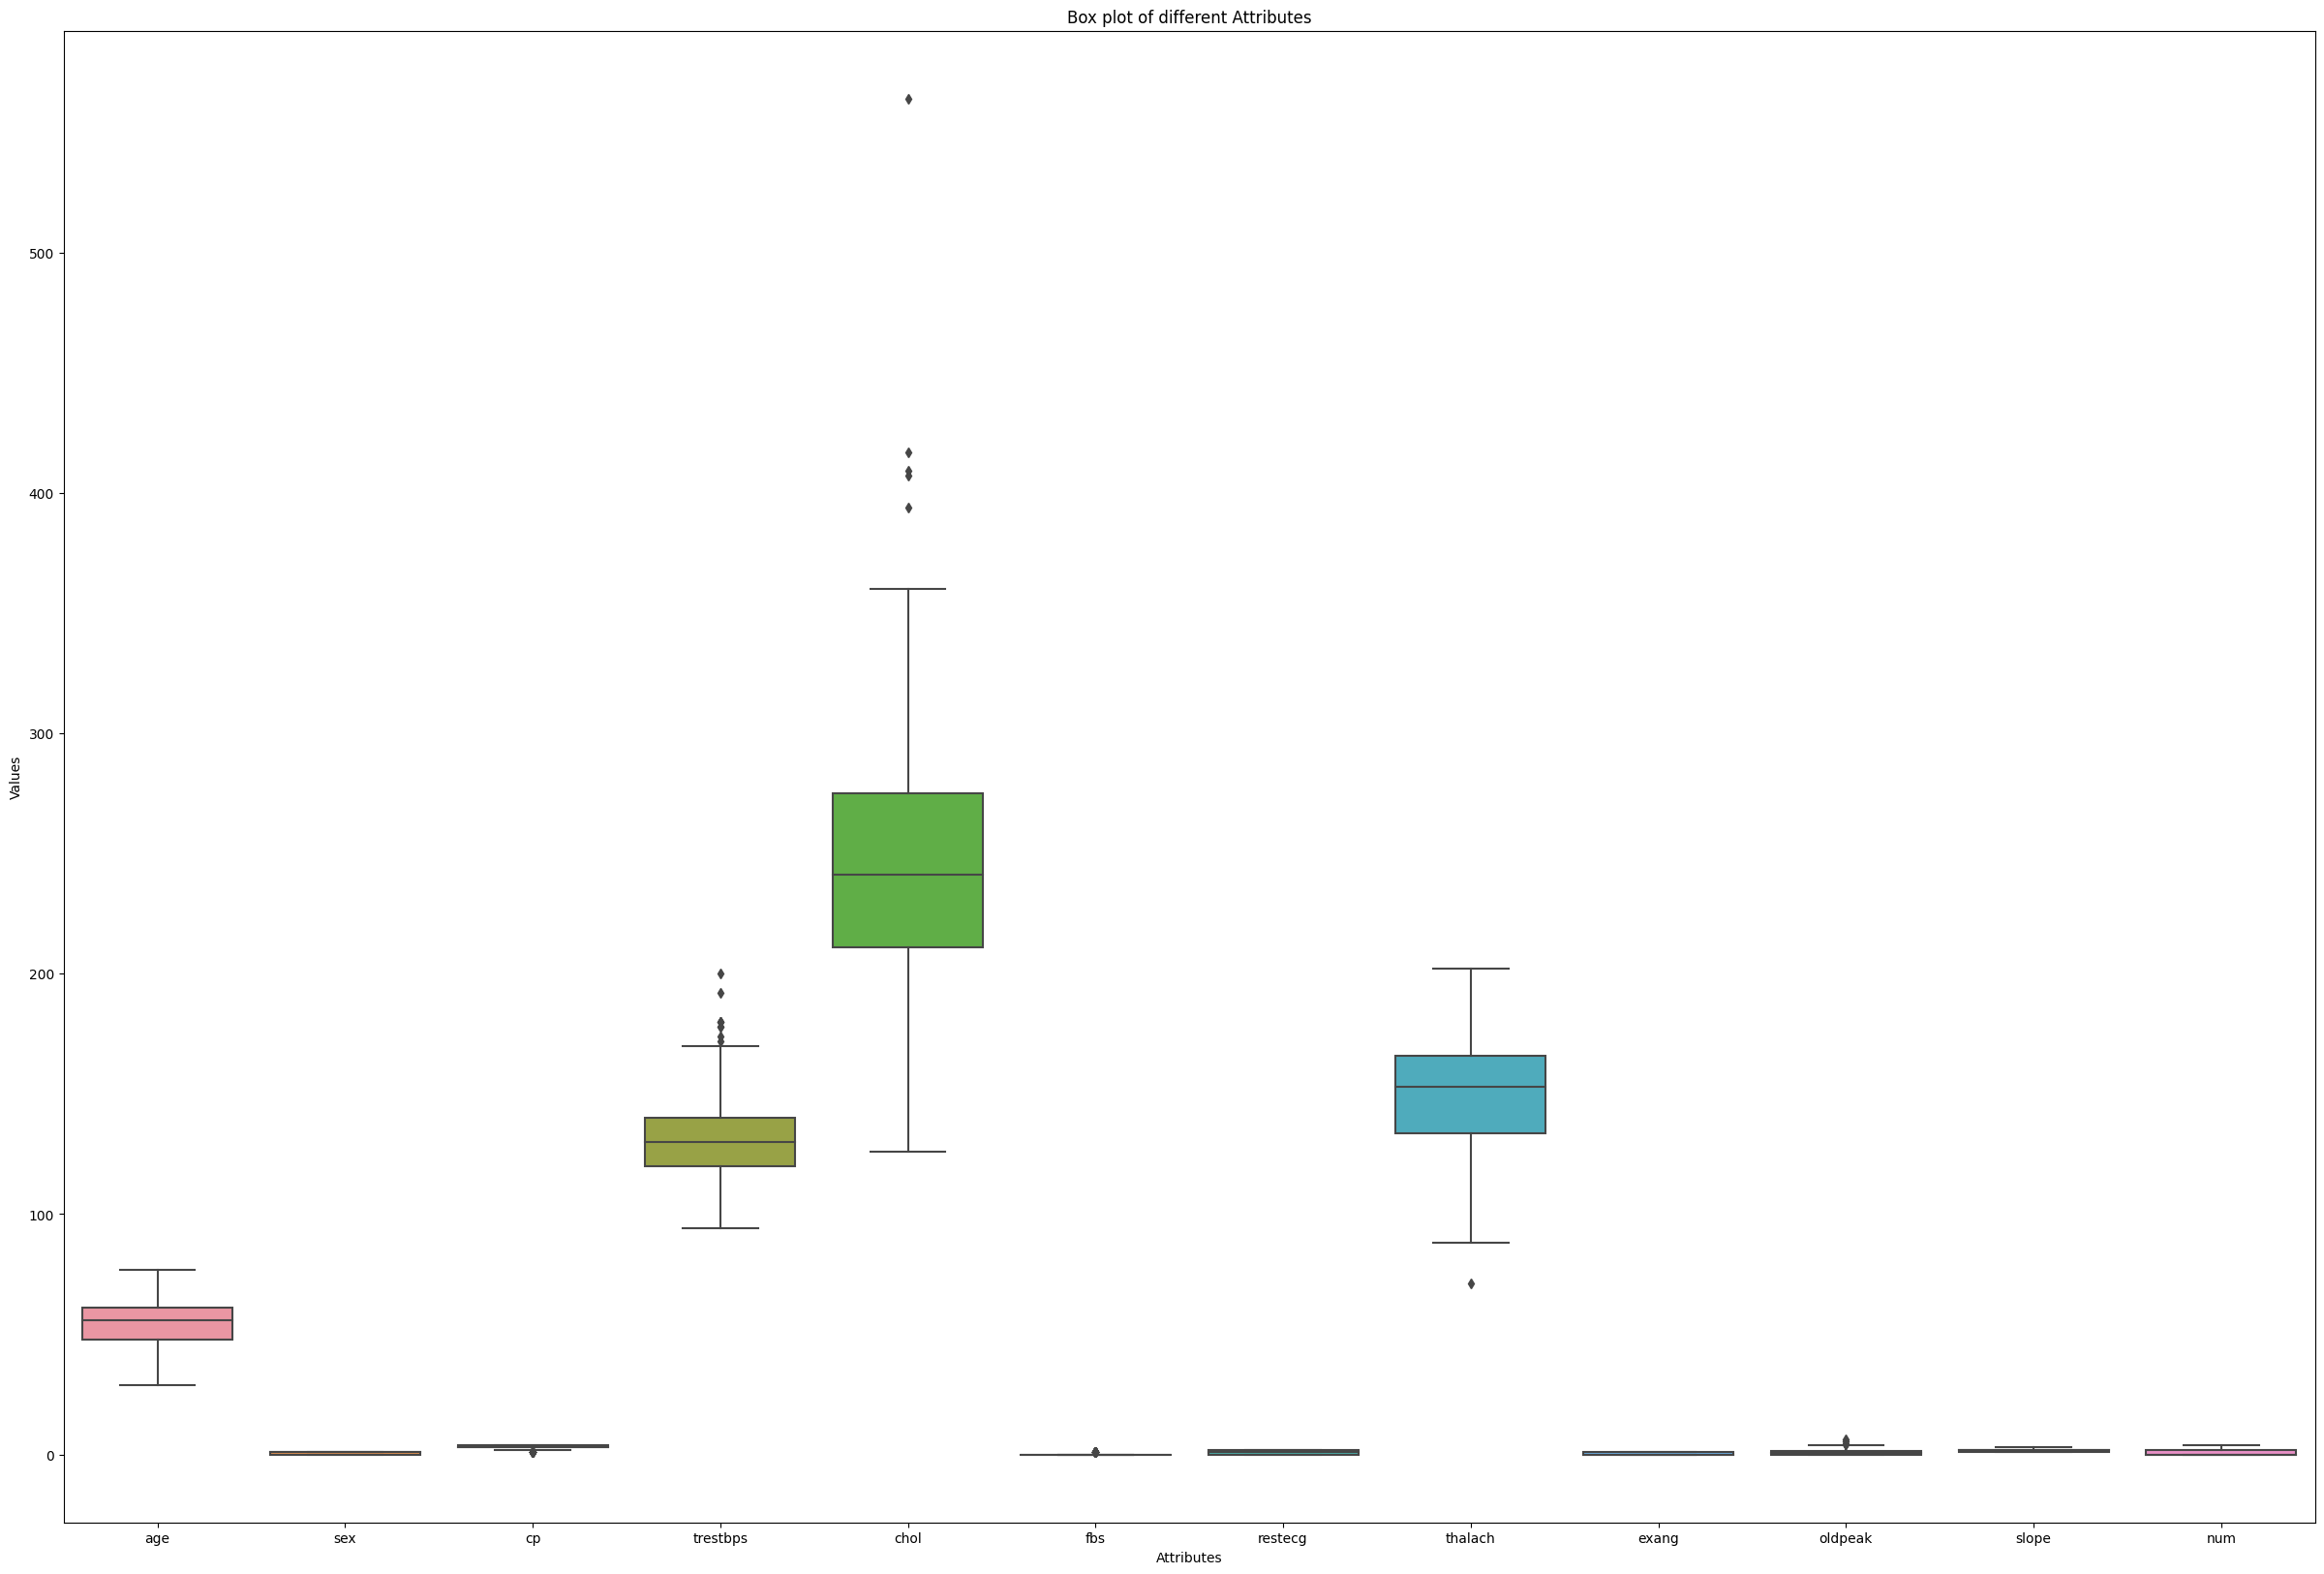

In [124]:
# creating the box plot
plt.figure(figsize=(30,20))

b_plot=sns.boxplot(data=load_data[load_data.columns.to_list()])
plt.xlabel('Attributes')
plt.ylabel('Values')
plt.title('Box plot of different Attributes')
plt.show()

**Observation:**

Outliers found in column 'trestbps','chol','thalach'.

**Converting Column name into Categorical columns.**

**a). 'num' column**

In [125]:
# To show again the data
load_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [126]:
# checking the uniquie values so that we categorise further
load_data['num'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [127]:
# To make the 'Heart_disease_ status' column based on 'num' column
l=list(load_data['num'][:])

l1=[]
for i in l:
    if i==0:
        l1.append('Absent')
    else:
        l1.append('Present')
    # else:
    #     l1.append('Advanced Label Present')  
print(l1) 
            

['Absent', 'Present', 'Present', 'Absent', 'Absent', 'Absent', 'Present', 'Absent', 'Present', 'Present', 'Absent', 'Absent', 'Present', 'Absent', 'Absent', 'Absent', 'Present', 'Absent', 'Absent', 'Absent', 'Absent', 'Absent', 'Present', 'Present', 'Present', 'Absent', 'Absent', 'Absent', 'Absent', 'Present', 'Absent', 'Present', 'Present', 'Absent', 'Absent', 'Absent', 'Present', 'Present', 'Present', 'Absent', 'Present', 'Absent', 'Absent', 'Absent', 'Present', 'Present', 'Absent', 'Present', 'Absent', 'Absent', 'Absent', 'Absent', 'Present', 'Absent', 'Present', 'Present', 'Present', 'Present', 'Absent', 'Absent', 'Present', 'Absent', 'Present', 'Absent', 'Present', 'Present', 'Present', 'Absent', 'Present', 'Present', 'Absent', 'Present', 'Present', 'Present', 'Present', 'Absent', 'Present', 'Absent', 'Absent', 'Present', 'Absent', 'Absent', 'Absent', 'Present', 'Absent', 'Absent', 'Absent', 'Absent', 'Absent', 'Absent', 'Absent', 'Present', 'Absent', 'Absent', 'Absent', 'Present'

In [128]:
#creating new data frame for Heart disease status
df=pd.DataFrame({'Heart_disease_status':l1})
df.head()

,Heart_disease_status
0,Absent
1,Present
2,Present
3,Absent
4,Absent


In [129]:
# verifying the data counts
df['Heart_disease_status'].value_counts()

Absent     164
Present    139
Name: Heart_disease_status, dtype: int64

In [130]:
# verifying the data counts
load_data['num'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [131]:
#create updated dataframe with Heart disesase status
ld1=pd.concat([load_data,df],axis=1)
ld1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_disease_status
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,Absent
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,Present
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,Present
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,Absent
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,Absent


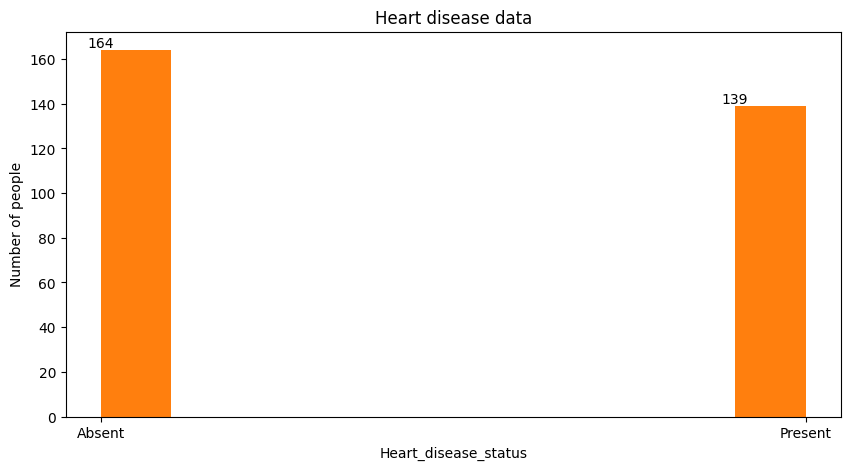

In [132]:
# graphical representation of Heart disease status

plt.figure(figsize=(10,5))
plt.hist(ld1['Heart_disease_status'])
#add text labels to the bar of histogram
counts, bins, _=plt.hist(ld1['Heart_disease_status'])
for i, count in enumerate(counts):
     if count > 0:
        plt.text(bins[i], count, str(int(count)), ha='center', va='bottom')
plt.xlabel('Heart_disease_status')
plt.ylabel('Number of people')
plt.title('Heart disease data')
plt.show()

**Observation:**

Population without heart-disease > Population with heart-disease

**b). 'sex' column**

In [133]:
ld1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_disease_status
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,Absent
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,Present
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,Present
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,Absent
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,Absent


In [134]:
#checking the unique values with counts
ld1['sex'].value_counts()

1.0    206
0.0     97
Name: sex, dtype: int64

In [135]:
#Adding new column 'Gender' w.r.t 'sex' column 
l=ld1['sex'][:].to_list()
l1=[]
for i in l:
    if i==1.0:
        l1.append('Male')
    else:
        l1.append('Female')        
ld2=pd.DataFrame({'Gender':l1})
ld3=pd.concat([ld1,ld2],axis=1)
ld3.head()  

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_disease_status,Gender
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,Absent,Male
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,Present,Male
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,Present,Male
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,Absent,Male
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,Absent,Female


In [136]:
#verifying the value counts 
ld3['Gender'].value_counts() 

Male      206
Female     97
Name: Gender, dtype: int64

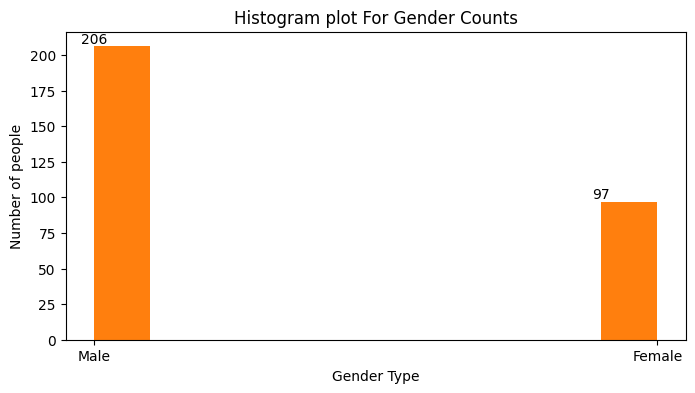

In [137]:
# graphical representation of Gender counts

plt.figure(figsize=(8,4))
plt.hist(ld3['Gender'],)
# Add the gender count over the histogram plot
counts,bins,_=plt.hist(ld3['Gender'])
for i,count in enumerate(counts):
    if count>0:
        plt.text(bins[i],count,str(int(count)),ha='center',va='bottom')

plt.xlabel('Gender Type')
plt.ylabel('Number of people')
plt.title('Histogram plot For Gender Counts')
plt.show()        

**Observation:**

Male population is greater than Female Population.

**C). 'Age' column**

In [138]:
ld3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_disease_status,Gender
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,Absent,Male
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,Present,Male
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,Present,Male
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,Absent,Male
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,Absent,Female


In [139]:
# To find the minimum , maximum and 50% of value
ld3['age'].describe()

count    303.000000
mean      54.438944
std        9.038662
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [140]:
# Adding new column 'age status' w.r.t 'age' column
l=ld3['age'][:].to_list()

l1=[]
for i in l:
    if i>=29 and i<40:
        l1.append('Young Age')
    elif i>=40 and i<55: 
        l1.append('Middle Age')
    else:
        l1.append('Old Age')    

# create new dataframe for age status

df=pd.DataFrame({'age_group':l1})

#Adding the age status column with existing data

ld4=pd.concat([ld3,df],axis=1)
ld4.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_disease_status,Gender,age_group
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,Absent,Male,Old Age
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,Present,Male,Old Age
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,Present,Male,Old Age
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,Absent,Male,Young Age
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,Absent,Female,Middle Age


In [141]:
# verifying the age status column

ld4['age_group'].value_counts()

Old Age       160
Middle Age    128
Young Age      15
Name: age_group, dtype: int64

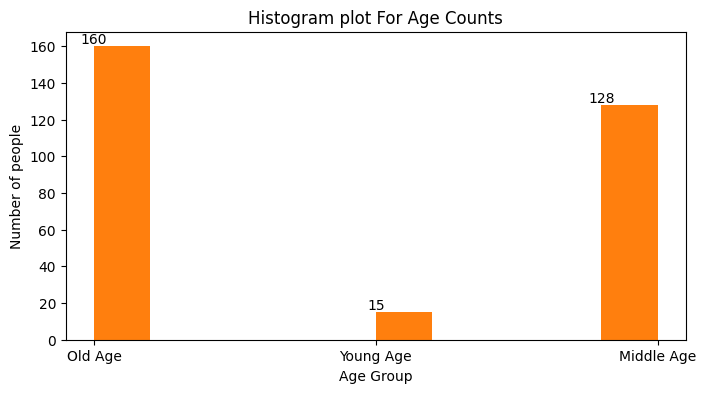

In [142]:
# graphical representation of age counts

plt.figure(figsize=(8,4))
plt.hist(ld4['age_group'])

#Adding the counts of histogram plot

counts,bins,_=plt.hist(ld4['age_group'])
for i, count in enumerate(counts):
    if count>0:
        plt.text(bins[i],count,str(int(count)),ha='center',va='bottom')

plt.xlabel('Age Group')        
plt.ylabel('Number of people')
plt.title('Histogram plot For Age Counts')
plt.show()

**Observation:**

Old age population > Middle age population > Young age population

**D). Gender Count Based On Age Group**

In [143]:
ld4.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_disease_status,Gender,age_group
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,Absent,Male,Old Age
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,Present,Male,Old Age
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,Present,Male,Old Age
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,Absent,Male,Young Age
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,Absent,Female,Middle Age


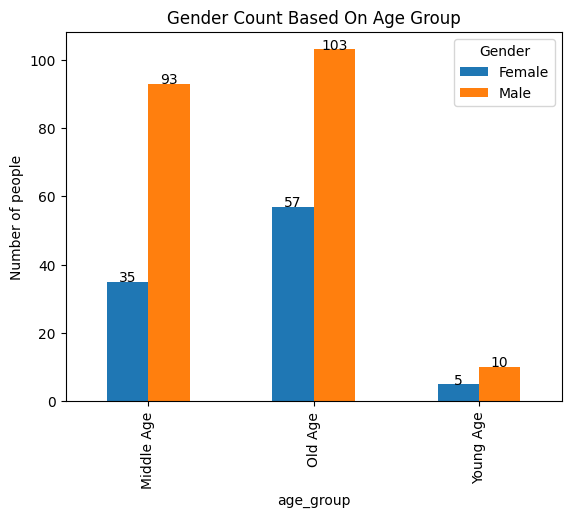

In [144]:
import matplotlib.pyplot as plt

# Group by age_group and Gender, and unstack to create a bar plot
a = ld4.groupby("age_group")['Gender'].value_counts().unstack()
b = a.plot(kind='bar')

# Add the count on the top of each bar
for p in b.containers:
    for i in p:
        height=i.get_height()
        plt.text(i.get_x()+i.get_width()/2,height+0.1,int(height),ha='center')

# Set labels and title
plt.ylabel('Number of people')
plt.title('Gender Count Based On Age Group')

# Show the plot
plt.show()


**Observation:**

In all three age groups Male population is greater than Female population

**E). Chest Pain Type**

In [145]:
# To add a new column chest pain type as per column 'cp'
l=ld4['cp'][:].to_list()
l1=[]
for i in l:
    if i==1.0:
        l1.append('typical angina')
    elif i==2.0:
        l1.append('atypical angina')
    elif i==3.0:
        l1.append('non-anginal pain')
    else:
        l1.append('asymptomatic')        
        
df=pd.DataFrame({'chest_pain_type':l1})
ld5=pd.concat([ld4,df],axis=1)   
ld5.head()     

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_disease_status,Gender,age_group,chest_pain_type
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,Absent,Male,Old Age,typical angina
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,Present,Male,Old Age,asymptomatic
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,Present,Male,Old Age,asymptomatic
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,Absent,Male,Young Age,non-anginal pain
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,Absent,Female,Middle Age,atypical angina


In [146]:
# checking the counts of cp with unique category
ld5['cp'].value_counts()

4.0    144
3.0     86
2.0     50
1.0     23
Name: cp, dtype: int64

In [147]:
# Verifying the new column w.r.t cp column
ld5['chest_pain_type'].value_counts()

asymptomatic        144
non-anginal pain     86
atypical angina      50
typical angina       23
Name: chest_pain_type, dtype: int64

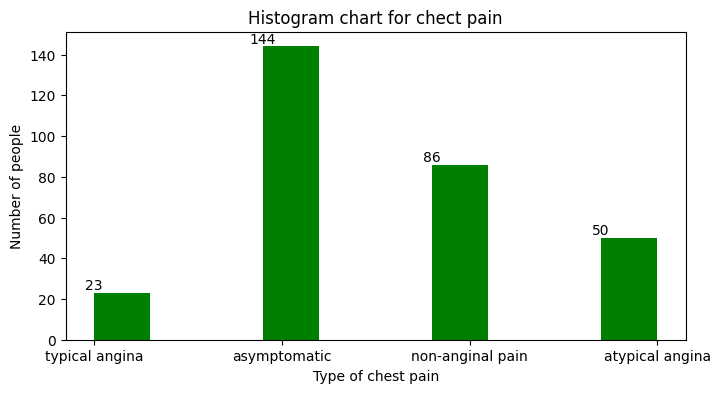

In [148]:
# Graphical representation of chest pain

plt.figure(figsize=(8,4))
counts,bins,_=plt.hist(ld5['chest_pain_type'],color='green')

for i, count in enumerate(counts):
    if count>0:
        plt.text(bins[i],count,str(int(count)),ha='center',va='bottom')

plt.xlabel('Type of chest pain')
plt.ylabel('Number of people')
plt.title('Histogram chart for chect pain')  
plt.show()

**Observation:**

asymptomatic > non-anginal pain > atypical pain > typical angina


**F). Fasting Blood Sugar**

In [149]:
ld5['fbs'].value_counts()

0.0    258
1.0     45
Name: fbs, dtype: int64

In [150]:
l=ld5['fbs'][:].to_list()
l1=[]
for i in l:
    if i==0:
        l1.append('Healthy')
    else:
        l1.append('Unhealthy')
df=pd.DataFrame({'Fasting_blood_sugar':l1})
ld6=pd.concat([df,ld5],axis=1)
ld6.head()            

,Fasting_blood_sugar,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_disease_status,Gender,age_group,chest_pain_type
0,Unhealthy,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,Absent,Male,Old Age,typical angina
1,Healthy,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,Present,Male,Old Age,asymptomatic
2,Healthy,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,Present,Male,Old Age,asymptomatic
3,Healthy,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,Absent,Male,Young Age,non-anginal pain
4,Healthy,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,Absent,Female,Middle Age,atypical angina


In [151]:
df=ld6['Fasting_blood_sugar'].value_counts()
df

Healthy      258
Unhealthy     45
Name: Fasting_blood_sugar, dtype: int64

In [152]:
ld6['fbs'].value_counts()

0.0    258
1.0     45
Name: fbs, dtype: int64

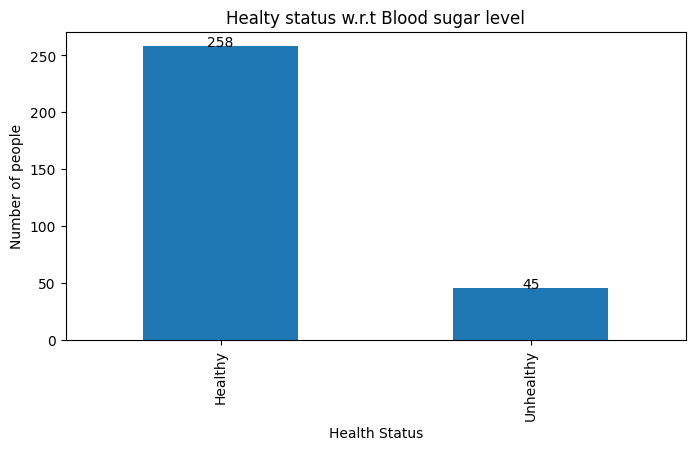

In [153]:
# Graphical representation of the people's health w.r.t Fasting blood sugar level

plt.figure(figsize=(8,4))
b=df.plot(kind='bar')

for p in b.containers:
    for i in p:

        a=i.get_height()
        b=i.get_x()+i.get_width()/2
        plt.text(b,a+0.2,int(a),ha='center')
plt.xlabel('Health Status')
plt.ylabel('Number of people')
plt.title('Healty status w.r.t Blood sugar level')
plt.show()


**Observation:**

Healthy population > Unhealthy population

**G).Resting Electrocardiographic Results**

In [154]:
ld6.head(2)

,Fasting_blood_sugar,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_disease_status,Gender,age_group,chest_pain_type
0,Unhealthy,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,Absent,Male,Old Age,typical angina
1,Healthy,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,Present,Male,Old Age,asymptomatic


In [155]:
df=ld6

In [156]:
df['restecg'].unique()

array([2., 0., 1.])

In [157]:
df.head()

,Fasting_blood_sugar,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_disease_status,Gender,age_group,chest_pain_type
0,Unhealthy,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,Absent,Male,Old Age,typical angina
1,Healthy,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,Present,Male,Old Age,asymptomatic
2,Healthy,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,Present,Male,Old Age,asymptomatic
3,Healthy,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,Absent,Male,Young Age,non-anginal pain
4,Healthy,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,Absent,Female,Middle Age,atypical angina


In [158]:
l=df['restecg'][:].to_list()
l1=[]
for i in l:
    if i==0:
        l1.append('normal')
    elif i==1.0:
        l1.append('highly abnormal')
    else:
        l1.append('mid abnormality')  

tdf=pd.DataFrame({'Resting_Electrocardiographic_Results':l1})
df=pd.concat([df,tdf],axis=1)              
df.head(2)

,Fasting_blood_sugar,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_disease_status,Gender,age_group,chest_pain_type,Resting_Electrocardiographic_Results
0,Unhealthy,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,Absent,Male,Old Age,typical angina,mid abnormality
1,Healthy,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,Present,Male,Old Age,asymptomatic,mid abnormality


In [159]:
df1=df['Resting_Electrocardiographic_Results'].value_counts()
df1

normal             151
mid abnormality    148
highly abnormal      4
Name: Resting_Electrocardiographic_Results, dtype: int64

In [160]:
df['restecg'].value_counts()

0.0    151
2.0    148
1.0      4
Name: restecg, dtype: int64

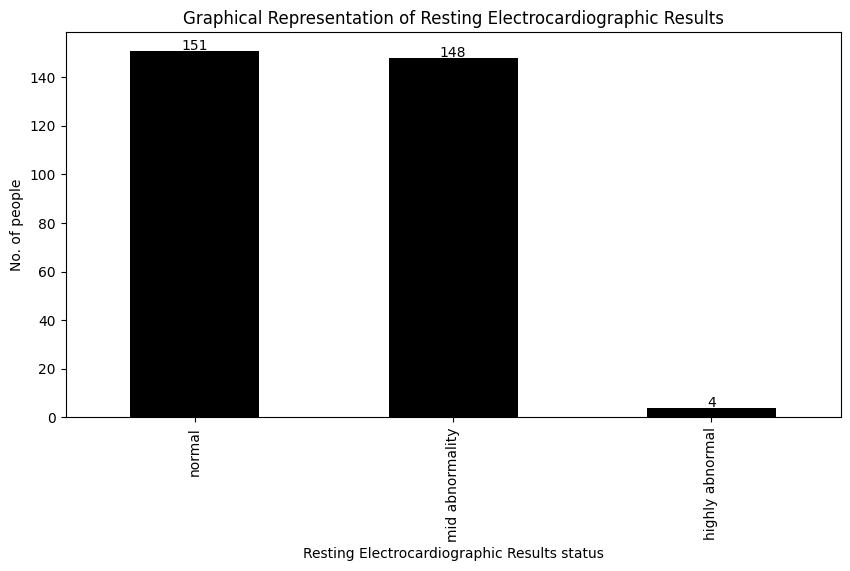

In [161]:
# Graphical representation 

plt.figure(figsize=(10,5))
a=df1.plot(kind='bar',color='black')

for i in a.containers:
    for p in i:
        b=p.get_x()+p.get_width()/2
        c=p.get_height()
        plt.text(b,c+0.2,str(int(c)),ha='center')

plt.xlabel('Resting Electrocardiographic Results status')
plt.ylabel('No. of people')
plt.title('Graphical Representation of Resting Electrocardiographic Results')
plt.show()

# **Observation:**

Resting Electrocardiographic Results as follows:

**normal(151) > mid abnormality (148) > highly abnormal(4)**

**H). Exercise included Angina**

In [162]:
df.head(2)

,Fasting_blood_sugar,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_disease_status,Gender,age_group,chest_pain_type,Resting_Electrocardiographic_Results
0,Unhealthy,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,Absent,Male,Old Age,typical angina,mid abnormality
1,Healthy,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,Present,Male,Old Age,asymptomatic,mid abnormality


In [163]:
# To make a new column and add to this old data.
l=df['exang'][:].to_list()
l1=[]
for i in l:
    if i==1:
        l1.append('yes')
    else:
        l1.append('no')

df1=pd.DataFrame({'Exercise_included_Angina':l1}) 
df=pd.concat([df,df1],axis=1)
df.head(2)       


,Fasting_blood_sugar,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_disease_status,Gender,age_group,chest_pain_type,Resting_Electrocardiographic_Results,Exercise_included_Angina
0,Unhealthy,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,Absent,Male,Old Age,typical angina,mid abnormality,no
1,Healthy,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,Present,Male,Old Age,asymptomatic,mid abnormality,yes


In [164]:
# To verify the the column Exercise included Angina w.r.t column exang

df1=df['Exercise_included_Angina'].value_counts()
df1

no     204
yes     99
Name: Exercise_included_Angina, dtype: int64

In [165]:
df['exang'].value_counts()

0.0    204
1.0     99
Name: exang, dtype: int64

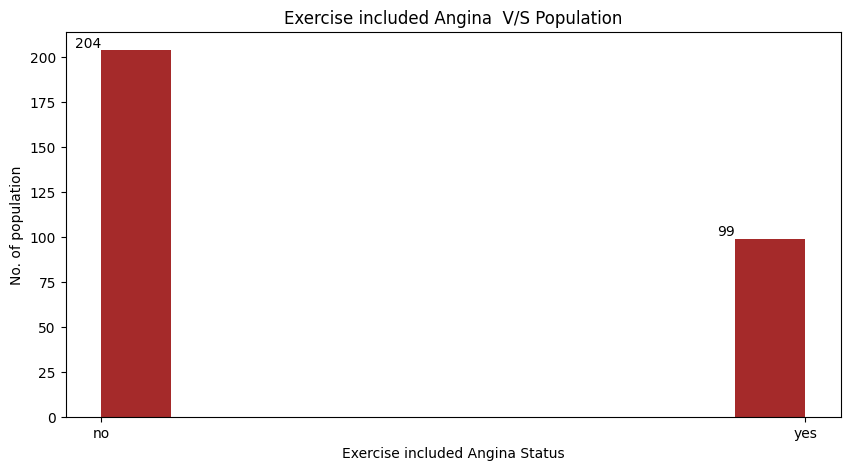

In [166]:
# Graphical representation of Exercise included Angina

plt.figure(figsize=(10,5))
counts,bins,_=plt.hist(df['Exercise_included_Angina'],color='brown')

for i,count in enumerate(counts):
    if count>0:
        plt.text(bins[i],count,str(int(count)),ha='right',va='bottom')

plt.xlabel('Exercise included Angina Status')
plt.ylabel('No. of population')
plt.title('Exercise included Angina  V/S Population')
plt.show() 

# **Observation**: 

Exercise included Angina observed in 99 people.

**I). Analysis of "slope" column w.r.t Poppulation**

In [167]:
df.head(2)

,Fasting_blood_sugar,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_disease_status,Gender,age_group,chest_pain_type,Resting_Electrocardiographic_Results,Exercise_included_Angina
0,Unhealthy,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,Absent,Male,Old Age,typical angina,mid abnormality,no
1,Healthy,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,Present,Male,Old Age,asymptomatic,mid abnormality,yes


In [168]:
# To make a new column and add to this old data.
l=df['slope'][:].to_list()
l1=[]
for i in l:
    if i==1.0:
        l1.append('upsloping')
    elif i==2:
        l1.append('flat')
    else:
        l1.append('downsloping') 

tdf=pd.DataFrame({"ST_exercise_peak":l1})
df=pd.concat([df,tdf],axis=1) 
df.head(2)          

,Fasting_blood_sugar,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_disease_status,Gender,age_group,chest_pain_type,Resting_Electrocardiographic_Results,Exercise_included_Angina,ST_exercise_peak
0,Unhealthy,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,Absent,Male,Old Age,typical angina,mid abnormality,no,downsloping
1,Healthy,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,Present,Male,Old Age,asymptomatic,mid abnormality,yes,flat


In [169]:
# To verify the the column ST_exercise_peak w.r.t column slope
df1=df["ST_exercise_peak"].value_counts()
df1

upsloping      142
flat           140
downsloping     21
Name: ST_exercise_peak, dtype: int64

In [170]:
df["slope"].value_counts()

1.0    142
2.0    140
3.0     21
Name: slope, dtype: int64

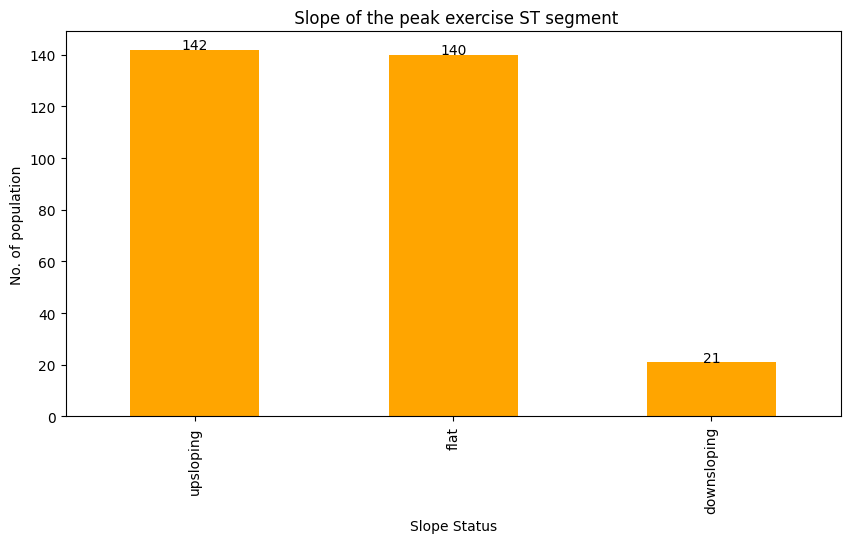

In [171]:
# Graphical representation of ST_exercise_peak
plt.figure(figsize=(10,5))
a=df1.plot(kind='bar',color='orange')

for i in a.containers:
    for j in i:
        x=j.get_x()+j.get_width()/2
        y=j.get_height()
        plt.text(x,y+0.2,str(int(y)),ha='center')

plt.xlabel('Slope Status')     
plt.ylabel('No. of population')
plt.title(' Slope of the peak exercise ST segment')   
plt.show()

# **Observation:**

The slope of the peak exercise ST segments are as follows:

Upsloping > flat > downsloping

## **J.) Thalium stress test:**


In [172]:
# To make a new column and add to this old data.
l=df['thal'][:].to_list()
l1=[]
for i in l:
    if i==str(3.0):
        l1.append('normal')
    elif i==str(6.0):
        l1.append('fixed defect')
    else:
        l1.append('reversable defect') 

tdf=pd.DataFrame({"Thalium_stress":l1})
df=pd.concat([df,tdf],axis=1) 
df.head(2)   

,Fasting_blood_sugar,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_disease_status,Gender,age_group,chest_pain_type,Resting_Electrocardiographic_Results,Exercise_included_Angina,ST_exercise_peak,Thalium_stress
0,Unhealthy,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,Absent,Male,Old Age,typical angina,mid abnormality,no,downsloping,fixed defect
1,Healthy,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,Present,Male,Old Age,asymptomatic,mid abnormality,yes,flat,normal


In [173]:

df["thal"].value_counts()


3.0    168
7.0    117
6.0     18
Name: thal, dtype: int64

In [174]:
# To verify the the column ST_exercise_peak w.r.t column slope
df1=df["Thalium_stress"].value_counts()

df1

normal               168
reversable defect    117
fixed defect          18
Name: Thalium_stress, dtype: int64

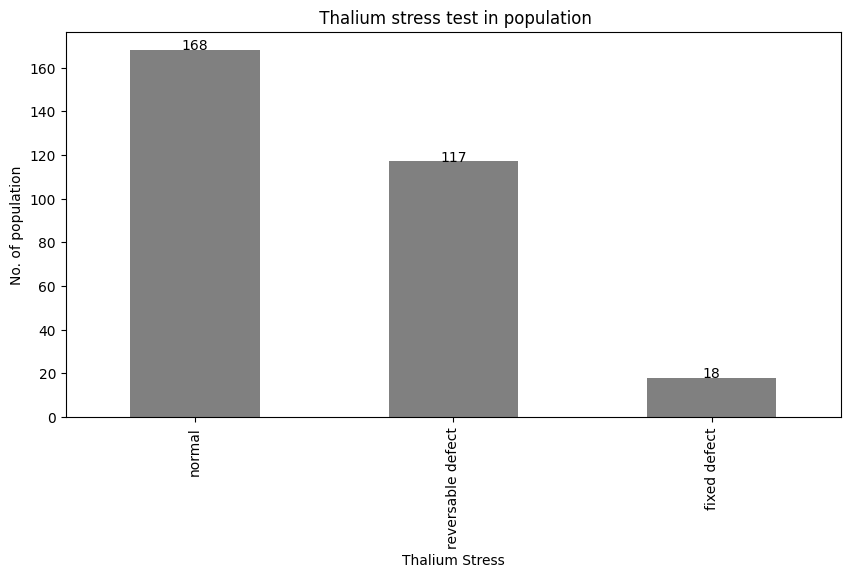

In [175]:
# Graphical representation of ST_exercise_peak
plt.figure(figsize=(10,5))
a=df1.plot(kind='bar',color='grey')

for i in a.containers:
    for j in i:
        x=j.get_x()+j.get_width()/2
        y=j.get_height()
        plt.text(x,y+0.2,str(int(y)),ha='center')

plt.xlabel('Thalium Stress')     
plt.ylabel('No. of population')
plt.title(' Thalium stress test in population')   
plt.show()

# **Observation:**

The Thalium stress test are as follows:

**normal > reversable defect > fixed defect**

# **4. Performing Exploratory Data Analysis on Data**

# **4.1 Heart Disease**


**4.1.1 Total percentage of heart disease found in population**

In [176]:
df.head(2)

,Fasting_blood_sugar,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_disease_status,Gender,age_group,chest_pain_type,Resting_Electrocardiographic_Results,Exercise_included_Angina,ST_exercise_peak,Thalium_stress
0,Unhealthy,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,Absent,Male,Old Age,typical angina,mid abnormality,no,downsloping,fixed defect
1,Healthy,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,Present,Male,Old Age,asymptomatic,mid abnormality,yes,flat,normal


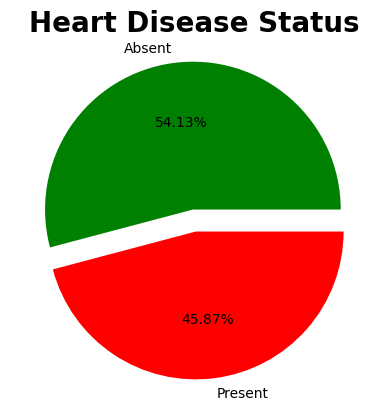

In [177]:
# calculating  percentage of heart disease found in population using pie chart

plt.pie(x=df['Heart_disease_status'].value_counts(),explode=[0.1,0.05],labels=['Absent','Present'],colors=['Green','red'],autopct='%.2f%%')
plt.title('Heart Disease Status',fontweight='bold',fontsize=20,y=1)
plt.show()


# **Observation:**

Heart disease status are as follows:



*   Absent = 54.13%

*   Present = 45.87%






**4.1.2 Heart disease count based on gender and age group**

In [178]:
df.head(2)

,Fasting_blood_sugar,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_disease_status,Gender,age_group,chest_pain_type,Resting_Electrocardiographic_Results,Exercise_included_Angina,ST_exercise_peak,Thalium_stress
0,Unhealthy,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,Absent,Male,Old Age,typical angina,mid abnormality,no,downsloping,fixed defect
1,Healthy,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,Present,Male,Old Age,asymptomatic,mid abnormality,yes,flat,normal


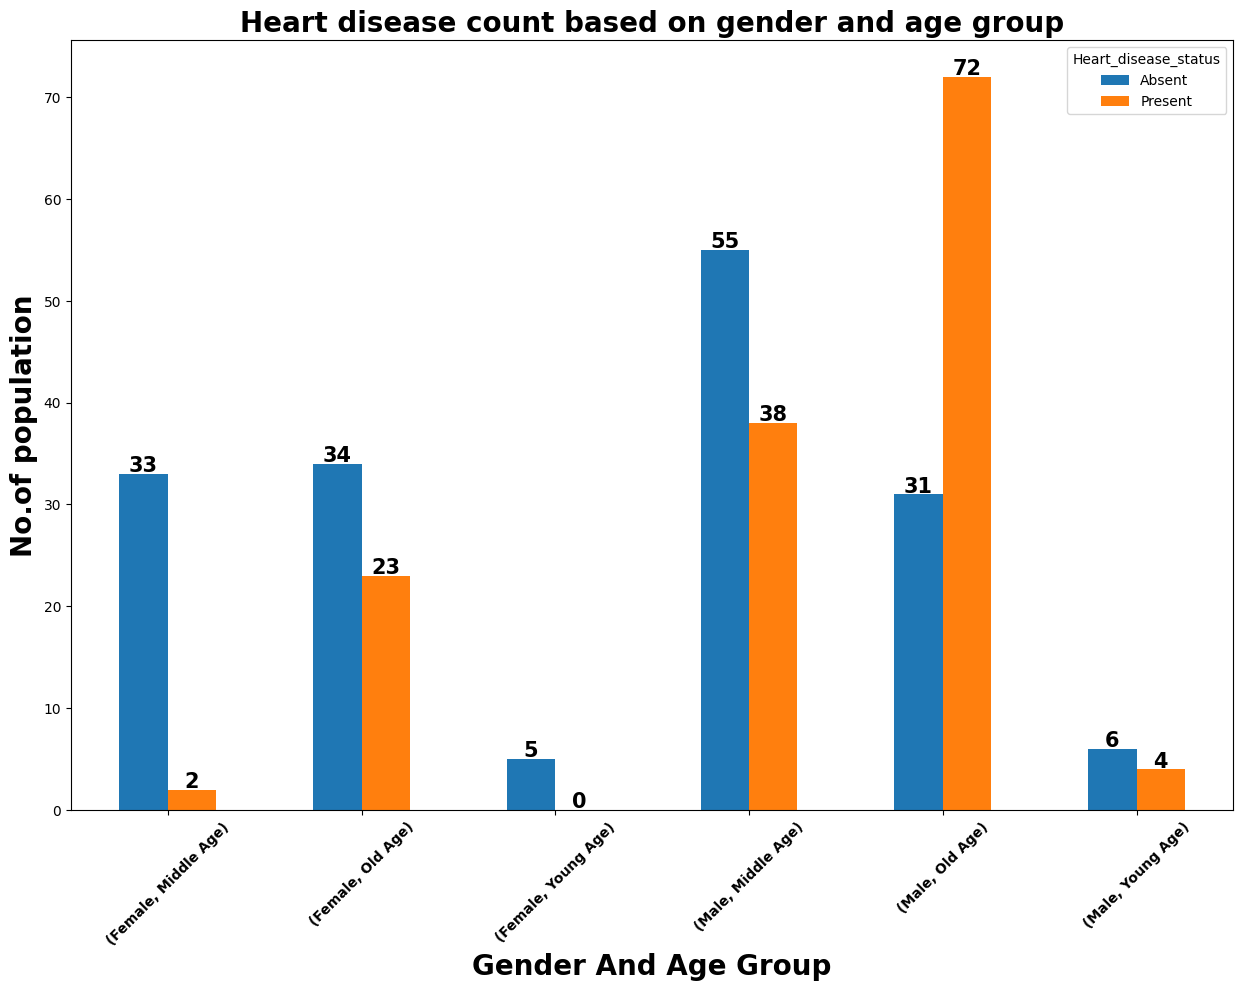

In [179]:
df1=df.groupby(['Gender','age_group'])['Heart_disease_status'].value_counts().unstack()

fig,ax=plt.subplots(figsize=(15,10))
a=df1.plot(kind='bar',ax=ax)

for i in a.containers:
    for j in i:
        b=j.get_x()+j.get_width()/2
        c=j.get_height()
        plt.text(b,c+0.2,str(int(c)),ha='center',fontweight='bold',fontsize=15)
        

plt.xlabel('Gender And Age Group',fontsize=20,fontweight='bold')
plt.ylabel('No.of population',fontsize=20,fontweight='bold')
plt.title('Heart disease count based on gender and age group',fontsize=20,fontweight='bold',y=1)    
plt.xticks(rotation=45,fontweight='bold',fontsize=10)  
plt.show()    

# **Observation:**



1.  **For female,middle age group:**
Heart disease absent in 33 people and present in 02 people.

1.   **For female,old age group:**
Heart disease absent in 34 people and present in 23 people.

1. **For female,young age group:**
Heart disease absent in 05 people only, ***which means no any heart disease found in this specific group.***
1.  **For male,middle age group:**
Heart disease absent in 55 people and present in 38.

1.   **For male,old age group:**
Heart disease absent in 31 people and present in 72.

1.  **For male,young age group:**
Heart disease absent in 06 people and present in 04.

# **4.2 Chest Pain**

**4.2.1 Chest pain experienced by population suffering with heart disease**

In [180]:
df.head(2)

,Fasting_blood_sugar,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_disease_status,Gender,age_group,chest_pain_type,Resting_Electrocardiographic_Results,Exercise_included_Angina,ST_exercise_peak,Thalium_stress
0,Unhealthy,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,Absent,Male,Old Age,typical angina,mid abnormality,no,downsloping,fixed defect
1,Healthy,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,Present,Male,Old Age,asymptomatic,mid abnormality,yes,flat,normal


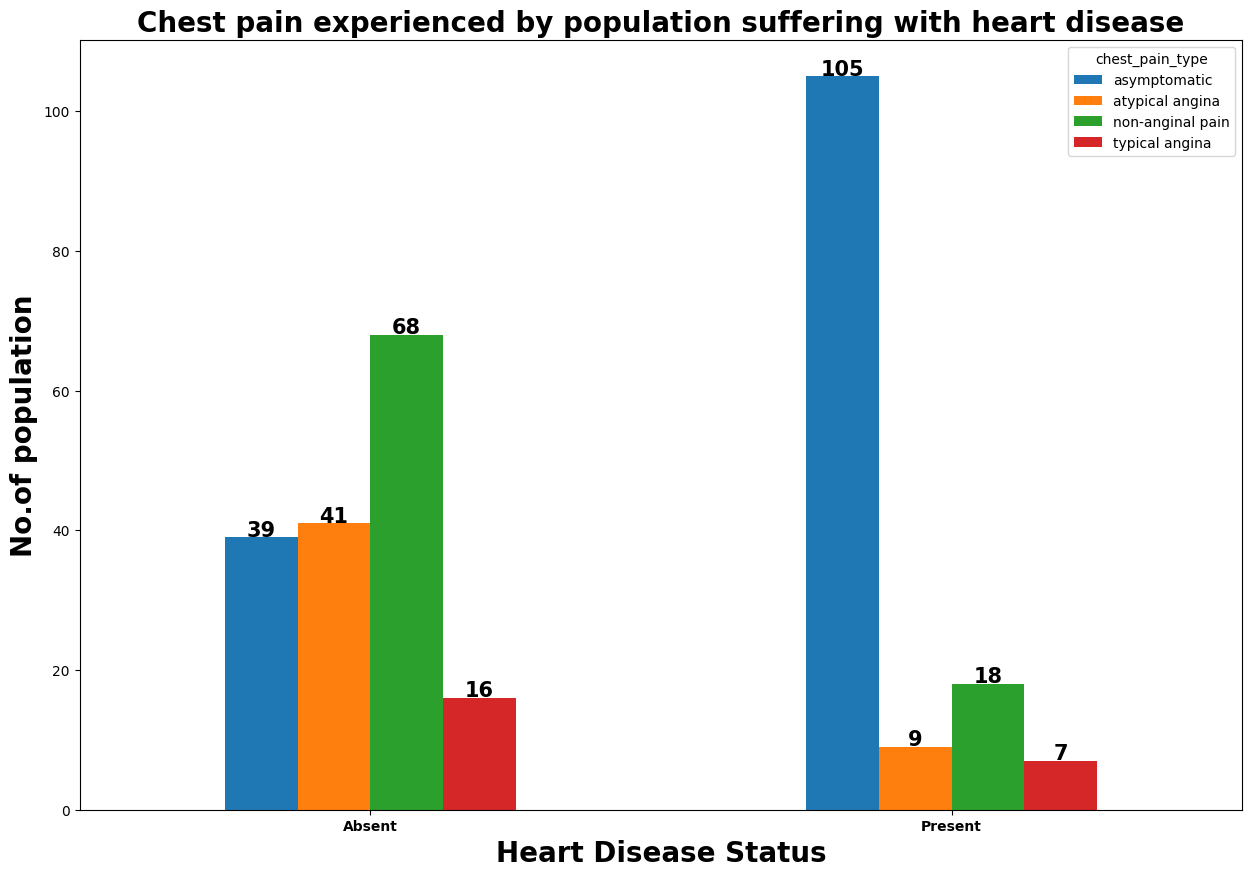

In [181]:
df1=df.groupby('Heart_disease_status')['chest_pain_type'].value_counts().unstack()
fig,ax=plt.subplots(figsize=(15,10))
a=df1.plot(kind='bar',ax=ax)

for i in a.containers:
    for j in i:
        b=j.get_x()+j.get_width()/2
        c=j.get_height()
        plt.text(b,c+0.2,str(int(c)),ha='center',fontweight='bold',fontsize=15)
        

plt.xlabel('Heart Disease Status',fontsize=20,fontweight='bold')
plt.ylabel('No.of population',fontsize=20,fontweight='bold')
plt.title('Chest pain experienced by population suffering with heart disease',fontsize=20,fontweight='bold',y=1) 
plt.xticks(rotation=360,fontweight='bold',fontsize=10)   
plt.show()

# **Observation:**

**For population having heart disease:**


*   asymptomatic=105	

*   atypical angina=09
*   non-anginal pain=18


*  typical angina=07

**For population with no heart disease:**


*   asymptomatic=39

*   atypical angina=41

*   non-anginal pain=68


*  typical angina=16





**4.2.2 Chest pain experienced by populaton based on gender and age group**

In [182]:
df.head(2)

,Fasting_blood_sugar,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_disease_status,Gender,age_group,chest_pain_type,Resting_Electrocardiographic_Results,Exercise_included_Angina,ST_exercise_peak,Thalium_stress
0,Unhealthy,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,Absent,Male,Old Age,typical angina,mid abnormality,no,downsloping,fixed defect
1,Healthy,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,Present,Male,Old Age,asymptomatic,mid abnormality,yes,flat,normal


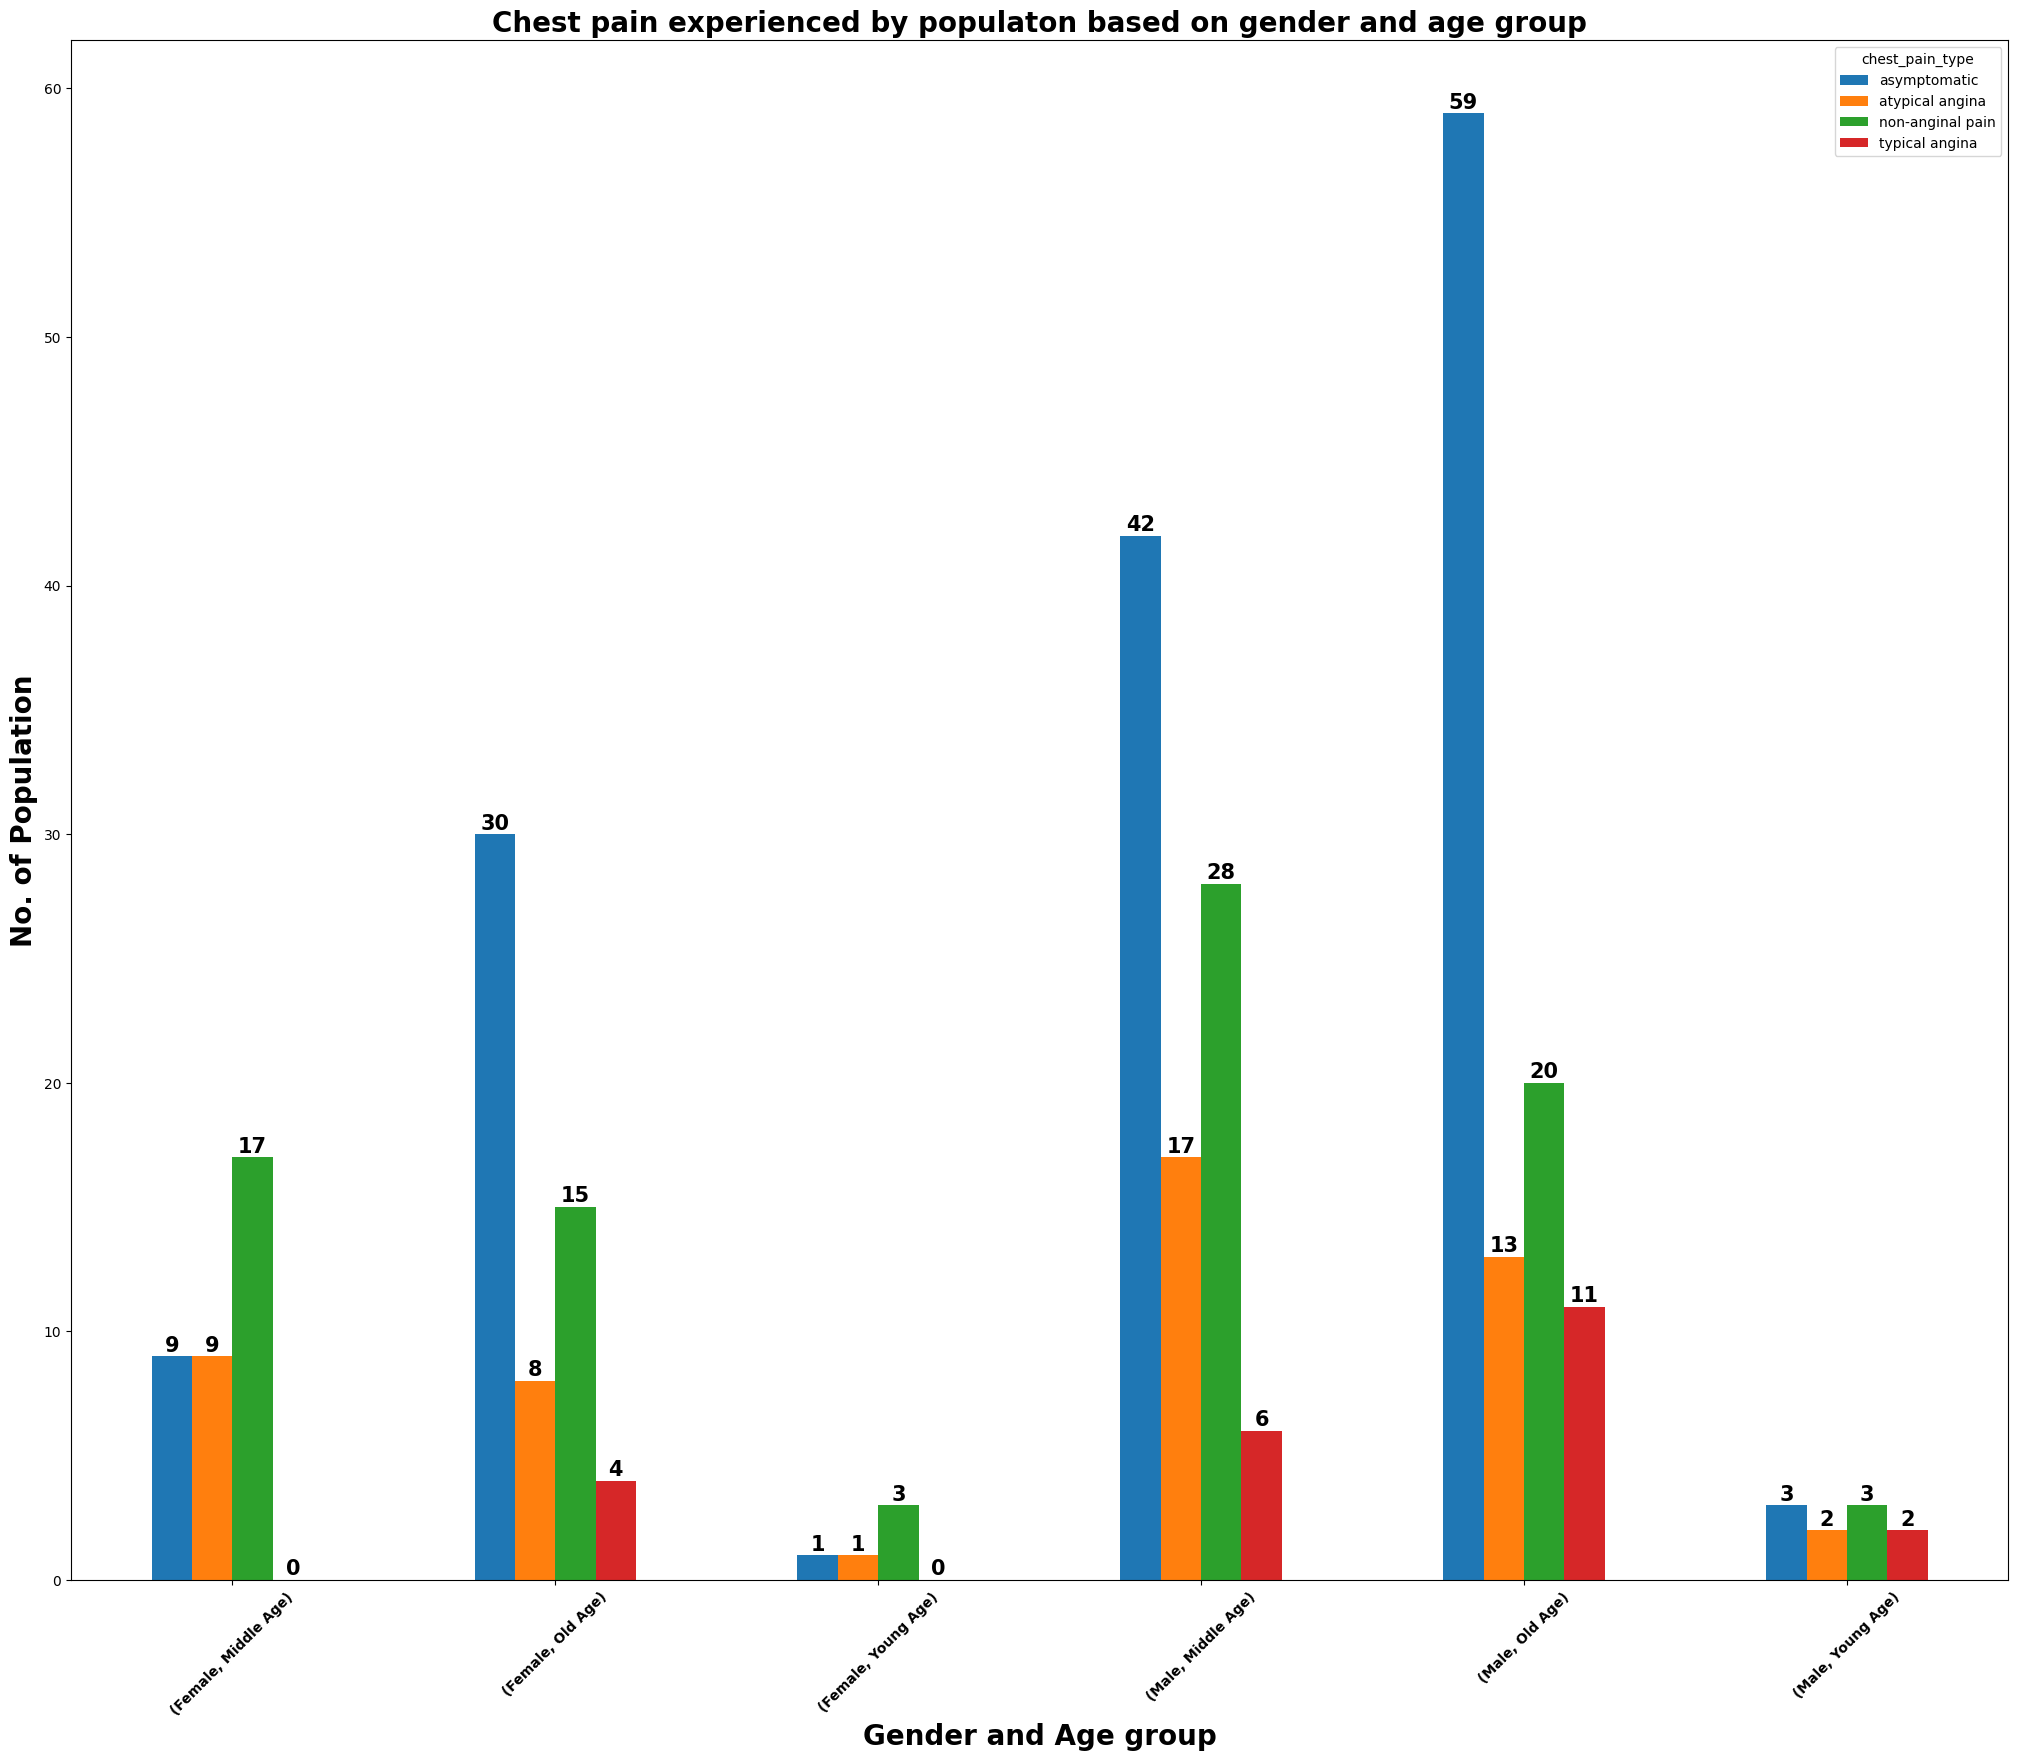

In [183]:
df1=df.groupby (['Gender','age_group'])['chest_pain_type'].value_counts().unstack()

fig,ax=plt.subplots(figsize=(25,20))
a=df1.plot(kind='bar',ax=ax)

for i in a.containers:
    for j in i:
        b=j.get_height()
        c=j.get_x()+j.get_width()/2
        plt.text(c,b+0.2,str(int(b)),ha='center',fontweight='bold',fontsize=15)

plt.xlabel('Gender and Age group',fontweight='bold',fontsize=20)
plt.ylabel('No. of Population',fontweight='bold',fontsize=20)
plt.title('Chest pain experienced by populaton based on gender and age group',fontweight='bold',fontsize=20)
plt.xticks(rotation=45,fontweight='bold',fontsize=10)
plt.show()

# **Observation:**

**For female,middle age group:** 

asymptomatic=09

atypical angina=09

non-anginal pain=17

typical angina=0

**For female,old age group:** 

asymptomatic=13

atypical angina=08

non-anginal pain=15

typical angina=04

**For female,young age group:** 

asymptomatic=01

atypical angina=01

non-anginal pain=03

typical angina=00

**For male,middle age group:** 

asymptomatic=42

atypical angina=17

non-anginal pain=28

typical angina=06

**For male,old age group**: 

asymptomatic=59

atypical angina=13

non-anginal pain=29

typical angina=11

**For male,young age group:** 

asymptomatic=03

atypical angina=02

non-anginal pain=03

typical angina=02


**According to above data we can say that the population belongs from female,young age group experience lesser chest pain w.r.t male, young age group.**

# **4.3 Blood Pressure**

**4.3.1 Blood pressure of heart disease population**

In [184]:
df.head(2)

,Fasting_blood_sugar,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_disease_status,Gender,age_group,chest_pain_type,Resting_Electrocardiographic_Results,Exercise_included_Angina,ST_exercise_peak,Thalium_stress
0,Unhealthy,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,Absent,Male,Old Age,typical angina,mid abnormality,no,downsloping,fixed defect
1,Healthy,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,Present,Male,Old Age,asymptomatic,mid abnormality,yes,flat,normal


In [185]:
df['trestbps'].describe()

count    303.000000
mean     131.689769
std       17.599748
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [186]:
l=df['trestbps'][:].to_list()
l1=[]
for i in l:
    if i>=float(94) and i<=float(130):
        l1.append('B.P range 94-130')
    else:
        l1.append('B.P range 131-200')
tdf=pd.DataFrame({'BP_Range':l1})
df=pd.concat([df,tdf],axis=1)
df.head(2)        


,Fasting_blood_sugar,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_disease_status,Gender,age_group,chest_pain_type,Resting_Electrocardiographic_Results,Exercise_included_Angina,ST_exercise_peak,Thalium_stress,BP_Range
0,Unhealthy,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,Absent,Male,Old Age,typical angina,mid abnormality,no,downsloping,fixed defect,B.P range 131-200
1,Healthy,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,Present,Male,Old Age,asymptomatic,mid abnormality,yes,flat,normal,B.P range 131-200


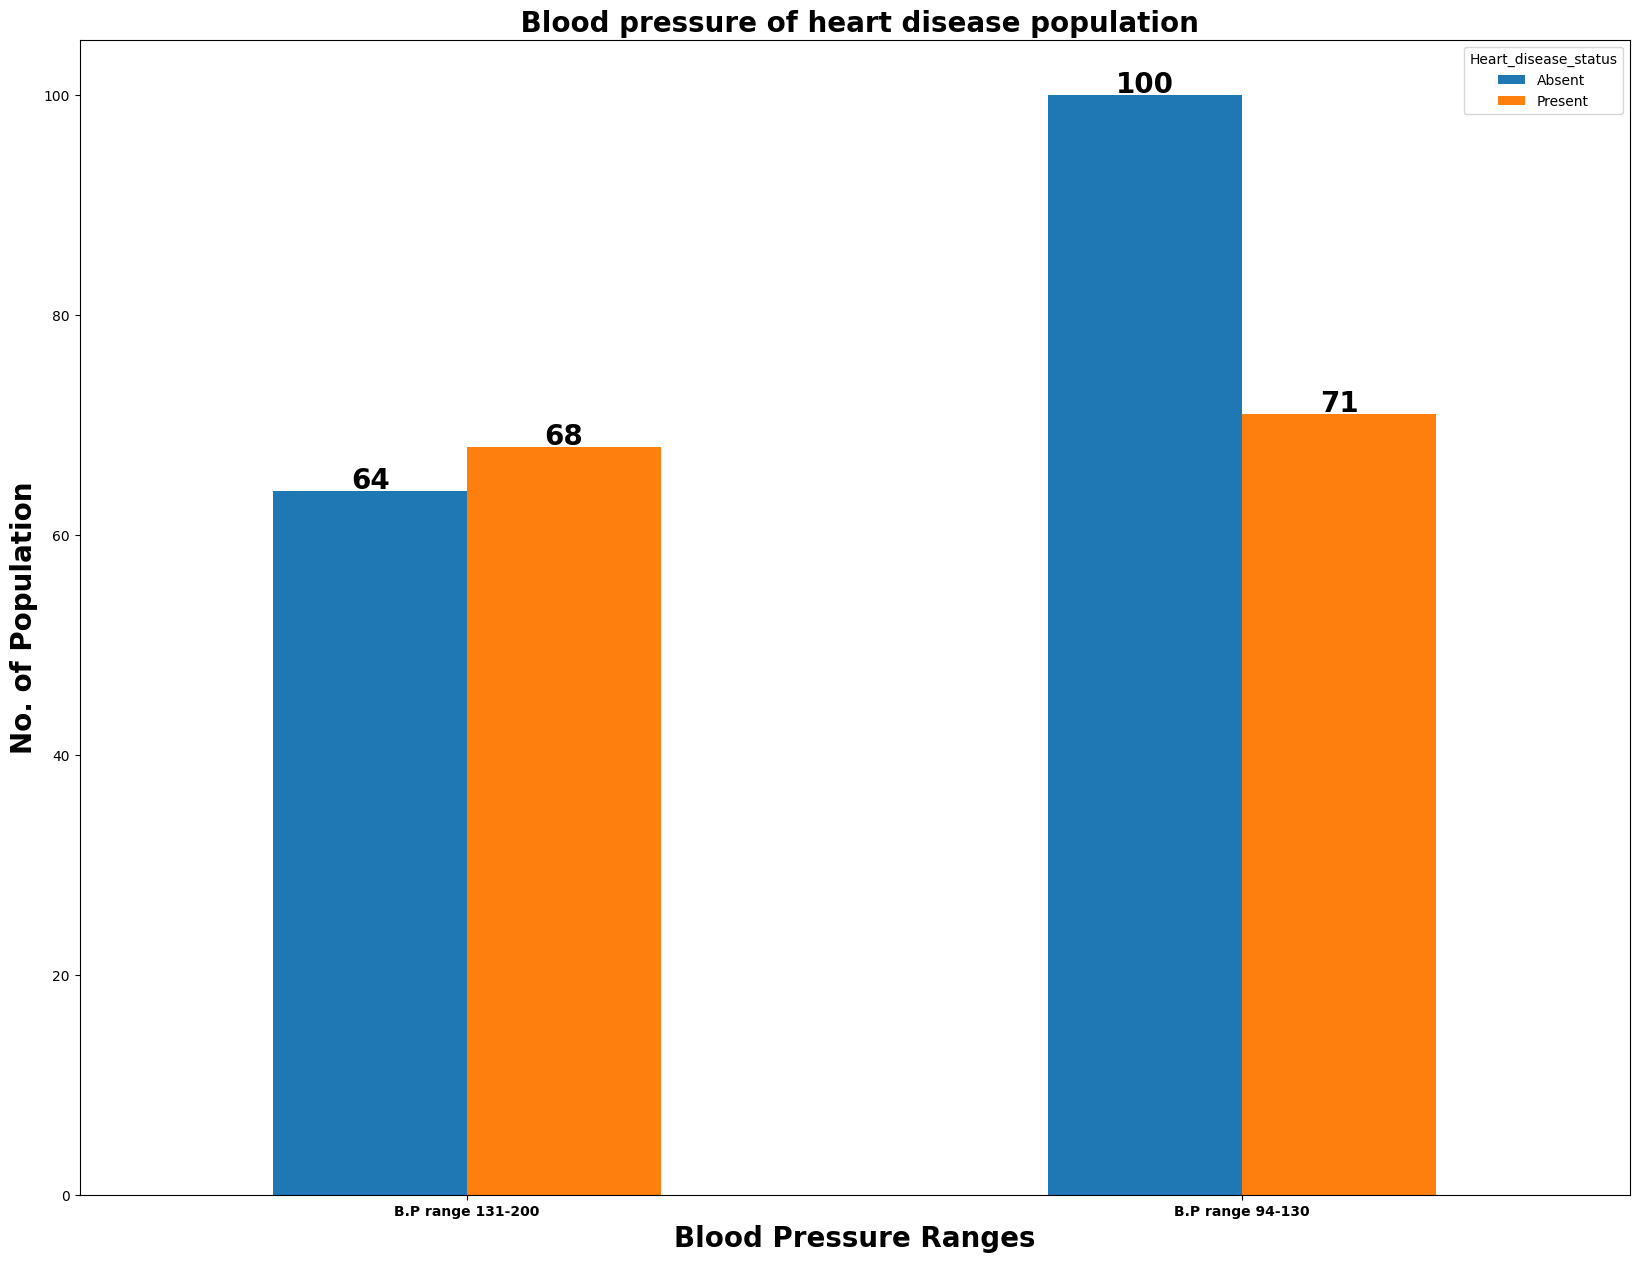

In [187]:
df1=df.groupby('BP_Range')['Heart_disease_status'].value_counts().unstack()

fig,ax=plt.subplots(figsize=(20,15))
a=df1.plot(kind='bar',ax=ax)

for i in a.containers:
    for j in i:
        b=j.get_height()
        c=j.get_x()+j.get_width()/2
        plt.text(c,b+0.2,str(int(b)),ha='center',fontweight='bold',fontsize=20)

plt.xlabel('Blood Pressure Ranges',fontweight='bold',fontsize=20)
plt.ylabel('No. of Population',fontweight='bold',fontsize=20)
plt.title(' Blood pressure of heart disease population',fontweight='bold',fontsize=20)
plt.xticks(rotation=360,fontweight='bold',fontsize=10)
plt.show()

# **Observation:**


*   For **B.P range 131-200** heart disease **present in 68 people** and **absent in 64**.
*   For **B.P range 94-130** heart disease **present in 71 people** and **absent in 100**.



**4.3.2 Blood Pressure based on Gender**

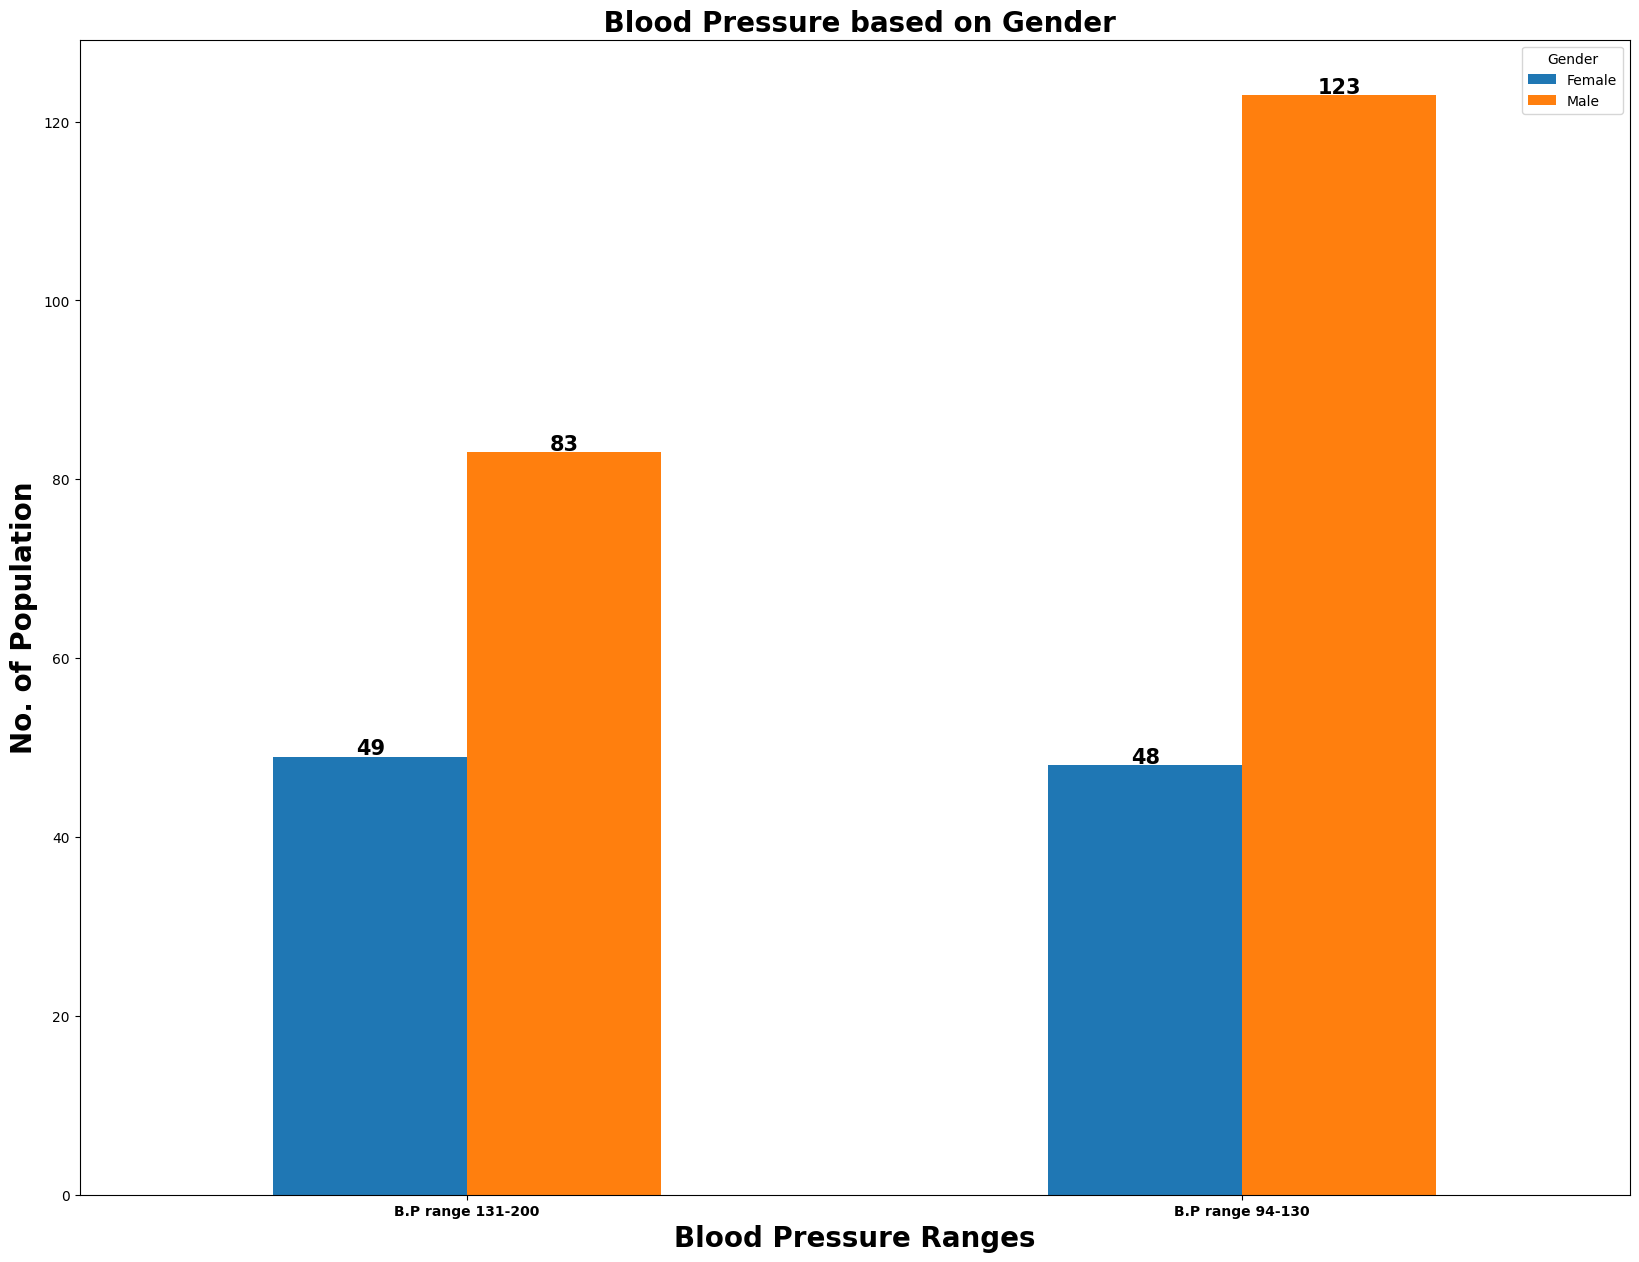

In [188]:
df1=df.groupby('BP_Range')['Gender'].value_counts().unstack()

fig,ax=plt.subplots(figsize=(20,15))
a=df1.plot(kind='bar',ax=ax)

for i in a.containers:
    for j in i:
        b=j.get_height()
        c=j.get_x()+j.get_width()/2
        plt.text(c,b+0.2,str(int(b)),ha='center',fontweight='bold',fontsize=15)

plt.xlabel('Blood Pressure Ranges',fontweight='bold',fontsize=20)
plt.ylabel('No. of Population',fontweight='bold',fontsize=20)
plt.title(' Blood Pressure based on Gender',fontweight='bold',fontsize=20)
plt.xticks(rotation=360,fontweight='bold',fontsize=10)
plt.show()

# **Observation:**


*   For **B.P range 131-200** female belongs 49 and 83 in male.
*   For **B.P range 131-200** female belongs 48 and 123 in male.


**4.3.3 Blood pressure based on age group and age:**

In [189]:
 df.head(2)

,Fasting_blood_sugar,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_disease_status,Gender,age_group,chest_pain_type,Resting_Electrocardiographic_Results,Exercise_included_Angina,ST_exercise_peak,Thalium_stress,BP_Range
0,Unhealthy,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,Absent,Male,Old Age,typical angina,mid abnormality,no,downsloping,fixed defect,B.P range 131-200
1,Healthy,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,Present,Male,Old Age,asymptomatic,mid abnormality,yes,flat,normal,B.P range 131-200


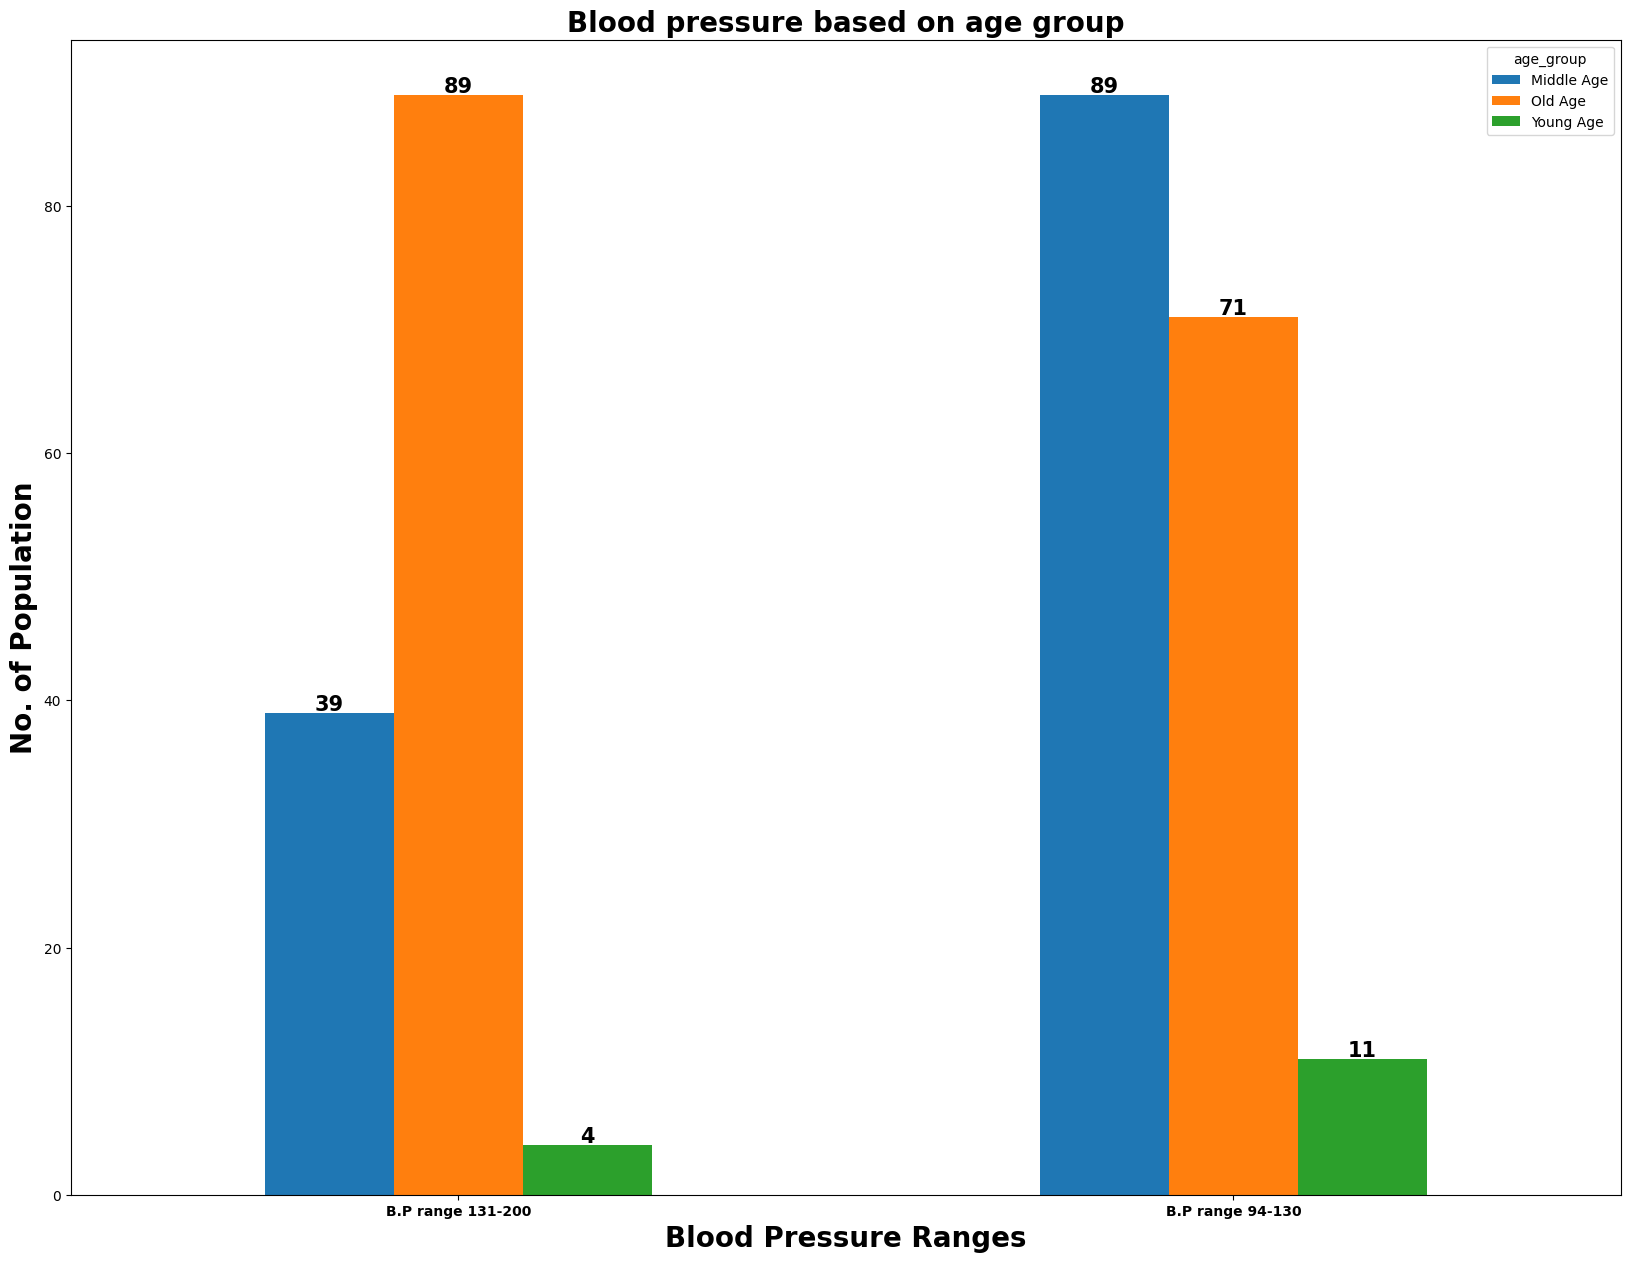

In [190]:
df1=df.groupby('BP_Range')['age_group'].value_counts().unstack()

fig,ax=plt.subplots(figsize=(20,15))
a=df1.plot(kind='bar',ax=ax)

for i in a.containers:
    for j in i:
        b=j.get_height()
        c=j.get_x()+j.get_width()/2
        plt.text(c,b+0.2,str(int(b)),ha='center',fontweight='bold',fontsize=15)

plt.xlabel('Blood Pressure Ranges',fontweight='bold',fontsize=20)
plt.ylabel('No. of Population',fontweight='bold',fontsize=20)
plt.title('Blood pressure based on age group',fontweight='bold',fontsize=20)
plt.xticks(rotation=360,fontweight='bold',fontsize=10)
plt.show()

# **Observation:**


*   For **B.P range 131-200** 

1.   Middle age= 39

1.   Old age   = 89
2.   Young age = 04

*   For **B.P range 131-200** 
1.   Middle age= 89

1.   Old age   = 71
2.   Young age = 11


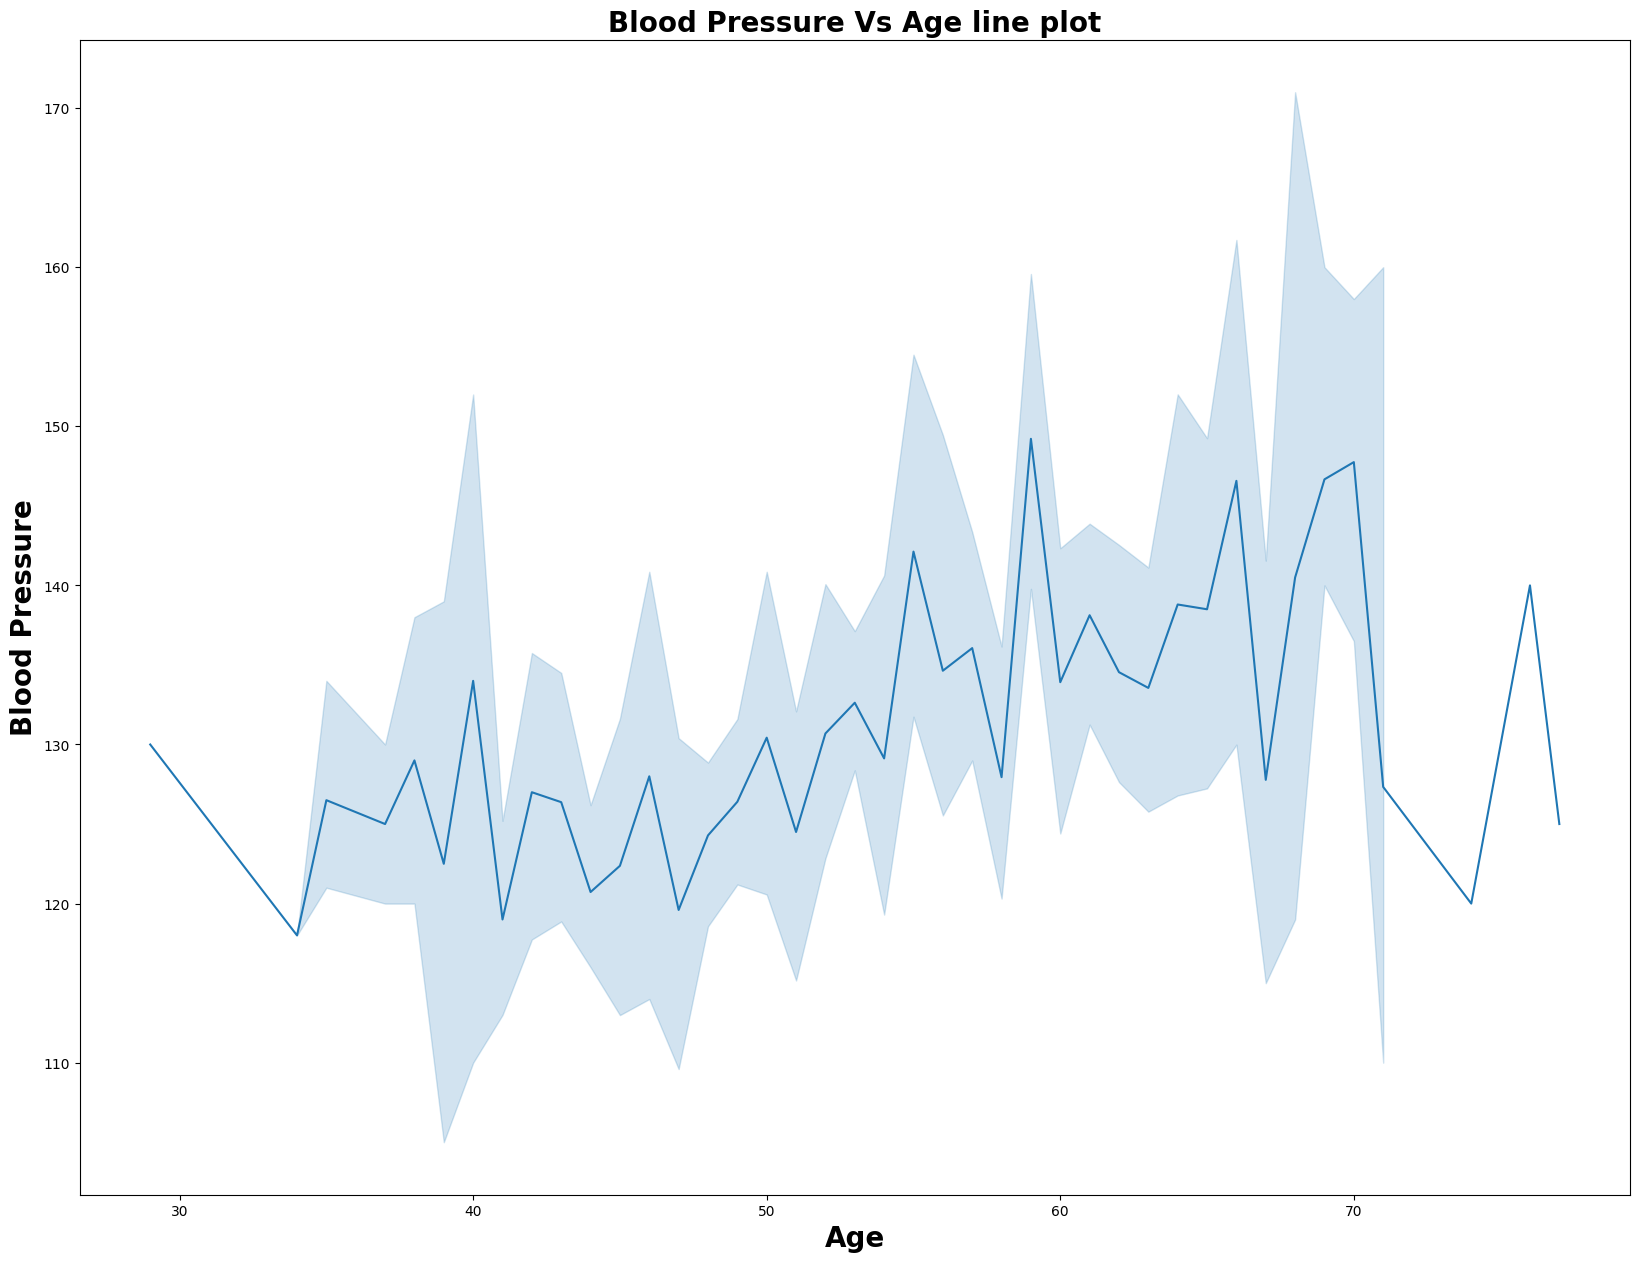

In [191]:
# Blood Pressure Vs Age line plot.

fig,ax=plt.subplots(figsize=(20,15))
sns.lineplot(x=df['age'], y=df['trestbps'])

plt.xlabel('Age',fontweight='bold',fontsize=20)
plt.ylabel('Blood Pressure',fontweight='bold',fontsize=20)
plt.title('Blood Pressure Vs Age line plot',fontweight='bold',fontsize=20)
plt.show()




# **Observation:**

Resting blood pressure of old age (ie. age between 55-70) is higher than middle age and young age. After age 70 years there is a drop in blood pressure.


# **4.4 Serum Cholestrol**

**4.4.1 Serum Cholestrol level of heart disease population.**

In [192]:
df.head(2)

,Fasting_blood_sugar,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_disease_status,Gender,age_group,chest_pain_type,Resting_Electrocardiographic_Results,Exercise_included_Angina,ST_exercise_peak,Thalium_stress,BP_Range
0,Unhealthy,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,Absent,Male,Old Age,typical angina,mid abnormality,no,downsloping,fixed defect,B.P range 131-200
1,Healthy,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,Present,Male,Old Age,asymptomatic,mid abnormality,yes,flat,normal,B.P range 131-200


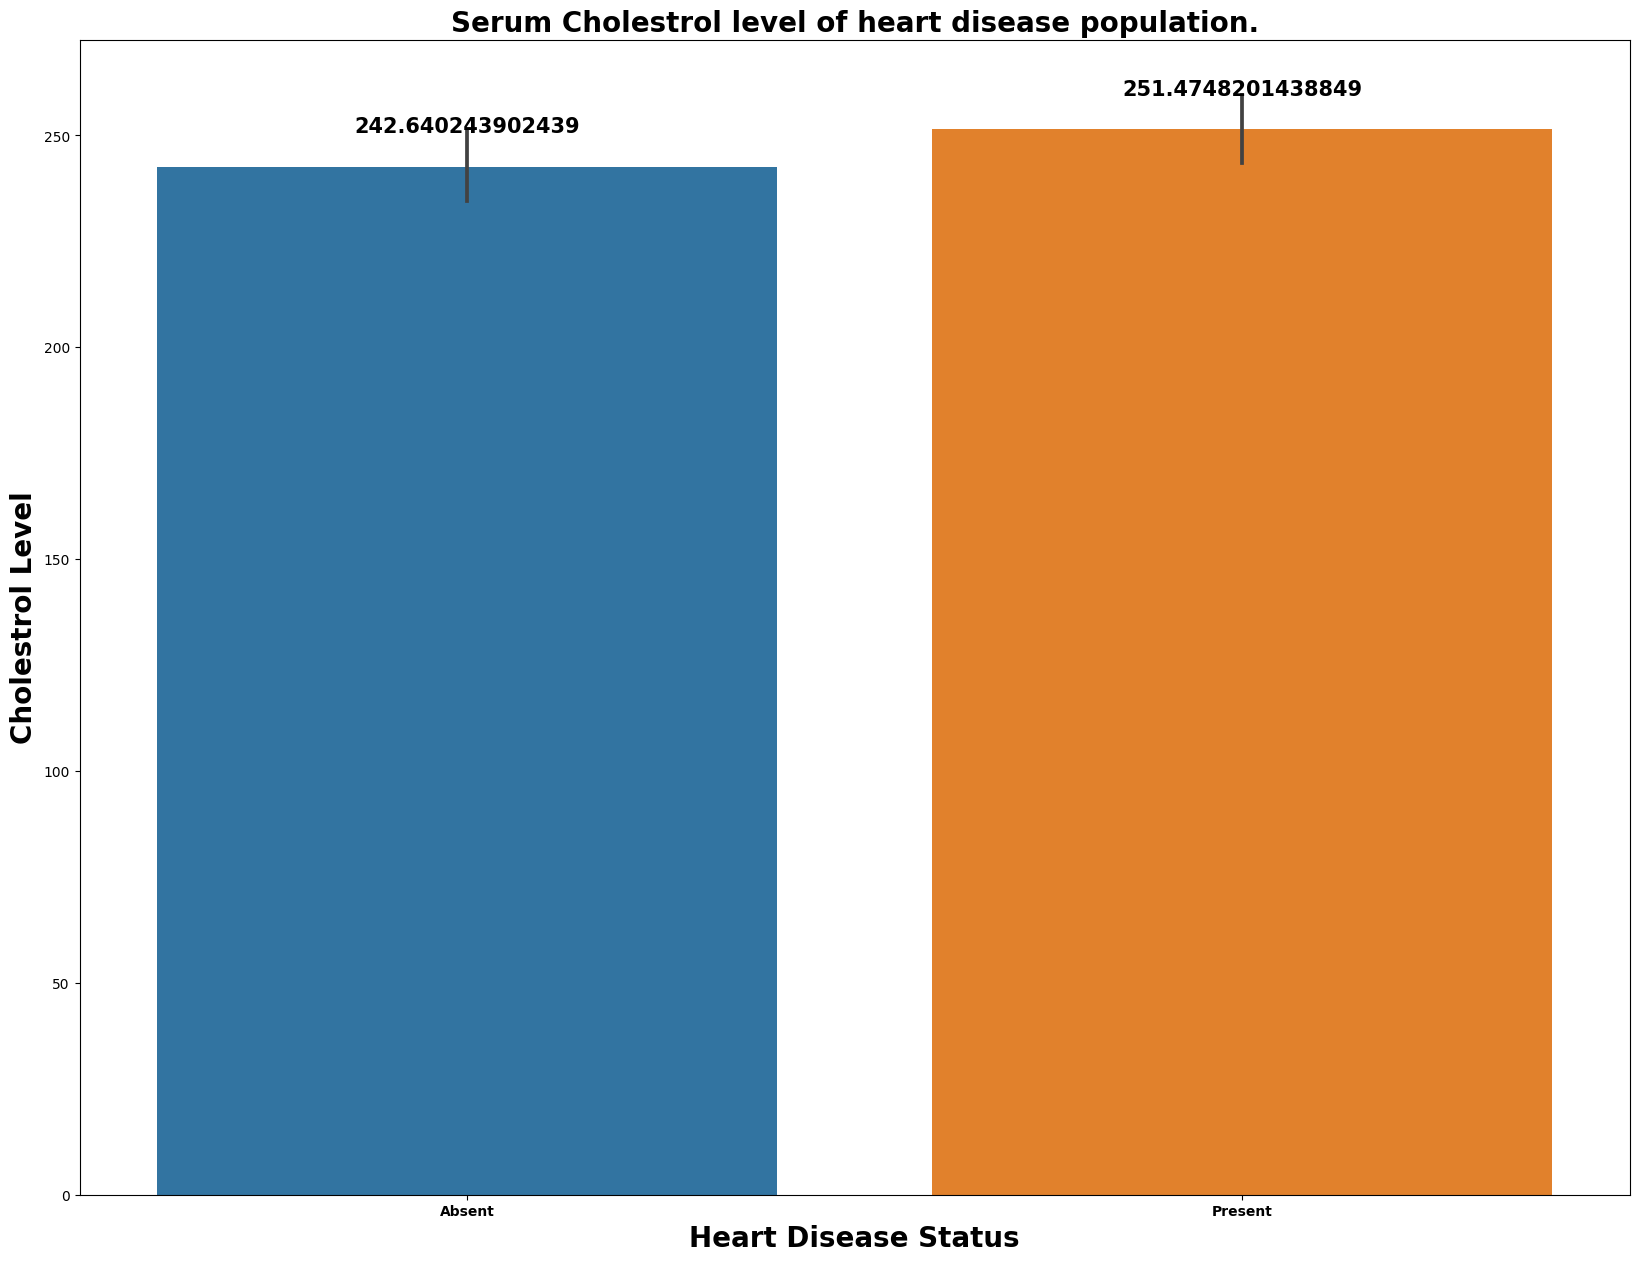

In [193]:
fig,ax=plt.subplots(figsize=(20,15))
a=sns.barplot(x=df['Heart_disease_status'], y=df['chol'])


for i in a.containers:
    for j in i:
        b=j.get_height()
        c=j.get_x()+j.get_width()/2
        plt.text(c,b+8,float(b),ha='center',fontweight='bold',fontsize=15)


plt.xlabel('Heart Disease Status',fontweight='bold',fontsize=20)
plt.ylabel('Cholestrol Level',fontweight='bold',fontsize=20)
plt.title('Serum Cholestrol level of heart disease population.',fontweight='bold',fontsize=20)
plt.xticks(rotation=360,fontweight='bold',fontsize=10)
plt.show()

# **Observation:**

Present heart disease have cholestrol level=251.47

Absent heart disease have cholestrol level=242.64


**conclusion: we can say as per above data, cholestrol doesn't play any significance role for Heart disease.**



## **4.4.2 Serum cholestrol level VS Blood Pressure**

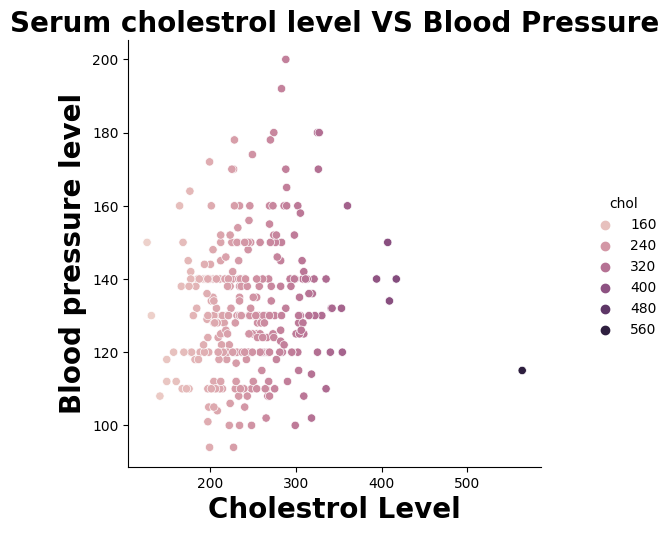

In [194]:

sns.relplot(x='chol',y='trestbps',data=df,hue='chol',kind='scatter')
plt.ylabel('Blood pressure level',fontweight='bold',fontsize=20)
plt.xlabel('Cholestrol Level',fontweight='bold',fontsize=20)
plt.title('Serum cholestrol level VS Blood Pressure',fontweight='bold',fontsize=20)
plt.show()





**Observation:**

There is no relation between cholestrol and Blood presure


**4.4.3 Serum Cholestrol level based on gender**

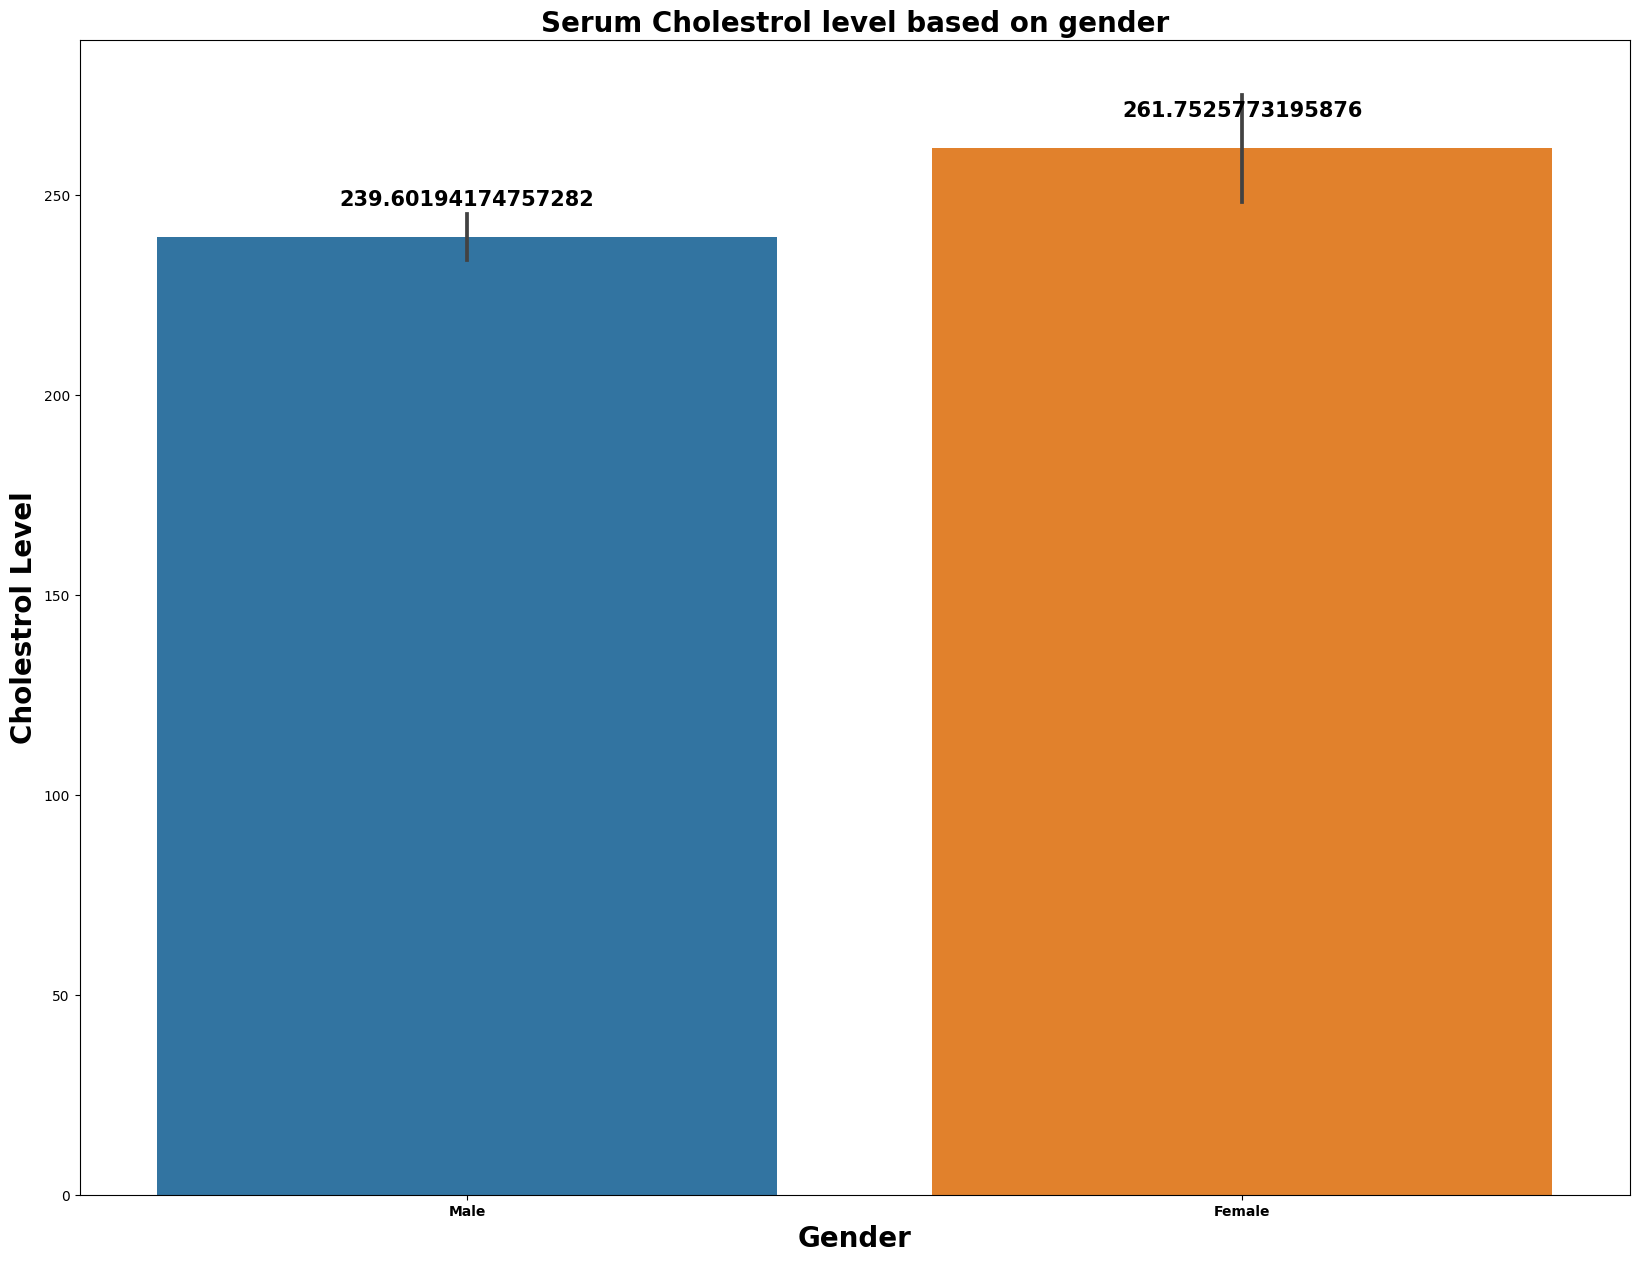

In [195]:
fig,ax=plt.subplots(figsize=(20,15))
a=sns.barplot(x=df['Gender'], y=df['chol'])


for i in a.containers:
    for j in i:
        b=j.get_height()
        c=j.get_x()+j.get_width()/2
        plt.text(c,b+8,float(b),ha='center',fontweight='bold',fontsize=15)


plt.xlabel('Gender',fontweight='bold',fontsize=20)
plt.ylabel('Cholestrol Level',fontweight='bold',fontsize=20)
plt.title('Serum Cholestrol level based on gender',fontweight='bold',fontsize=20)
plt.xticks(rotation=360,fontweight='bold',fontsize=10)
plt.show()

# **Observation:**

Female cholestrol level is higher than male.

**4.4.4 Serum Cholestrol level based on Age group and age.**

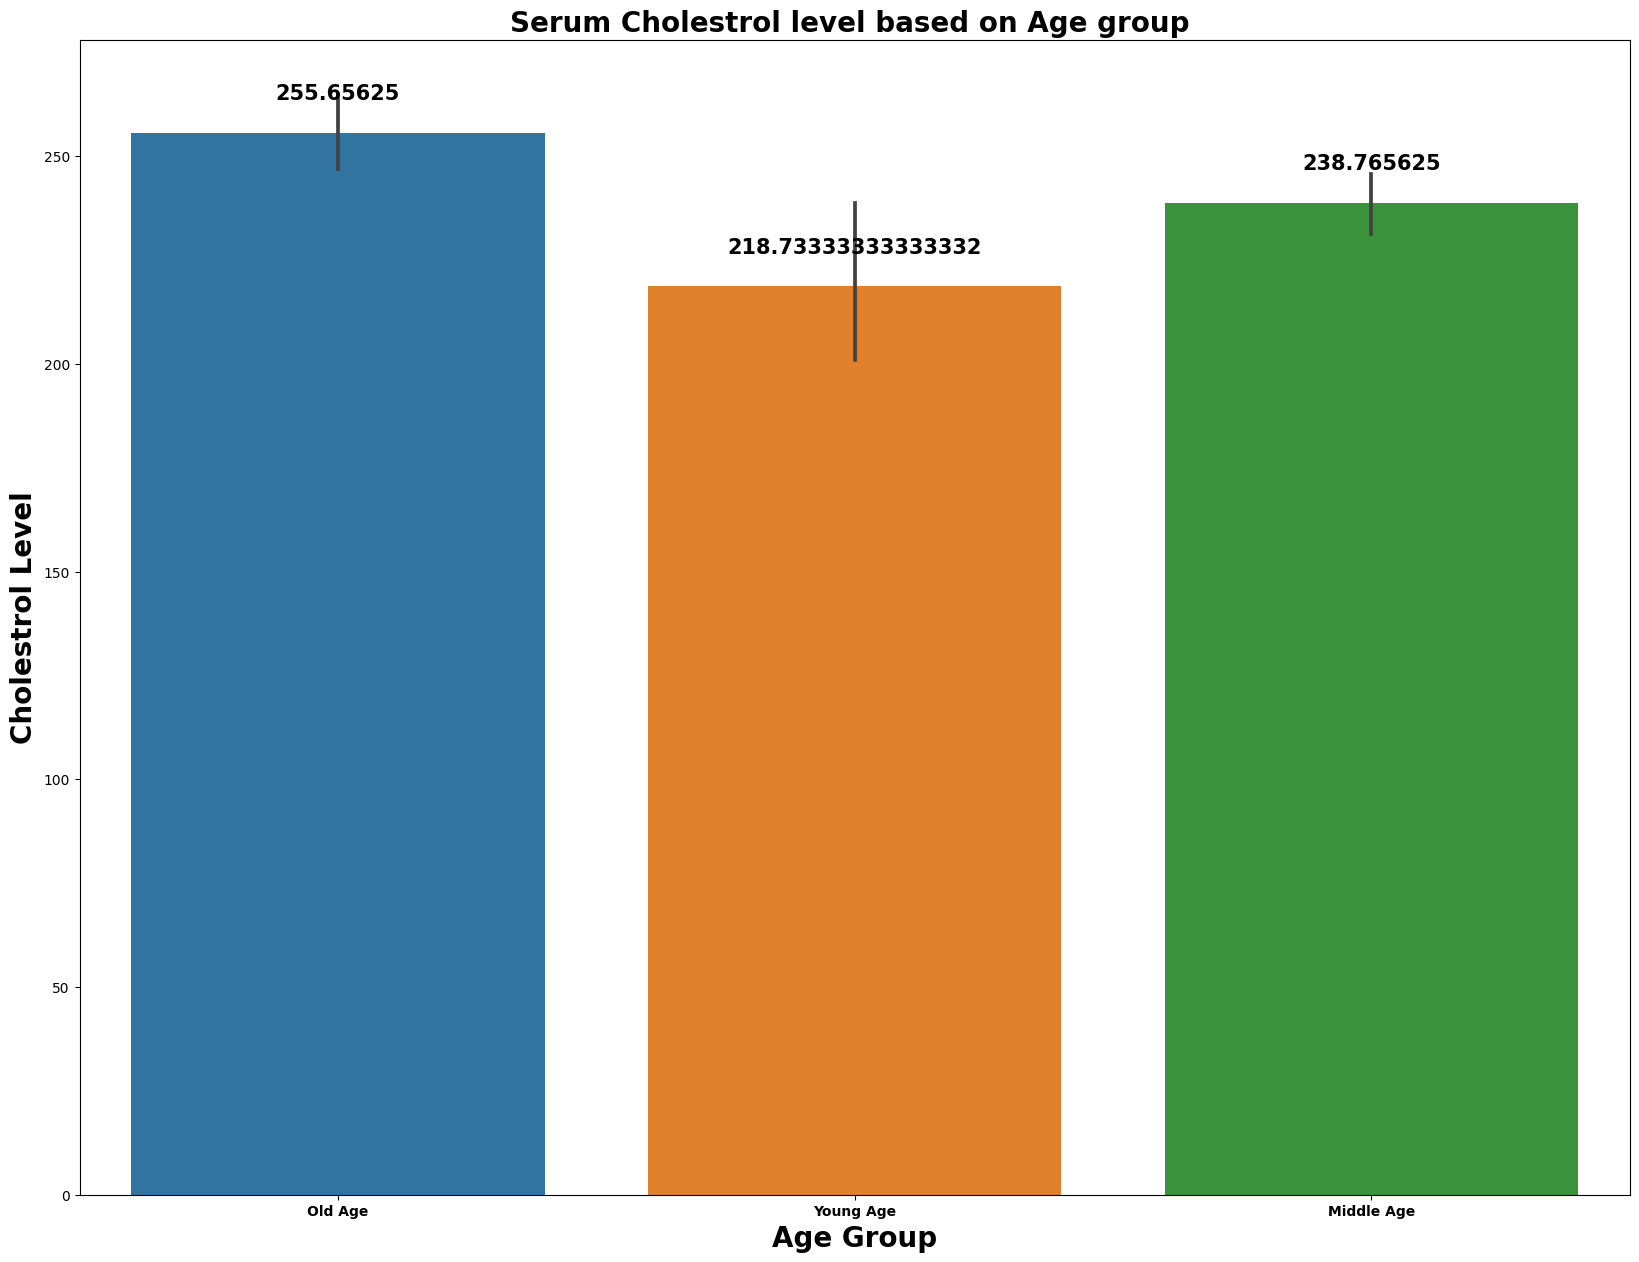

In [196]:
fig,ax=plt.subplots(figsize=(20,15))
a=sns.barplot(x=df['age_group'], y=df['chol'])


for i in a.containers:
    for j in i:
        b=j.get_height()
        c=j.get_x()+j.get_width()/2
        plt.text(c,b+8,float(b),ha='center',fontweight='bold',fontsize=15)


plt.xlabel('Age Group',fontweight='bold',fontsize=20)
plt.ylabel('Cholestrol Level',fontweight='bold',fontsize=20)
plt.title('Serum Cholestrol level based on Age group ',fontweight='bold',fontsize=20)
plt.xticks(rotation=360,fontweight='bold',fontsize=10)
plt.show()

# **Observation:**

cholestrol level among age_group:

Old age > Middle age > Young age


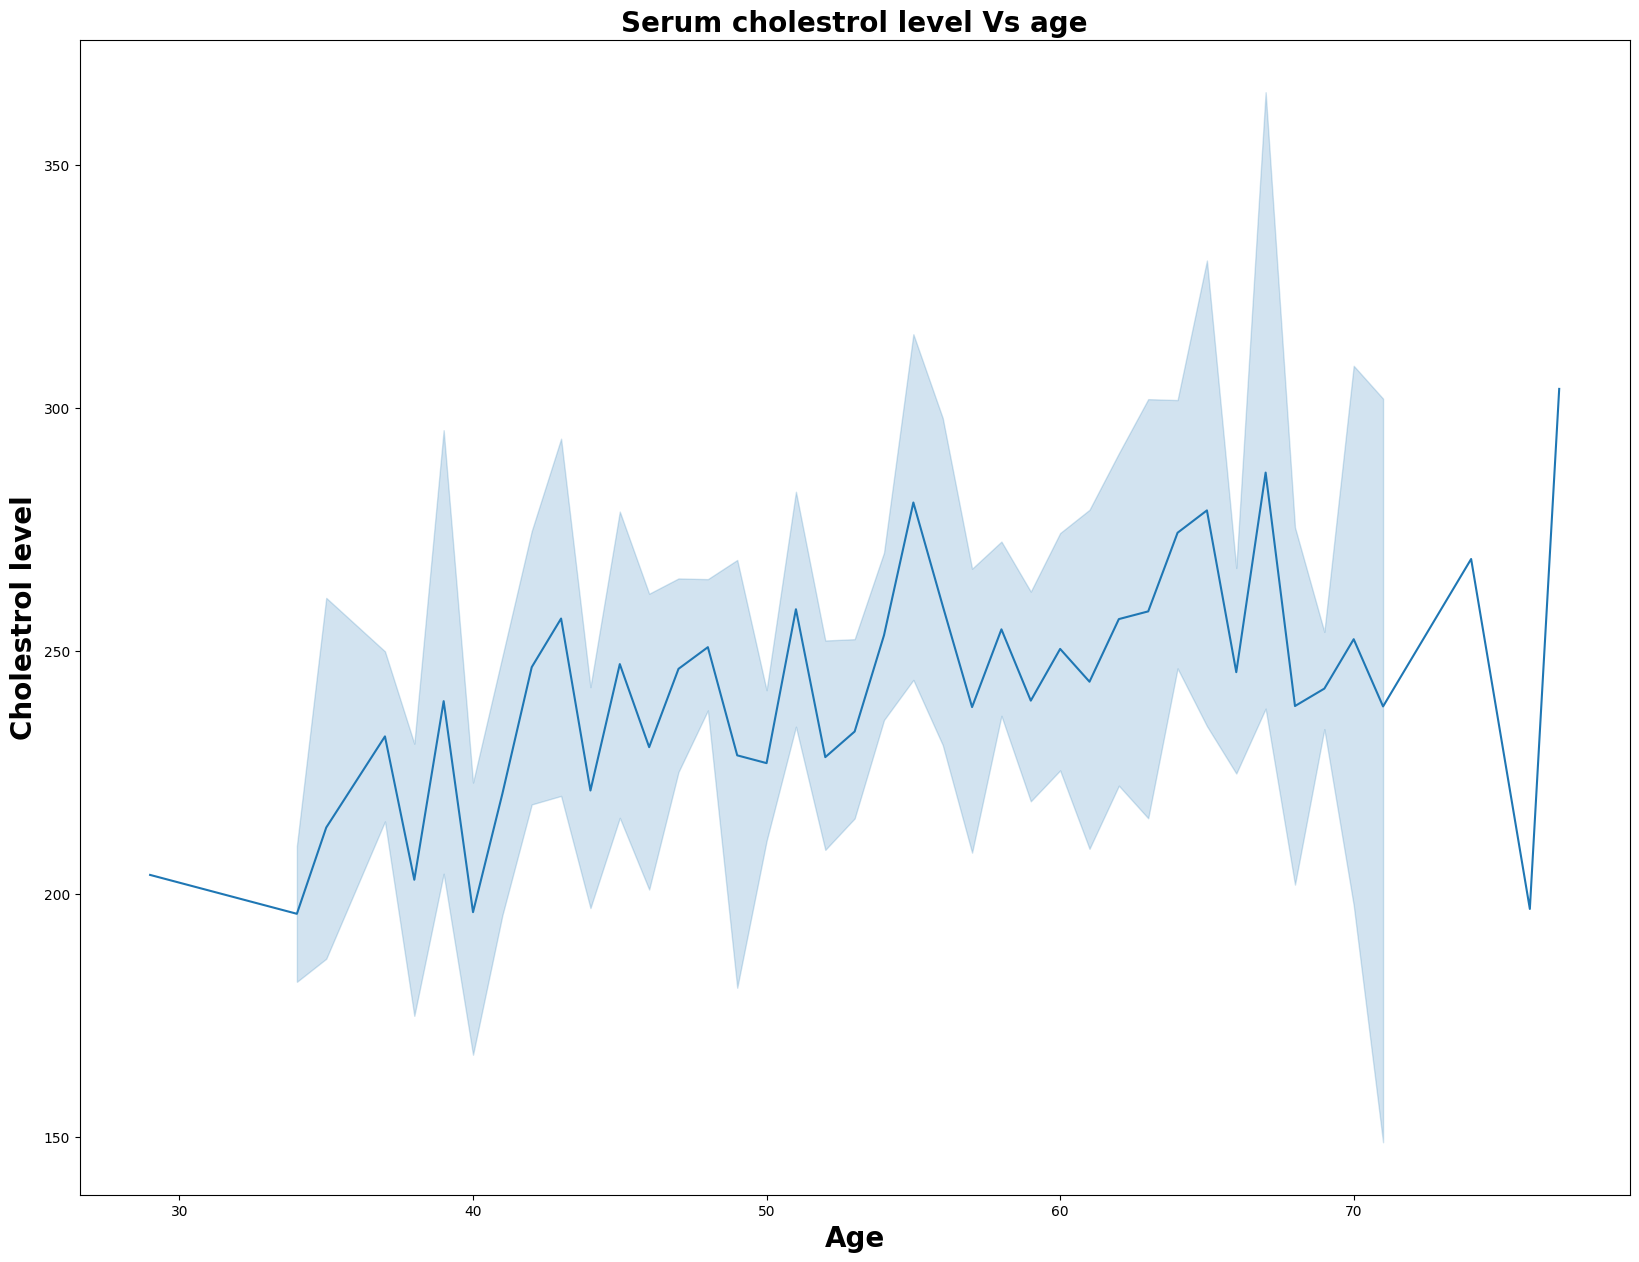

In [197]:
# Serum cholestrol level Vs age
fig,ax=plt.subplots(figsize=(20,15))
sns.lineplot(x=df['age'], y=df['chol'])

plt.xlabel('Age',fontweight='bold',fontsize=20)
plt.ylabel('Cholestrol level',fontsize=20,fontweight='bold')
plt.title('Serum cholestrol level Vs age',fontweight='bold',fontsize=20)
plt.show()

# **Observation:**

Serum Cholestrol level increases gradually between 42 to 65 years.

# **4.5 Fasting Blood sugar** 

4.5.1 Fasting Blood sugar of Heart Disease Population:


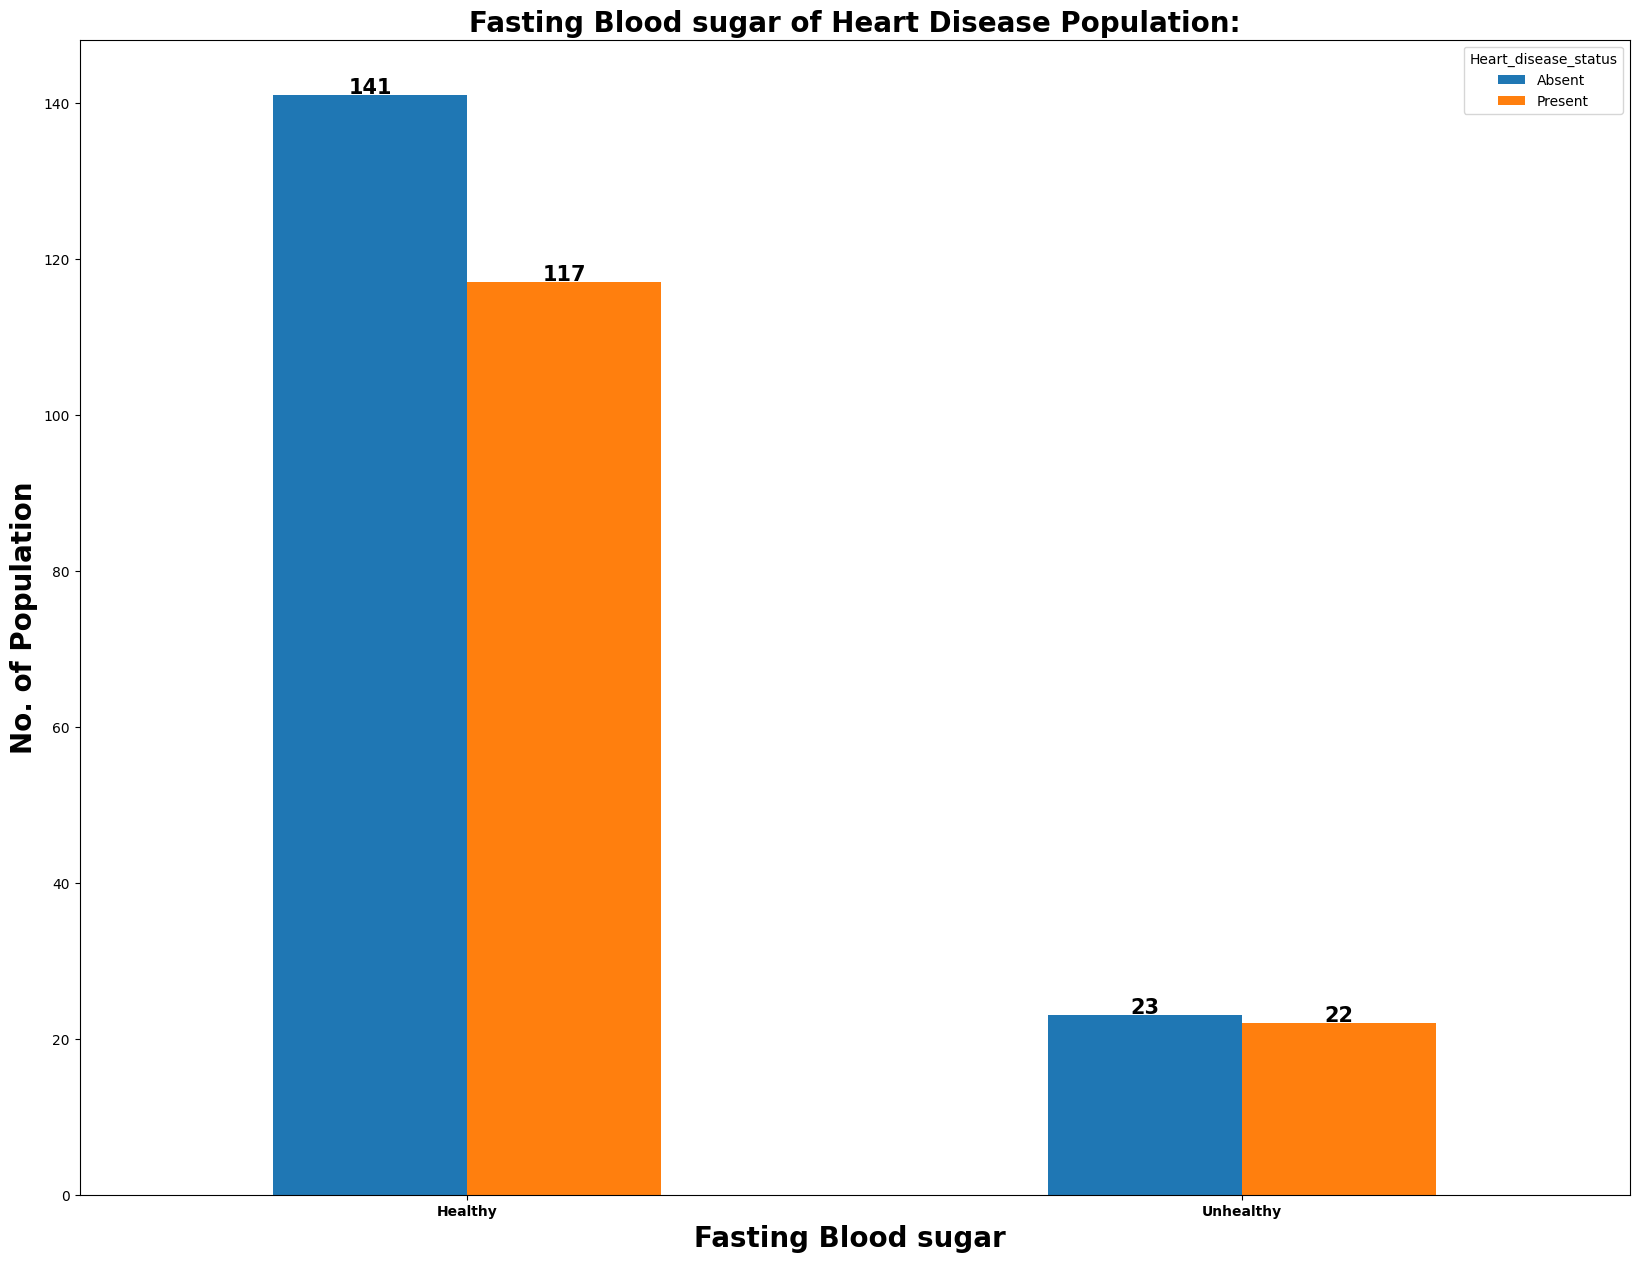

In [198]:
df1=df.groupby('Fasting_blood_sugar')['Heart_disease_status'].value_counts().unstack()

fig,ax=plt.subplots(figsize=(20,15))
a=df1.plot(kind='bar',ax=ax)

for i in a.containers:
    for j in i:
        b=j.get_height()
        c=j.get_x()+j.get_width()/2
        plt.text(c,b+0.2,str(int(b)),ha='center',fontweight='bold',fontsize=15)

plt.xlabel('Fasting Blood sugar ',fontweight='bold',fontsize=20)
plt.ylabel('No. of Population',fontweight='bold',fontsize=20)
plt.title('Fasting Blood sugar of Heart Disease Population:',fontweight='bold',fontsize=20)
plt.xticks(rotation=360,fontweight='bold',fontsize=10)
plt.show()

# **Observation:**

Fasting blood sugar has no any significance on Heart disease Risk


**4.5.2 Fasting Blood sugar of Population based on Gender.**

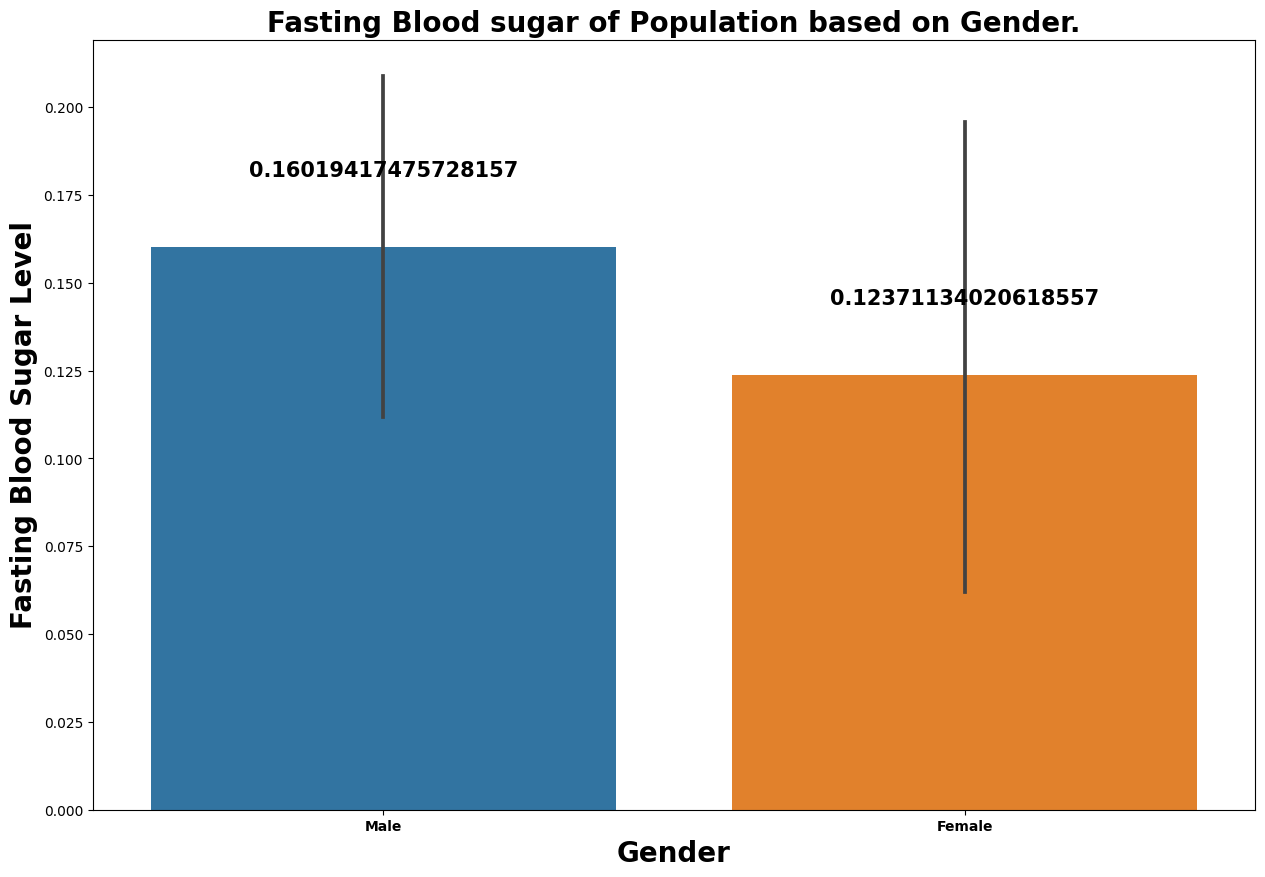

In [199]:
fig,ax=plt.subplots(figsize=(15,10))
a=sns.barplot(x=df['Gender'], y=df['fbs'])


for i in a.containers:
    for j in i:
        b=j.get_height()
        c=j.get_x()+j.get_width()/2
        plt.text(c,b+0.02,float(b),ha='center',fontweight='bold',fontsize=15)


plt.xlabel('Gender',fontweight='bold',fontsize=20)
plt.ylabel('Fasting Blood Sugar Level',fontweight='bold',fontsize=20)
plt.title('Fasting Blood sugar of Population based on Gender.',fontweight='bold',fontsize=20)
plt.xticks(rotation=360,fontweight='bold',fontsize=10)
plt.show()

# **Observation:**

 Fasting Blood Sugar Level of male is greater than Female.

**4.5.3 Fasting Blood Sugar based on Age group and age.**

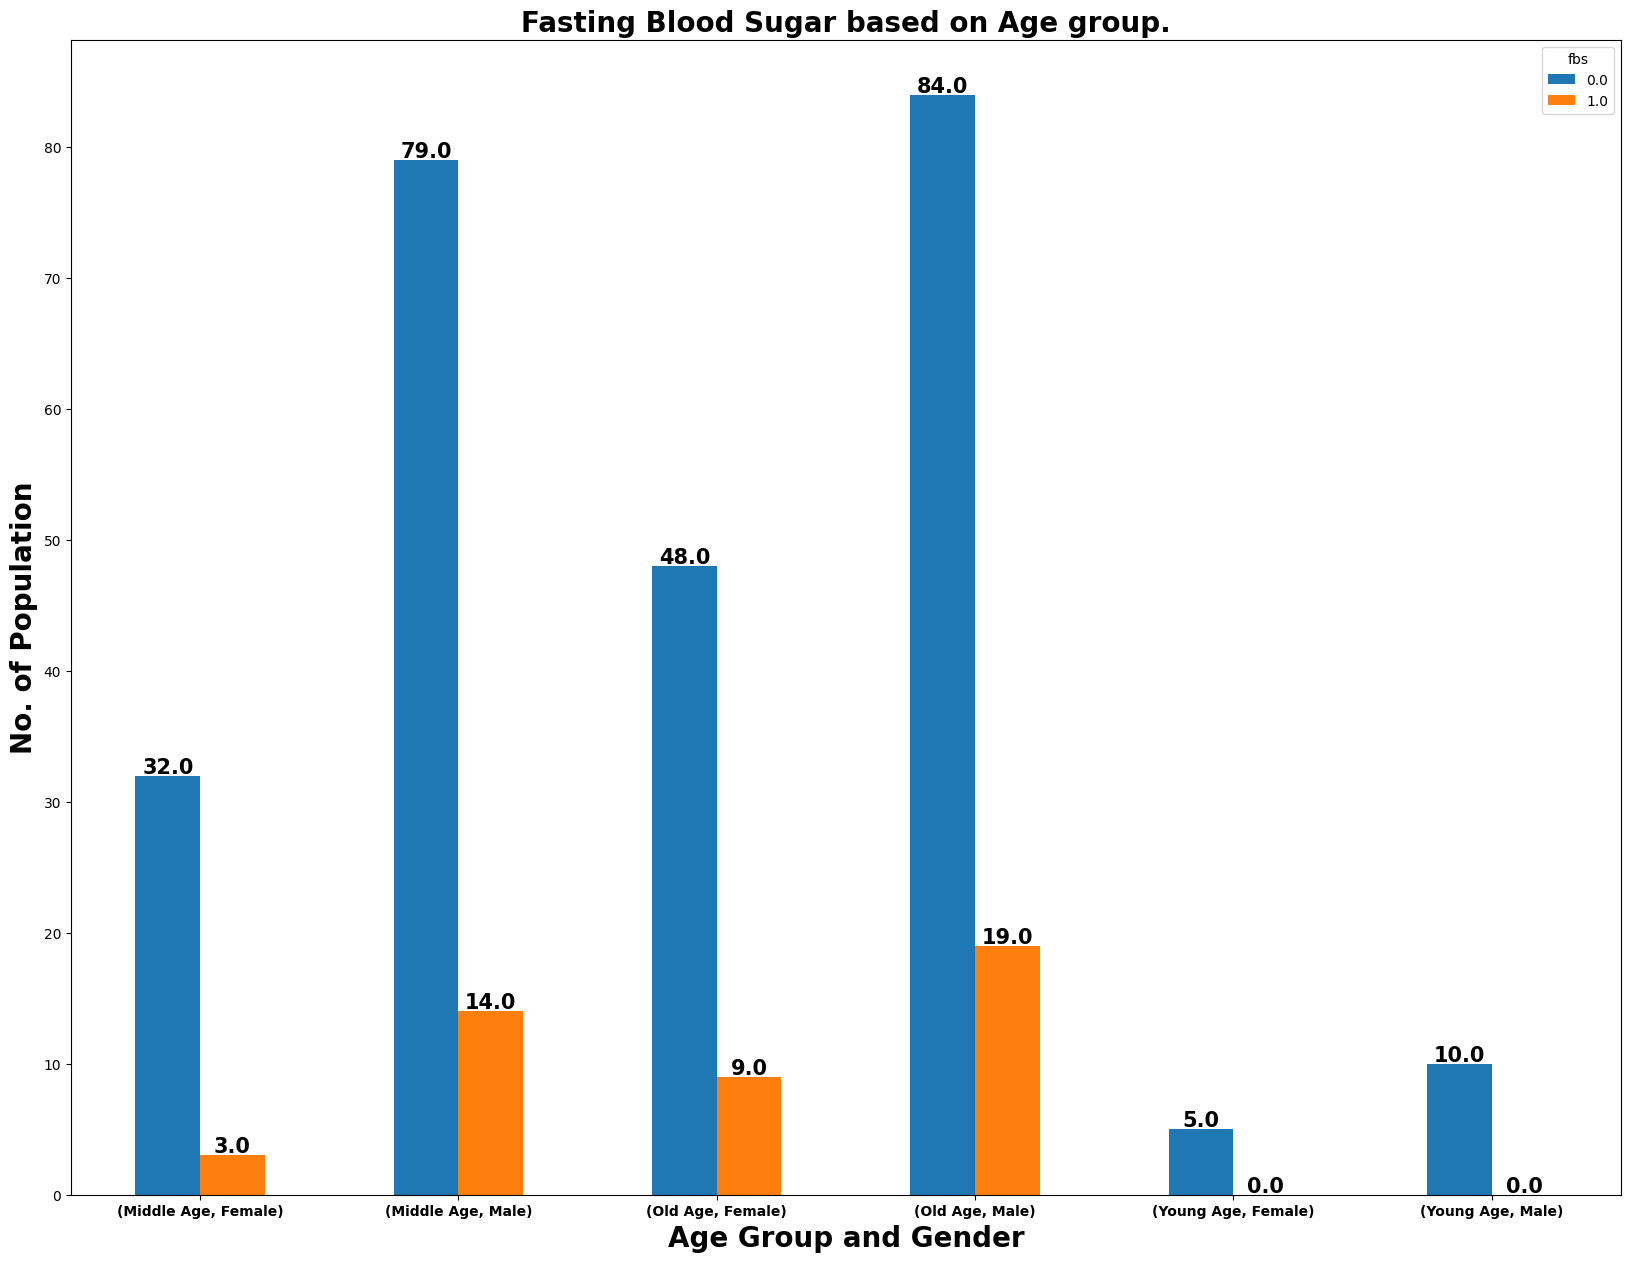

In [200]:
df1=df.groupby(['age_group','Gender'])['fbs'].value_counts().unstack()

fig,ax=plt.subplots(figsize=(20,15))
a=df1.plot(kind='bar',ax=ax)

for i in a.containers:
    for j in i:
        x=j.get_height()
        y=j.get_x()+j.get_width()/2
        plt.text(y,x+0.2,float(x),ha='center',fontweight='bold',fontsize=15)

plt.xlabel('Age Group and Gender',fontweight='bold',fontsize=20)
plt.ylabel('No. of Population',fontweight='bold',fontsize=20)
plt.title('Fasting Blood Sugar based on Age group.',fontweight='bold',fontsize=20)
plt.xticks(rotation=360,fontweight='bold',fontsize=10)
plt.show()

# **Observation:**

**For female,middle age group:** 

fbs(0.0)= 32

fbs(1.0)= 03

**For female,old age group:** 

fbs(0.0)= 48

fbs(1.0)= 09

**For female,young age group:** 

fbs(0.0)= 05

fbs(1.0)= 00

**For male,middle age group:** 

fbs(0.0)= 79

fbs(1.0)= 14

**For male,old age group**: 

fbs(0.0)= 84

fbs(1.0)= 19

**For male,young age group:** 

fbs(0.0)= 10

fbs(1.0)= 00


# **4.6 Resting Electrocardiographic Results**

**4.6.1 Resting Electrocardiographic Results of population and Heart Disease**



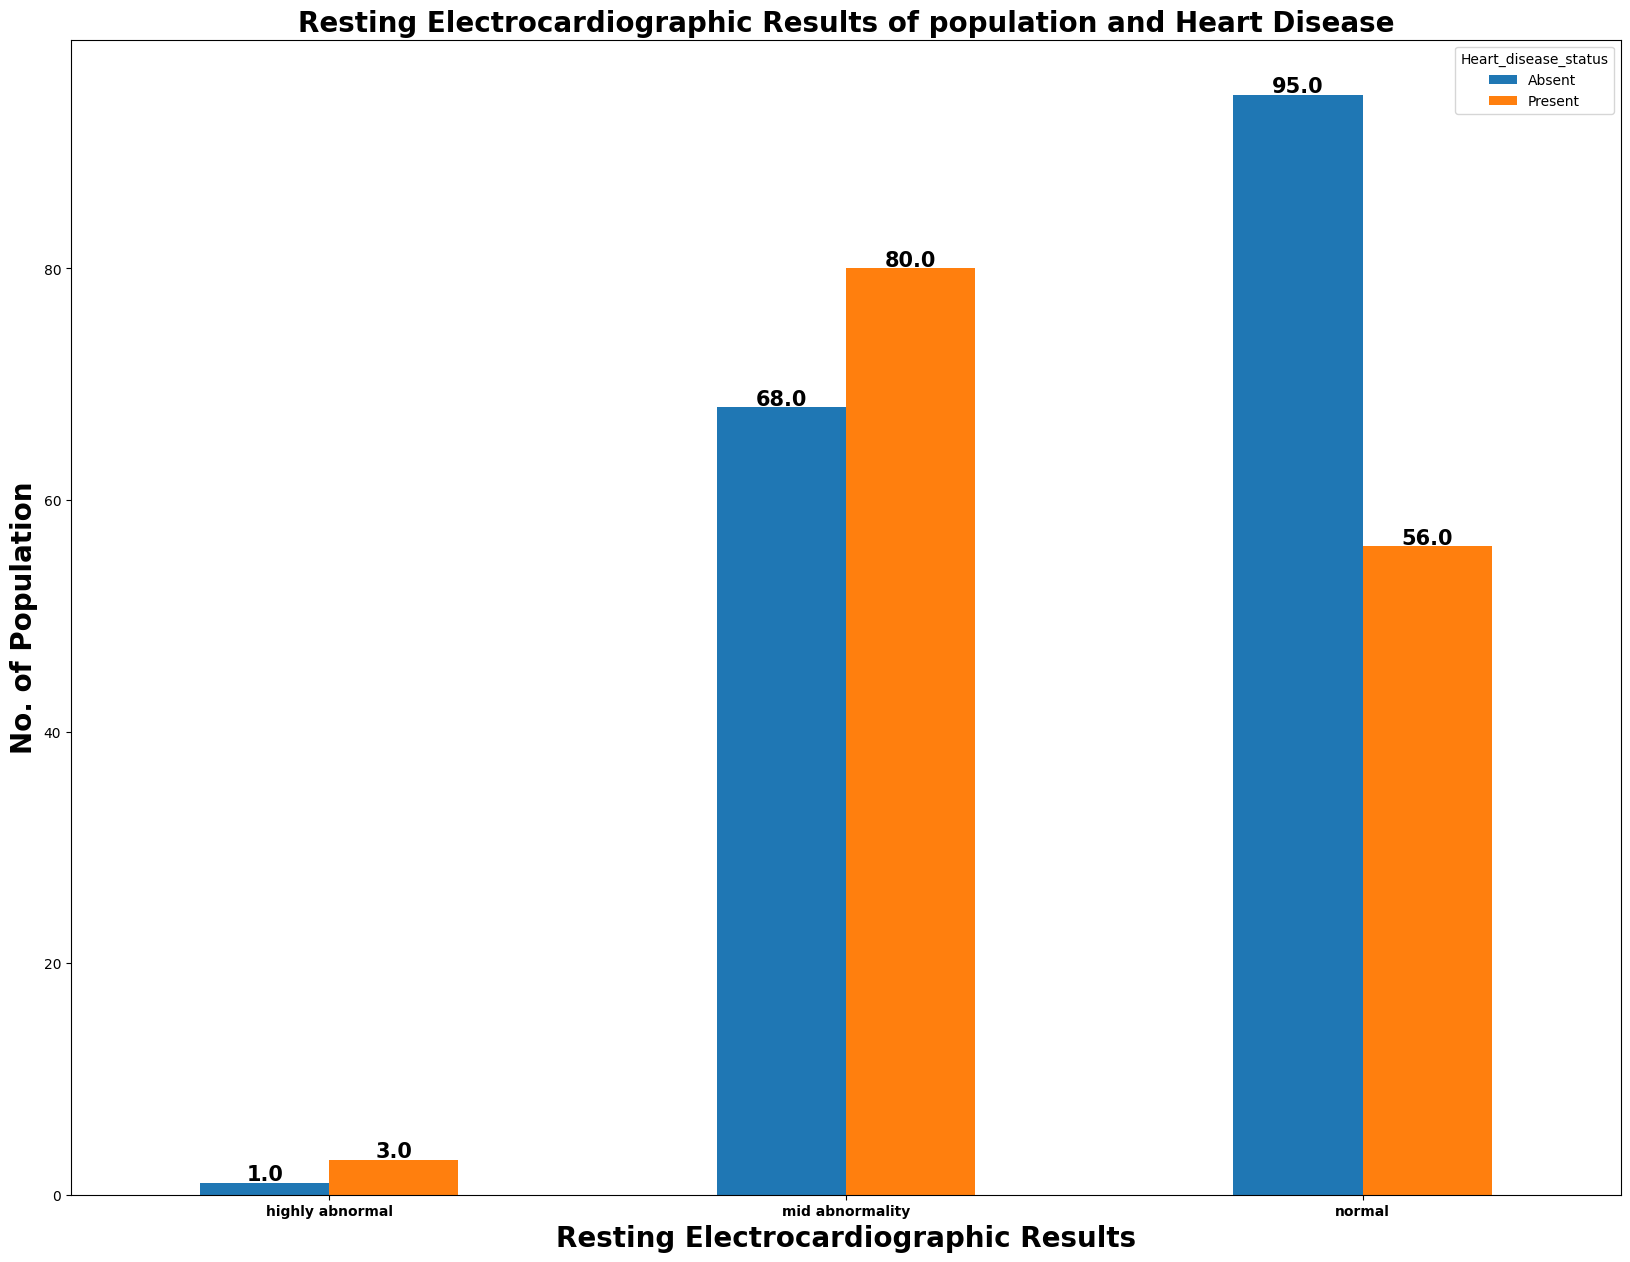

In [201]:
df1=df.groupby('Resting_Electrocardiographic_Results')['Heart_disease_status'].value_counts().unstack()

fig,ax=plt.subplots(figsize=(20,15))
a=df1.plot(kind='bar',ax=ax)

for i in a.containers:
    for j in i:
        x=j.get_height()
        y=j.get_x()+j.get_width()/2
        plt.text(y,x+0.2,float(x),ha='center',fontweight='bold',fontsize=15)

plt.xlabel('Resting Electrocardiographic Results',fontweight='bold',fontsize=20)
plt.ylabel('No. of Population',fontweight='bold',fontsize=20)
plt.title('Resting Electrocardiographic Results of population and Heart Disease',fontweight='bold',fontsize=20)
plt.xticks(rotation=360,fontweight='bold',fontsize=10)
plt.show()

# **Observation:**

Resting Electrocardiographic Results in population is as follows:

Midabnormality with heart disease > normal with heart disease > highly abnormal with heart disease.

## **4.6.2 Resting Electrocardiographic Results of population based on Gender**

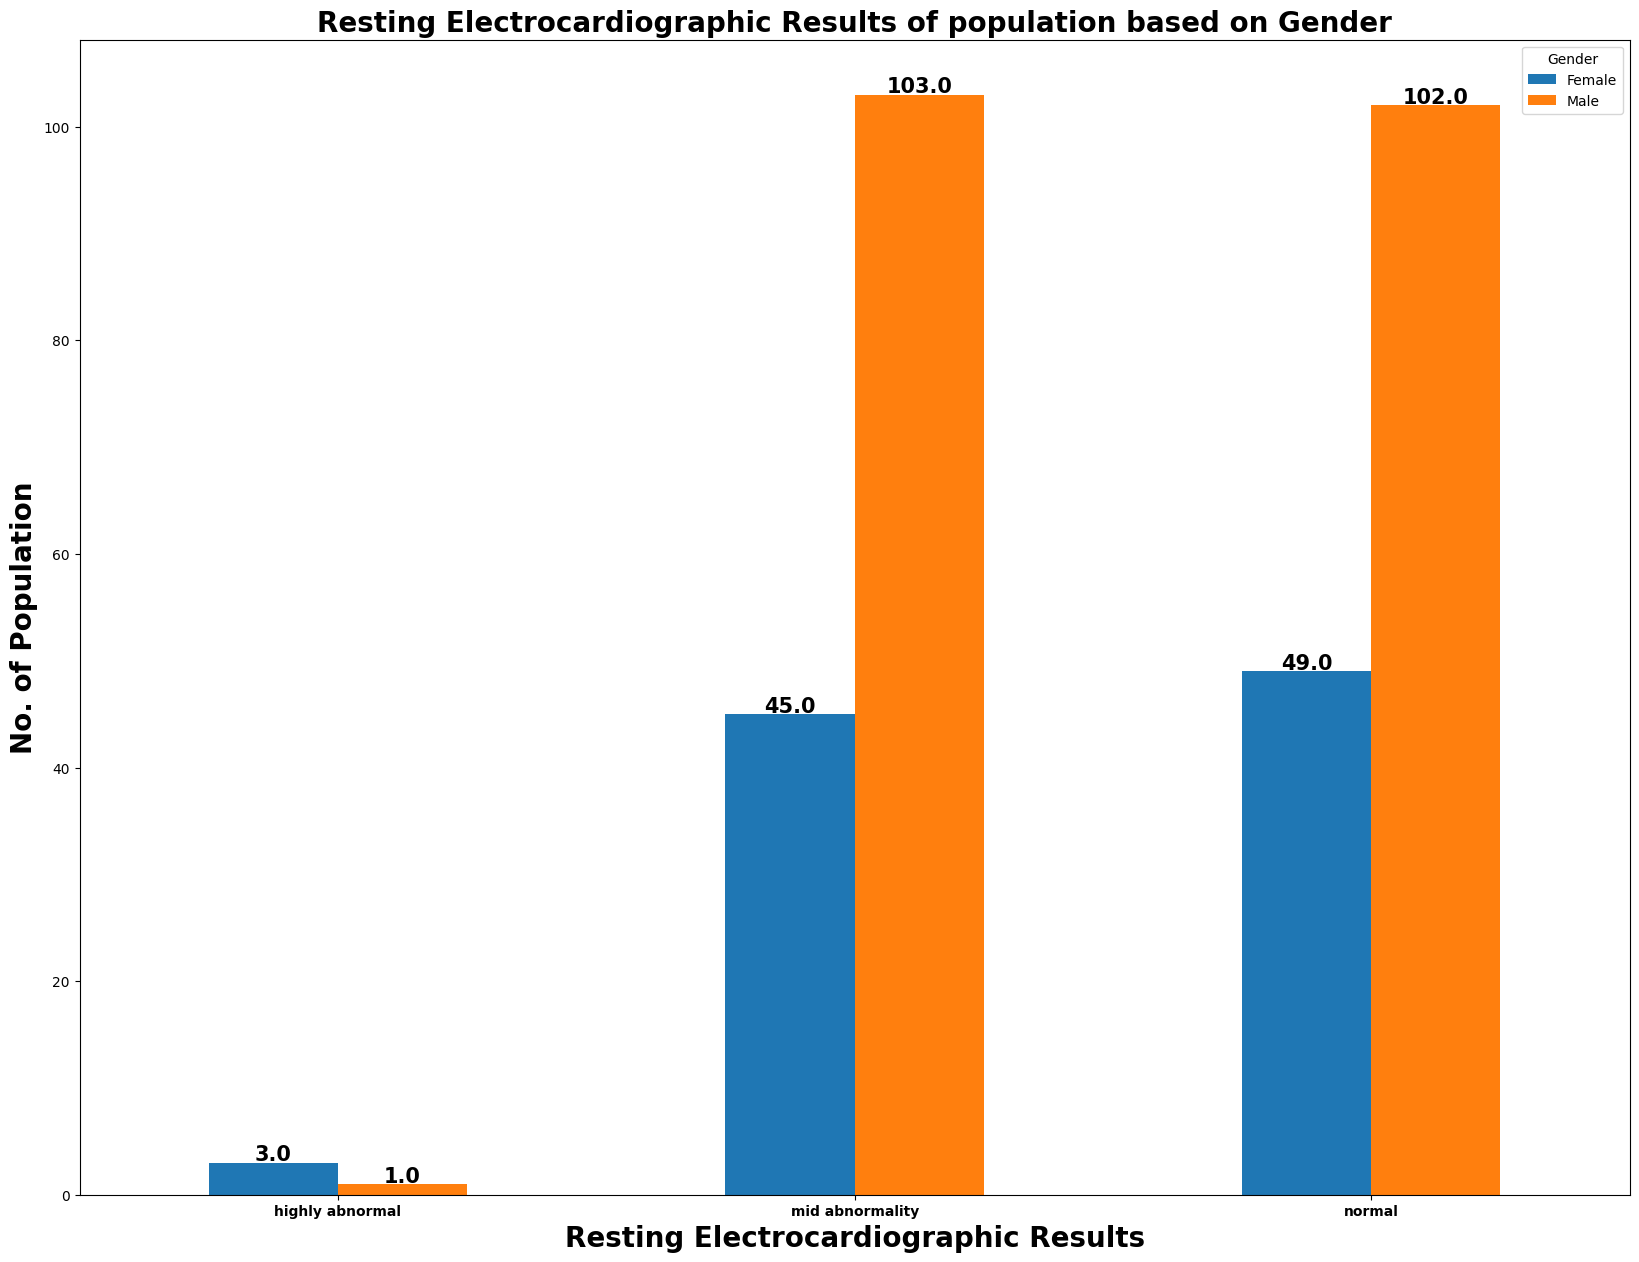

In [202]:
df1=df.groupby('Resting_Electrocardiographic_Results')['Gender'].value_counts().unstack()

fig,ax=plt.subplots(figsize=(20,15))
a=df1.plot(kind='bar',ax=ax)

for i in a.containers:
    for j in i:
        x=j.get_height()
        y=j.get_x()+j.get_width()/2
        plt.text(y,x+0.2,float(x),ha='center',fontweight='bold',fontsize=15)

plt.xlabel('Resting Electrocardiographic Results',fontweight='bold',fontsize=20)
plt.ylabel('No. of Population',fontweight='bold',fontsize=20)
plt.title('Resting Electrocardiographic Results of population based on Gender',fontweight='bold',fontsize=20)
plt.xticks(rotation=360,fontweight='bold',fontsize=10)
plt.show()

# **Observation:**
Resting Electrocardiographic Results in population is as follows:



*  For Male:
Midabnormality > normal > highly abnormal
*   For Female:
 normal > Midabnormality > highly abnormal



## **4.6.3 Resting Electrocardiographic Results of population based on Age group**

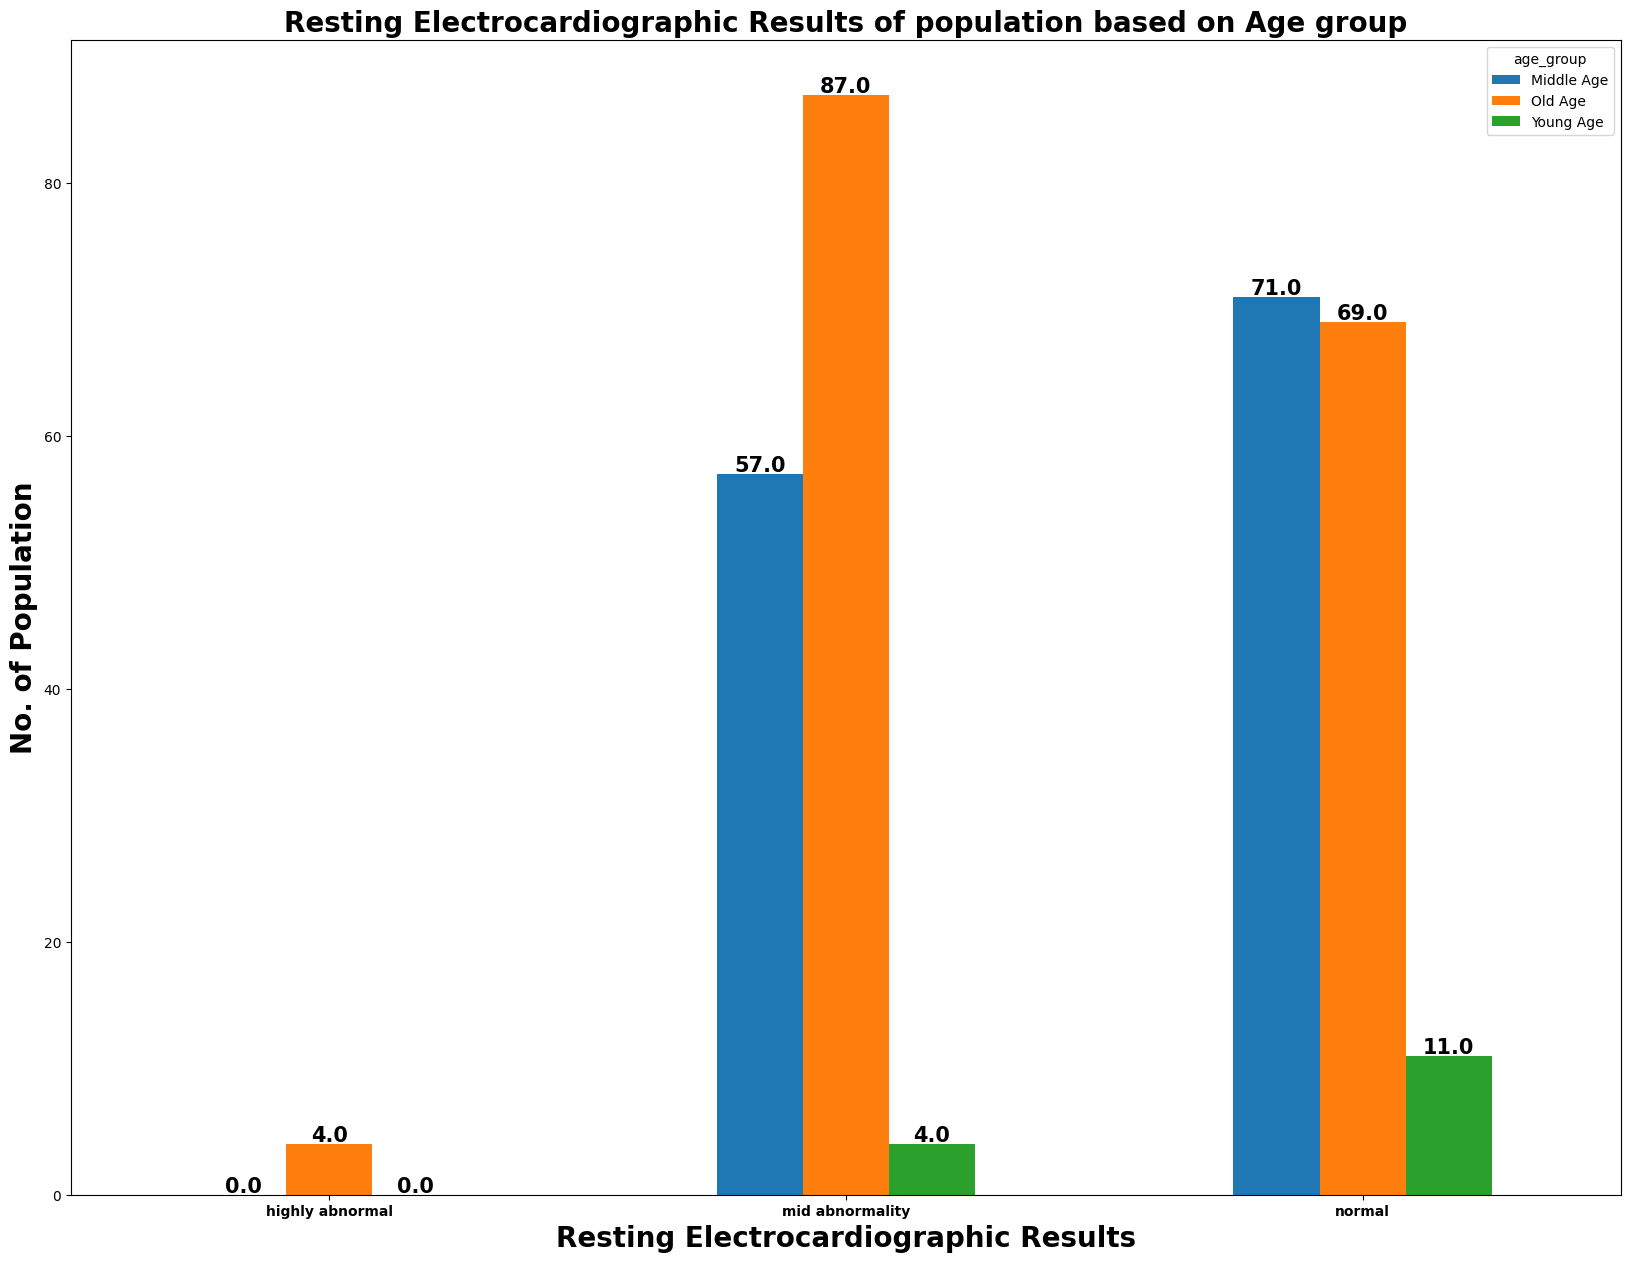

In [203]:
df1=df.groupby('Resting_Electrocardiographic_Results')['age_group'].value_counts().unstack()

fig,ax=plt.subplots(figsize=(20,15))
a=df1.plot(kind='bar',ax=ax)

for i in a.containers:
    for j in i:
        x=j.get_height()
        y=j.get_x()+j.get_width()/2
        plt.text(y,x+0.2,float(x),ha='center',fontweight='bold',fontsize=15)

plt.xlabel('Resting Electrocardiographic Results',fontweight='bold',fontsize=20)
plt.ylabel('No. of Population',fontweight='bold',fontsize=20)
plt.title('Resting Electrocardiographic Results of population based on Age group',fontweight='bold',fontsize=20)
plt.xticks(rotation=360,fontweight='bold',fontsize=10)
plt.show()

# **Observation:**
Resting Electrocardiographic Results in population is as follows:

For Middle Age: normal > Midabnormality > highly abnormal

For Old Age:  Midabnormality >  normal > highly abnormal

For Young Age: normal > Midabnormality > highly abnormal

# **4.7 Maximum Heart Rate Achieved**

**4.7.1 Maximum Heart Rate Achieved Vs Heart Disease**

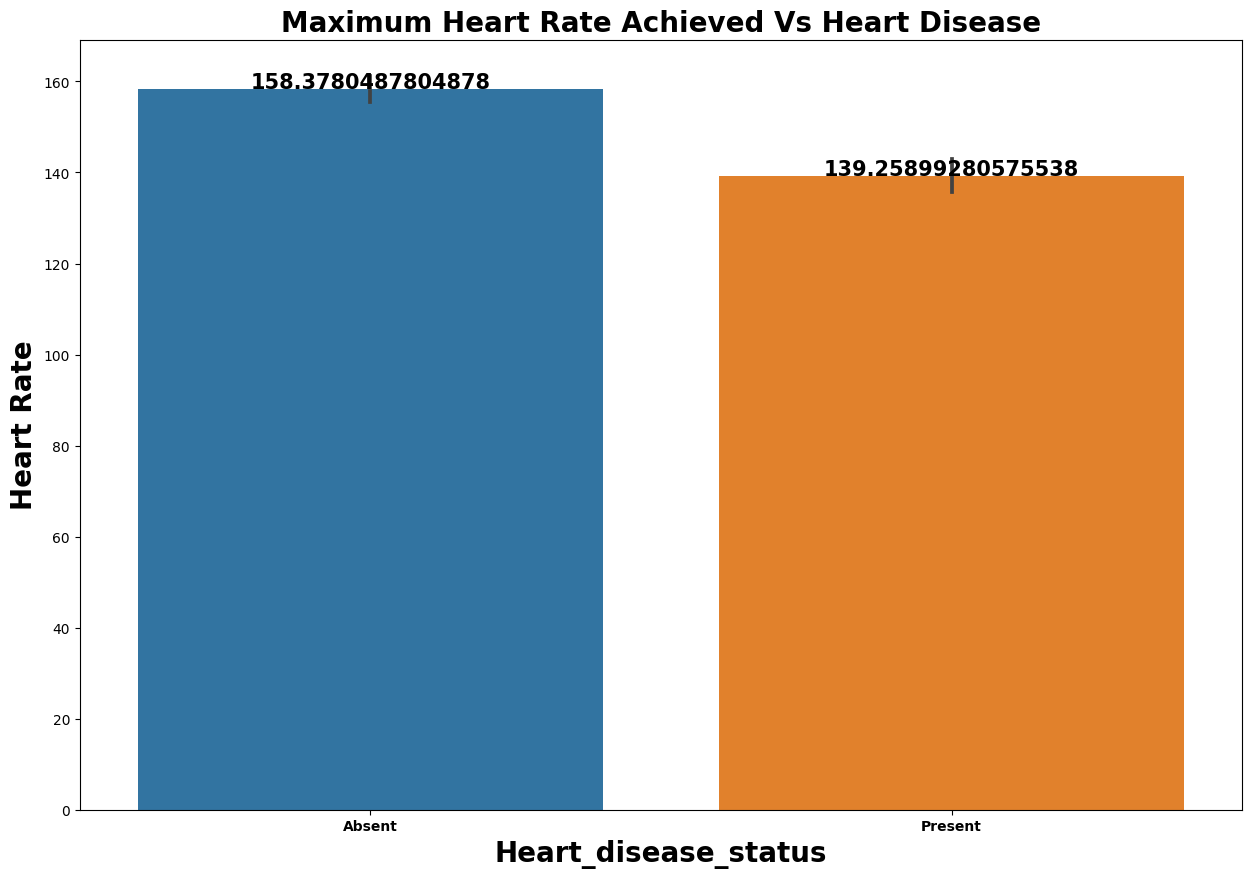

In [204]:
fig,ax=plt.subplots(figsize=(15,10))
a=sns.barplot(x=df['Heart_disease_status'], y=df['thalach'])


for i in a.containers:
    for j in i:
        b=j.get_height()
        c=j.get_x()+j.get_width()/2
        plt.text(c,b+0.02,float(b),ha='center',fontweight='bold',fontsize=15)


plt.xlabel('Heart_disease_status',fontweight='bold',fontsize=20)
plt.ylabel('Heart Rate',fontweight='bold',fontsize=20)
plt.title('Maximum Heart Rate Achieved Vs Heart Disease',fontweight='bold',fontsize=20)
plt.xticks(rotation=360,fontweight='bold',fontsize=10)
plt.show()

# **Observation:**

Maximum Heart Rate achieved as follows:

Absent(158.37) > Present(139.25) 


**4.7.2 Maximum Heart Rate Achieved based on gender**

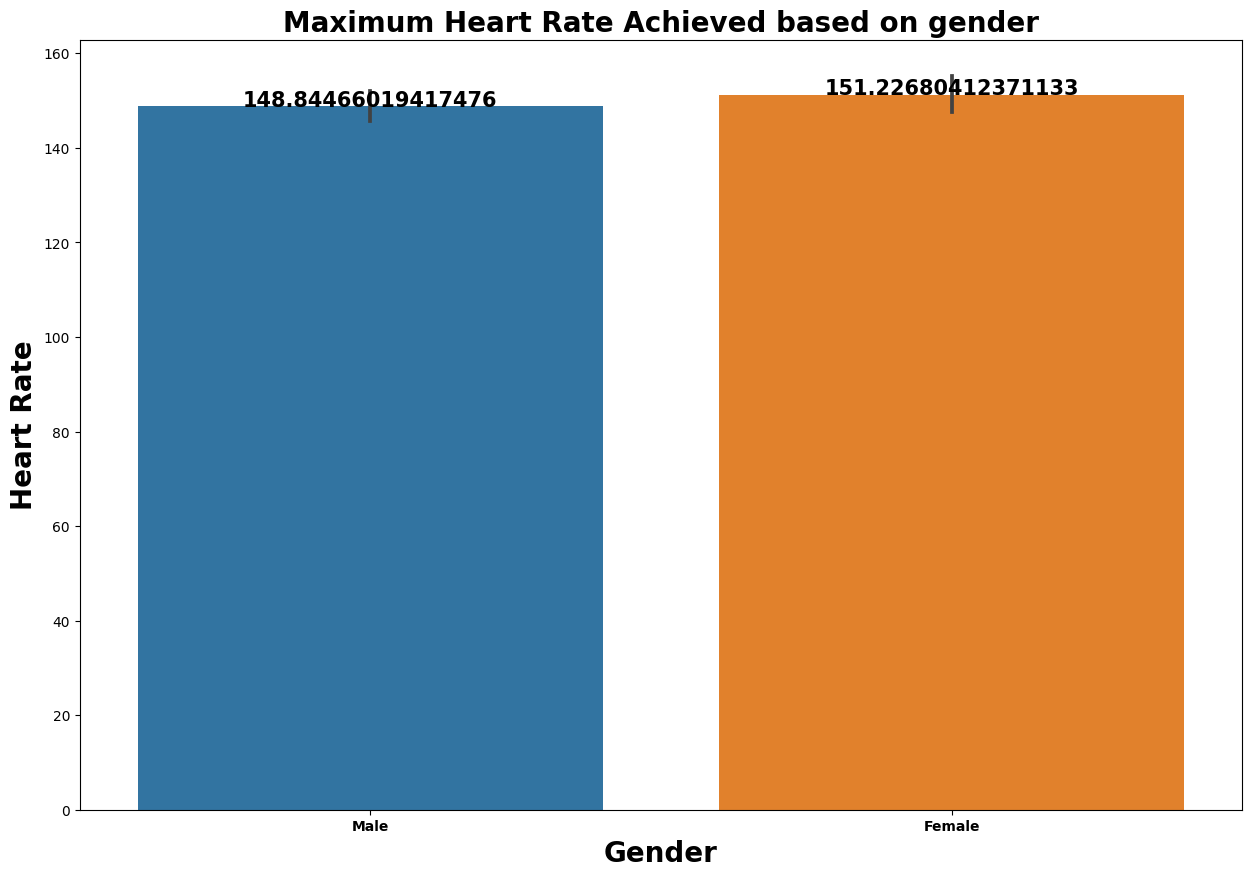

In [205]:
fig,ax=plt.subplots(figsize=(15,10))
a=sns.barplot(x=df['Gender'], y=df['thalach'])


for i in a.containers:
    for j in i:
        b=j.get_height()
        c=j.get_x()+j.get_width()/2
        plt.text(c,b+0.02,float(b),ha='center',fontweight='bold',fontsize=15)


plt.xlabel('Gender',fontweight='bold',fontsize=20)
plt.ylabel('Heart Rate',fontweight='bold',fontsize=20)
plt.title('Maximum Heart Rate Achieved based on gender',fontweight='bold',fontsize=20)
plt.xticks(rotation=360,fontweight='bold',fontsize=10)
plt.show()

# **Observation:**

Maximum Heart Rate Achieved by Female (151.22) > Maximum Heart Rate Achieved by male(148.84) 

**4.7.3 Maximum Heart Rate Achieved based on age group**

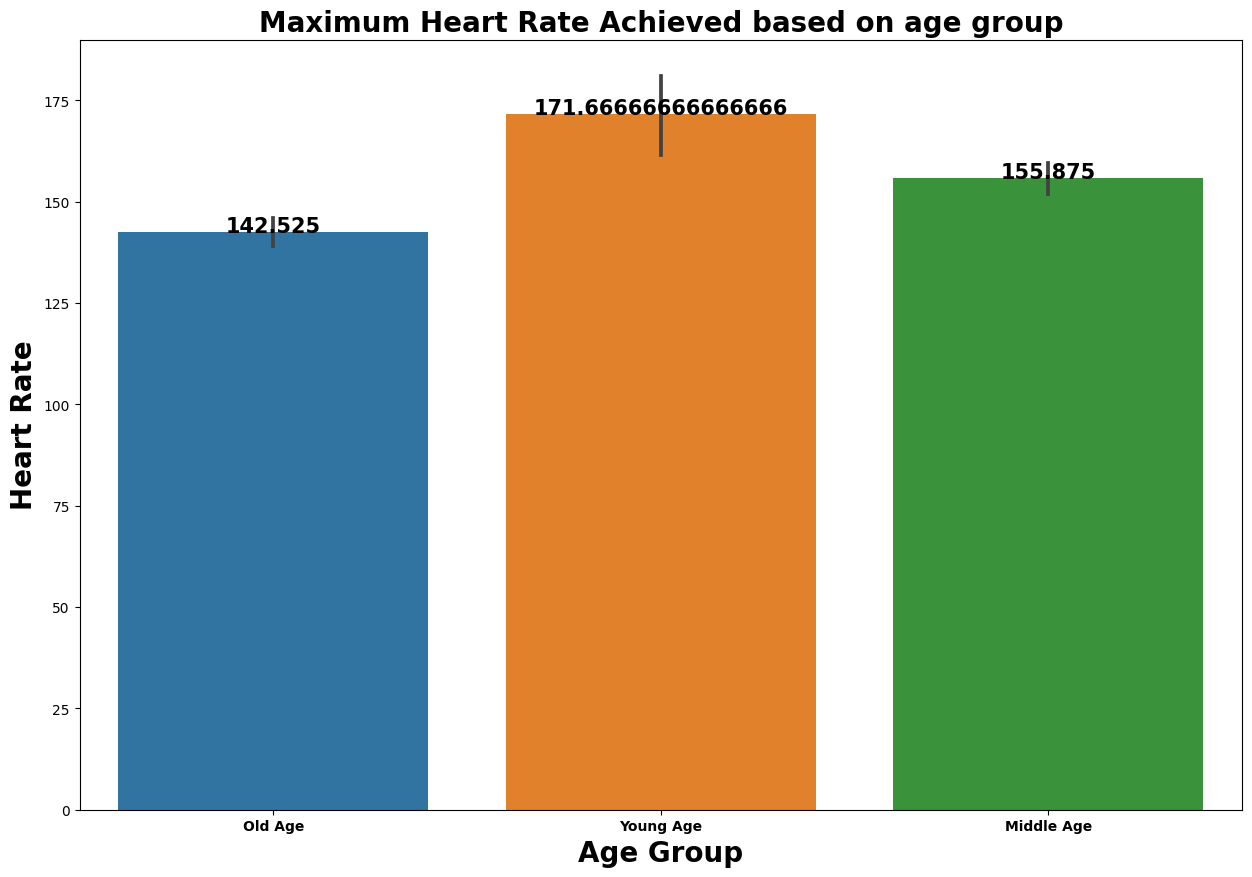

In [206]:
fig,ax=plt.subplots(figsize=(15,10))
a=sns.barplot(x=df['age_group'], y=df['thalach'])


for i in a.containers:
    for j in i:
        b=j.get_height()
        c=j.get_x()+j.get_width()/2
        plt.text(c,b+0.02,float(b),ha='center',fontweight='bold',fontsize=15)


plt.xlabel('Age Group',fontweight='bold',fontsize=20)
plt.ylabel('Heart Rate',fontweight='bold',fontsize=20)
plt.title('Maximum Heart Rate Achieved based on age group',fontweight='bold',fontsize=20)
plt.xticks(rotation=360,fontweight='bold',fontsize=10)
plt.show()

# **Observation:**

Heart Rate among age group is as follows:

Young age (171.66) > Middle age (155.87) > Old age (142.52)

# **4.8 Exercise Include Angina**

**4.8.1 Exercise Included Angina Vs Heart Disease**





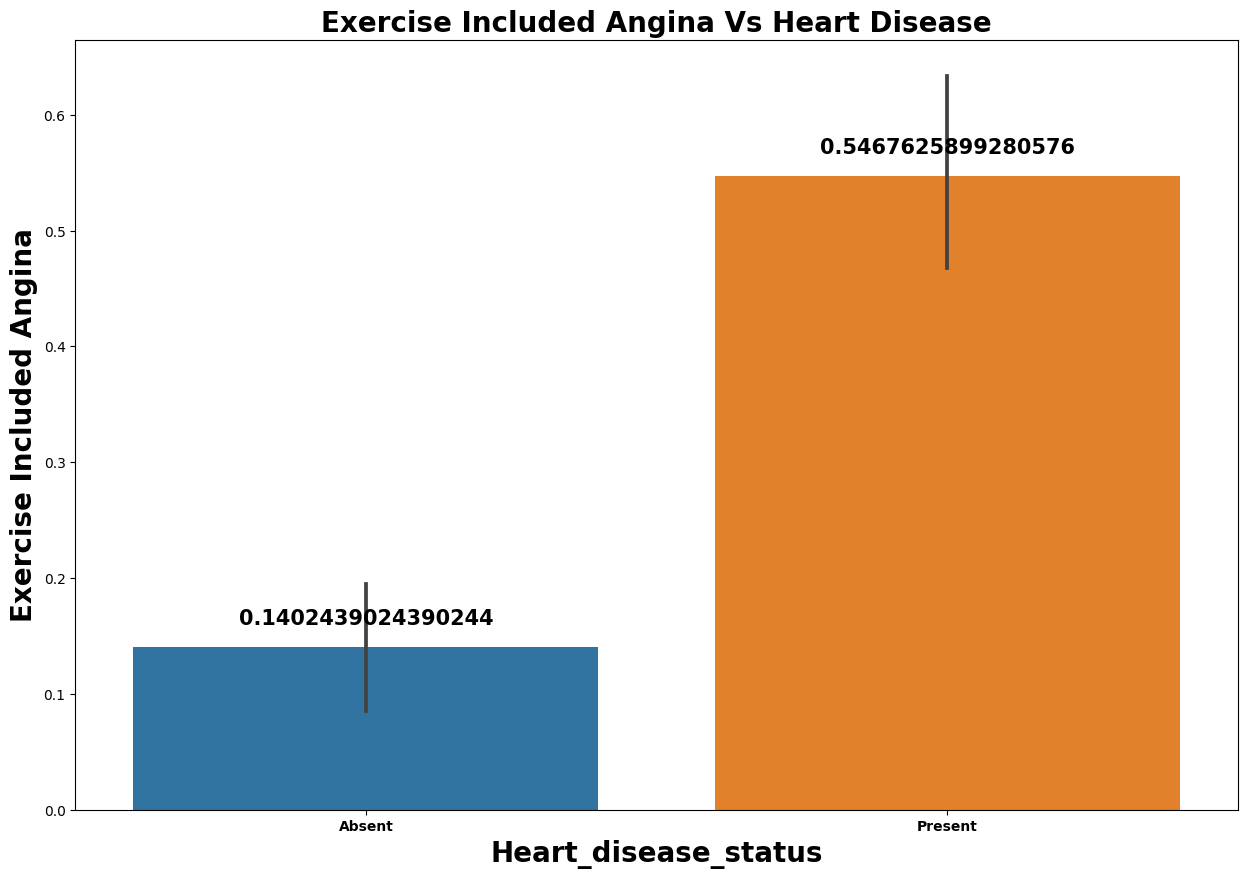

In [207]:
fig,ax=plt.subplots(figsize=(15,10))
a=sns.barplot(x=df['Heart_disease_status'], y=df['exang'])


for i in a.containers:
    for j in i:
        b=j.get_height()
        c=j.get_x()+j.get_width()/2
        plt.text(c,b+0.02,float(b),ha='center',fontweight='bold',fontsize=15)


plt.xlabel('Heart_disease_status',fontweight='bold',fontsize=20)
plt.ylabel('Exercise Included Angina',fontweight='bold',fontsize=20)
plt.title('Exercise Included Angina Vs Heart Disease',fontweight='bold',fontsize=20)
plt.xticks(rotation=360,fontweight='bold',fontsize=10)
plt.show()

# **Observation:**

Exercise included angina will worsen the Heart Disease Population.


**4.8.2 Exercise Included Angina Vs Gender**

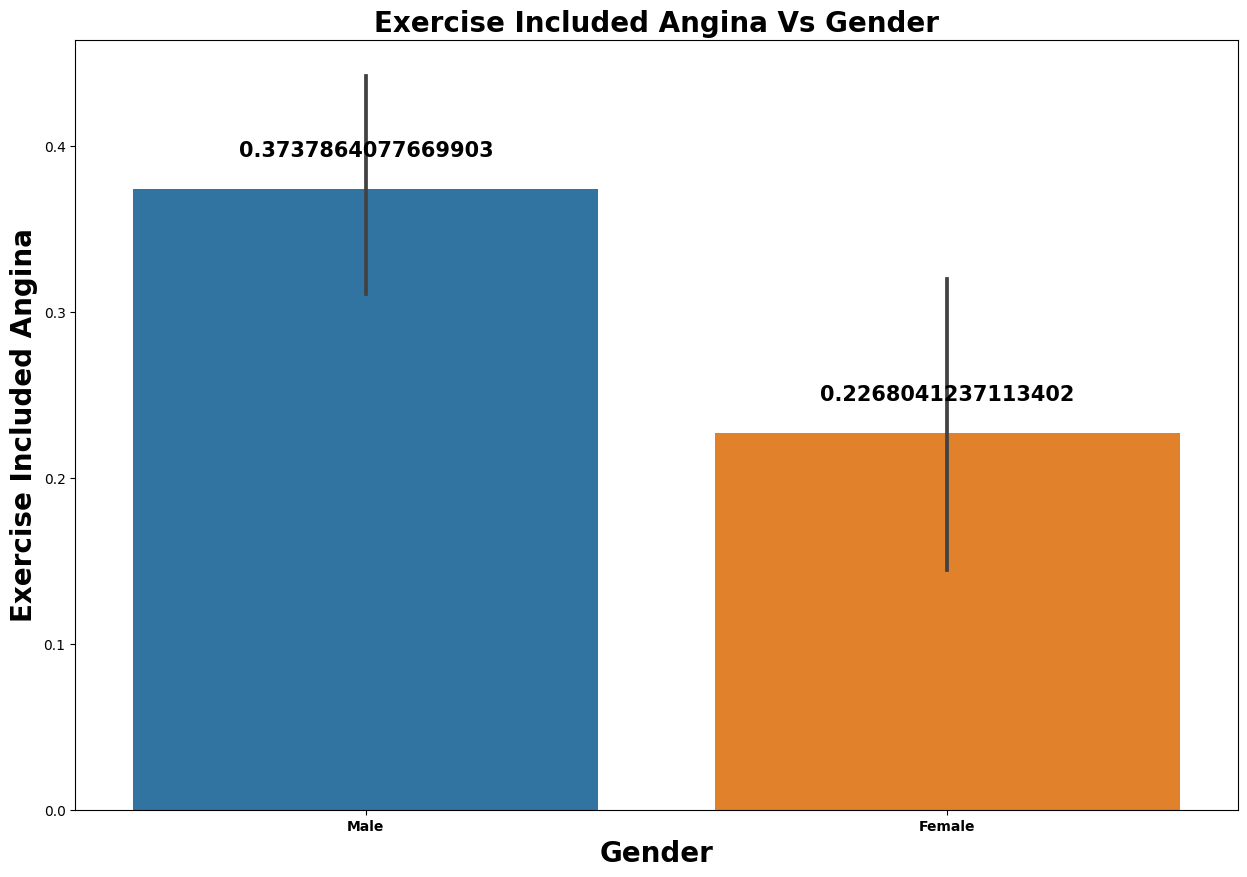

In [208]:
fig,ax=plt.subplots(figsize=(15,10))
a=sns.barplot(x=df['Gender'], y=df['exang'])


for i in a.containers:
    for j in i:
        b=j.get_height()
        c=j.get_x()+j.get_width()/2
        plt.text(c,b+0.02,float(b),ha='center',fontweight='bold',fontsize=15)


plt.xlabel('Gender',fontweight='bold',fontsize=20)
plt.ylabel('Exercise Included Angina',fontweight='bold',fontsize=20)
plt.title('Exercise Included Angina Vs Gender',fontweight='bold',fontsize=20)
plt.xticks(rotation=360,fontweight='bold',fontsize=10)
plt.show()

# **Observation:**

Exercise Included Angina in male is higher than female.


**4.8.3 Exercise Included Angina Vs Age Group**

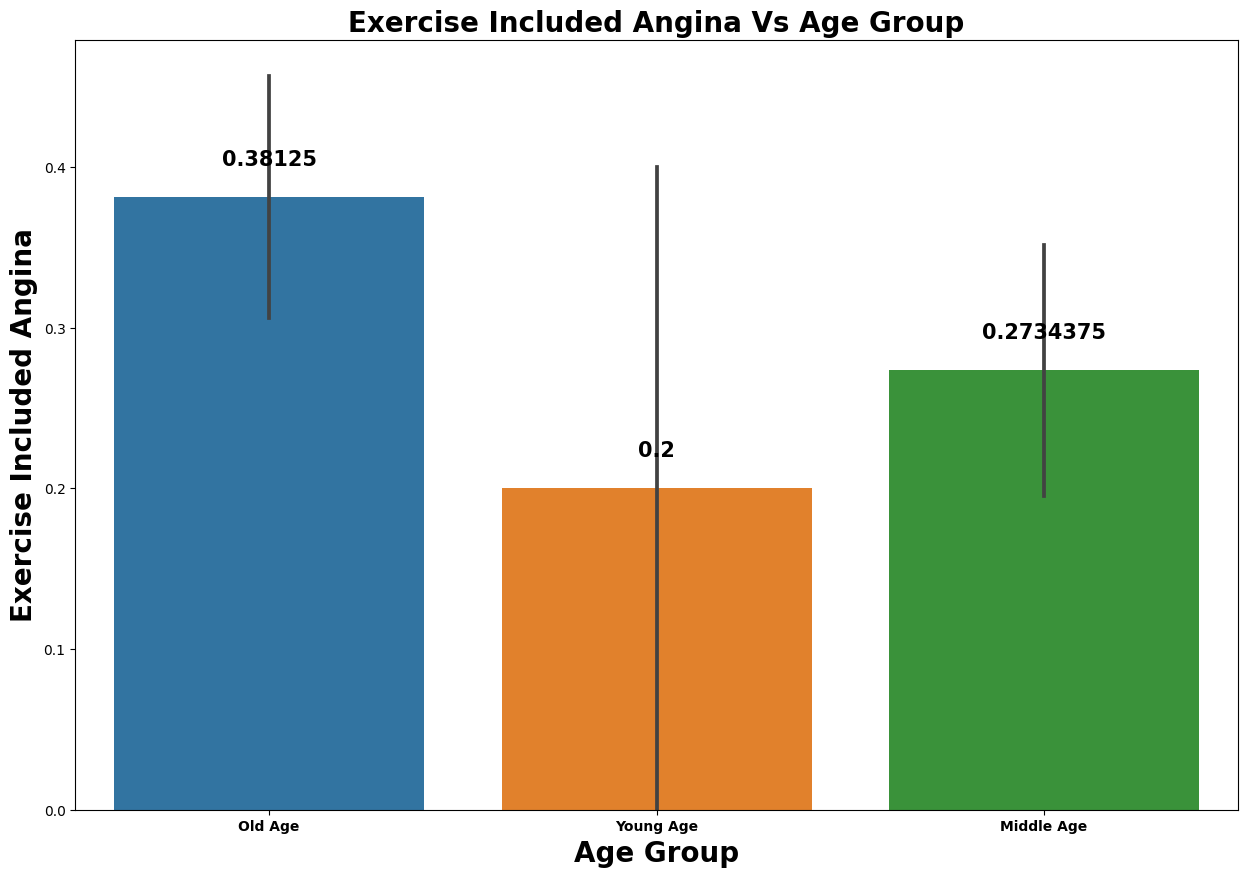

In [209]:
fig,ax=plt.subplots(figsize=(15,10))
a=sns.barplot(x=df['age_group'], y=df['exang'])


for i in a.containers:
    for j in i:
        b=j.get_height()
        c=j.get_x()+j.get_width()/2
        plt.text(c,b+0.02,float(b),ha='center',fontweight='bold',fontsize=15)


plt.xlabel('Age Group',fontweight='bold',fontsize=20)
plt.ylabel('Exercise Included Angina',fontweight='bold',fontsize=20)
plt.title('Exercise Included Angina Vs Age Group',fontweight='bold',fontsize=20)
plt.xticks(rotation=360,fontweight='bold',fontsize=10)
plt.show()

# **Observation:**

Exercise Included Angina in old age > Middle age > Young age

# **4.9 ST Depression**

**4.9.1 ST Depression induced by exercise and heart disease.**



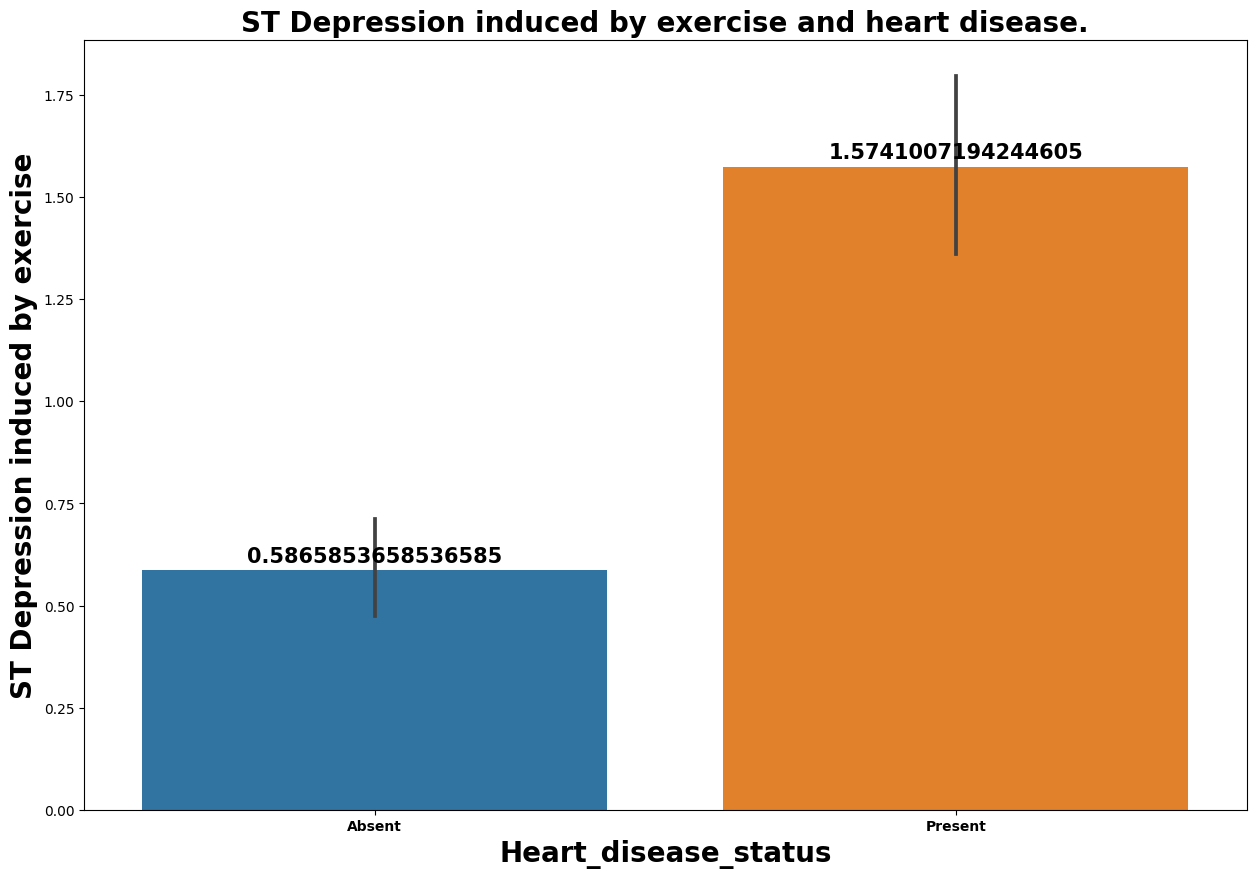

In [210]:
fig,ax=plt.subplots(figsize=(15,10))
a=sns.barplot(x=df['Heart_disease_status'], y=df['oldpeak'])


for i in a.containers:
    for j in i:
        b=j.get_height()
        c=j.get_x()+j.get_width()/2
        plt.text(c,b+0.02,float(b),ha='center',fontweight='bold',fontsize=15)


plt.xlabel('Heart_disease_status',fontweight='bold',fontsize=20)
plt.ylabel('ST Depression induced by exercise',fontweight='bold',fontsize=20)
plt.title('ST Depression induced by exercise and heart disease.',fontweight='bold',fontsize=20)
plt.xticks(rotation=360,fontweight='bold',fontsize=10)
plt.show()

# **Observation:**

ST Depression induced by exercise with heart disease  > ST Depression induced by exercise with no heart disease

**4.9.2 ST Depression induced by exercise Vs Gender.**

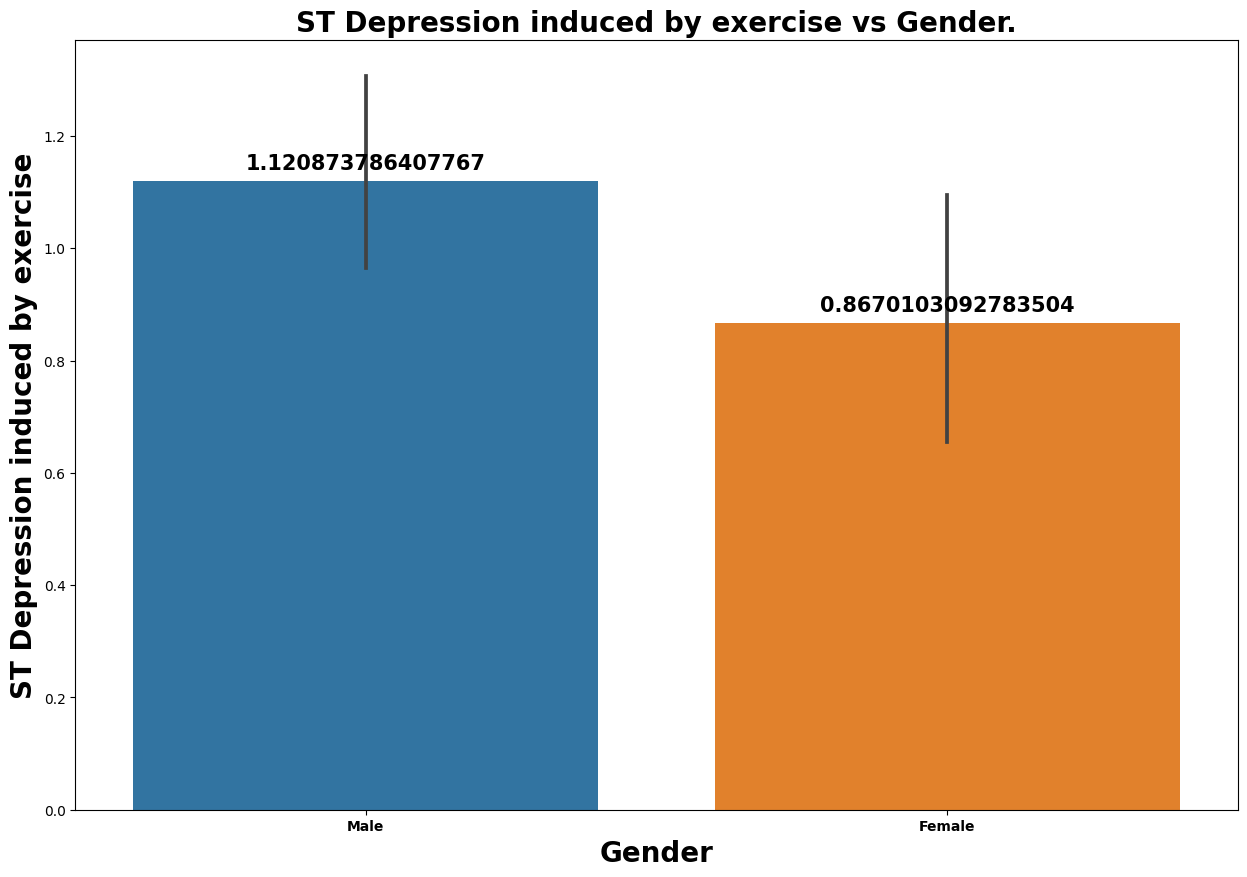

In [211]:
fig,ax=plt.subplots(figsize=(15,10))
a=sns.barplot(x=df['Gender'], y=df['oldpeak'])


for i in a.containers:
    for j in i:
        b=j.get_height()
        c=j.get_x()+j.get_width()/2
        plt.text(c,b+0.02,float(b),ha='center',fontweight='bold',fontsize=15)


plt.xlabel('Gender',fontweight='bold',fontsize=20)
plt.ylabel('ST Depression induced by exercise',fontweight='bold',fontsize=20)
plt.title('ST Depression induced by exercise vs Gender.',fontweight='bold',fontsize=20)
plt.xticks(rotation=360,fontweight='bold',fontsize=10)
plt.show()

# **Observation:**

ST Depression induced by exercise in male is higher than female.

## **4.9.3 ST Depression induced by exercise Vs Age Group.**

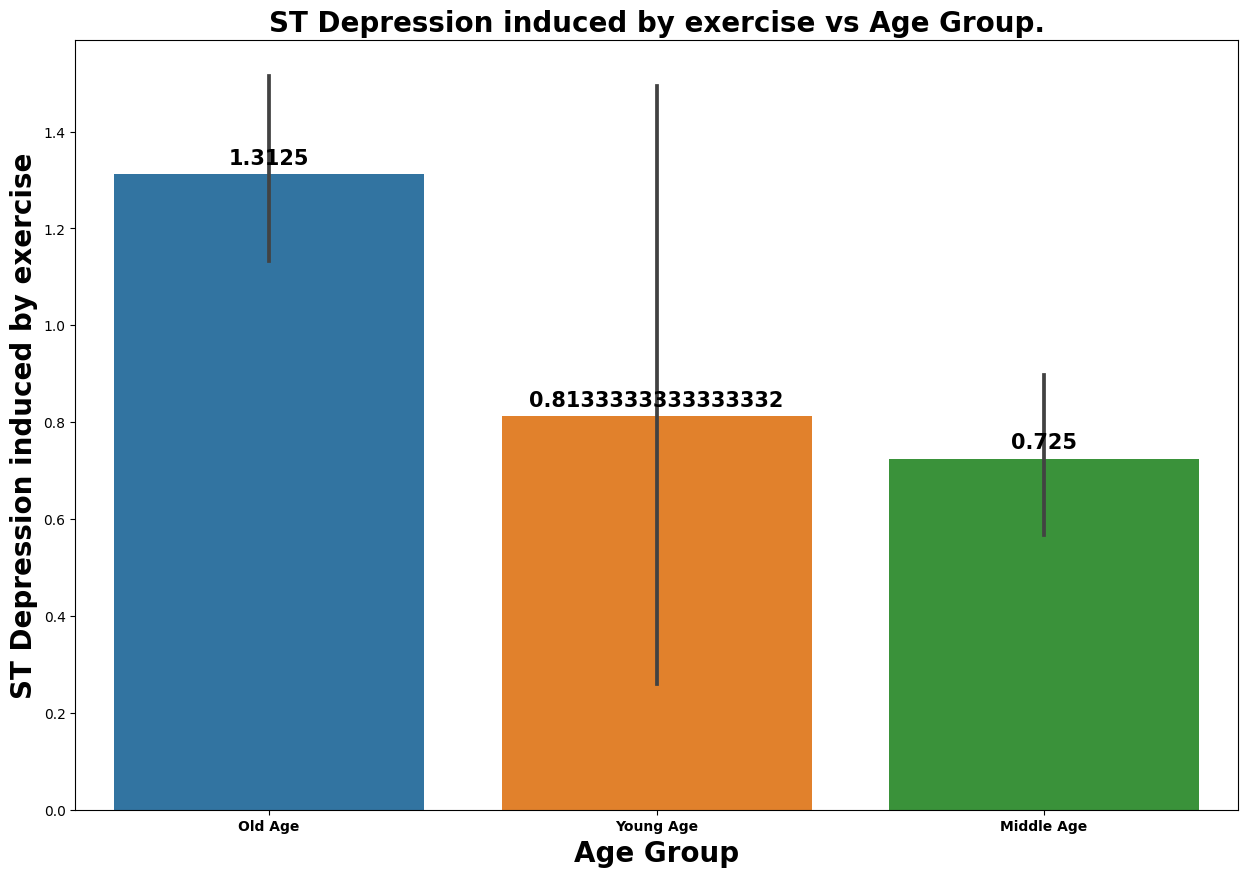

In [212]:
fig,ax=plt.subplots(figsize=(15,10))
a=sns.barplot(x=df['age_group'], y=df['oldpeak'])


for i in a.containers:
    for j in i:
        b=j.get_height()
        c=j.get_x()+j.get_width()/2
        plt.text(c,b+0.02,float(b),ha='center',fontweight='bold',fontsize=15)


plt.xlabel('Age Group',fontweight='bold',fontsize=20)
plt.ylabel('ST Depression induced by exercise',fontweight='bold',fontsize=20)
plt.title('ST Depression induced by exercise vs Age Group.',fontweight='bold',fontsize=20)
plt.xticks(rotation=360,fontweight='bold',fontsize=10)
plt.show()

# **Observation:**

ST Depression induced by exercise in old age > young age > Middle age


# **4.10 ST Exercise Peak**

**4.10.1 ST Exercise Peak Vs Heart Disease**

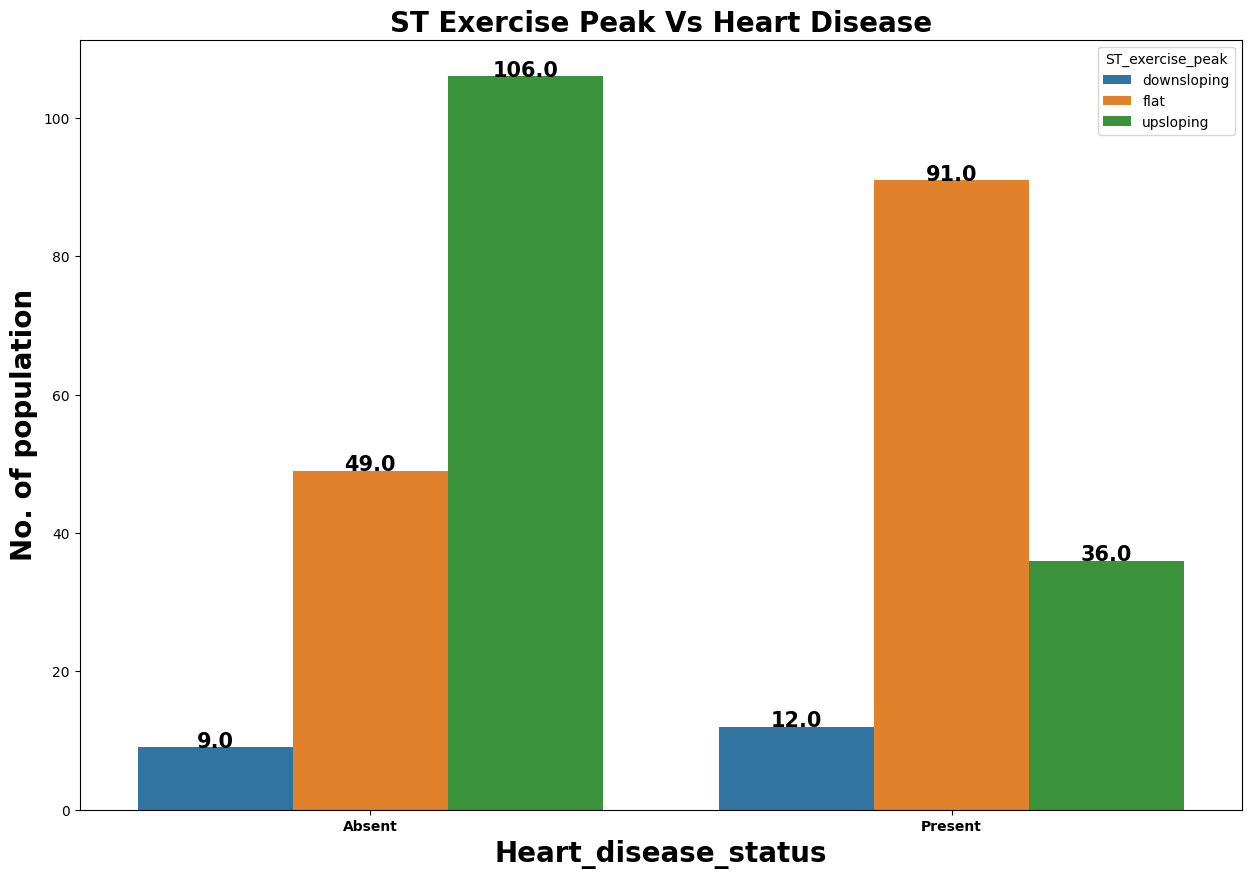

In [213]:
fig,ax=plt.subplots(figsize=(15,10))
a=sns.countplot(x=df['Heart_disease_status'], hue=df['ST_exercise_peak'])


for i in a.containers:
    for j in i:
        b=j.get_height()
        c=j.get_x()+j.get_width()/2
        plt.text(c,b+0.02,float(b),ha='center',fontweight='bold',fontsize=15)


plt.xlabel('Heart_disease_status',fontweight='bold',fontsize=20)
plt.ylabel('No. of population',fontweight='bold',fontsize=20)
plt.title('ST Exercise Peak Vs Heart Disease',fontweight='bold',fontsize=20)
plt.xticks(rotation=360,fontweight='bold',fontsize=10)
plt.show()

# **Observation:**

ST Exercise Peak slope seen in people with heart disease diagnosed

Flat> Upsloping > DownSloping


## **4.10.2 ST Exercise Peak  based on gender and age group.**

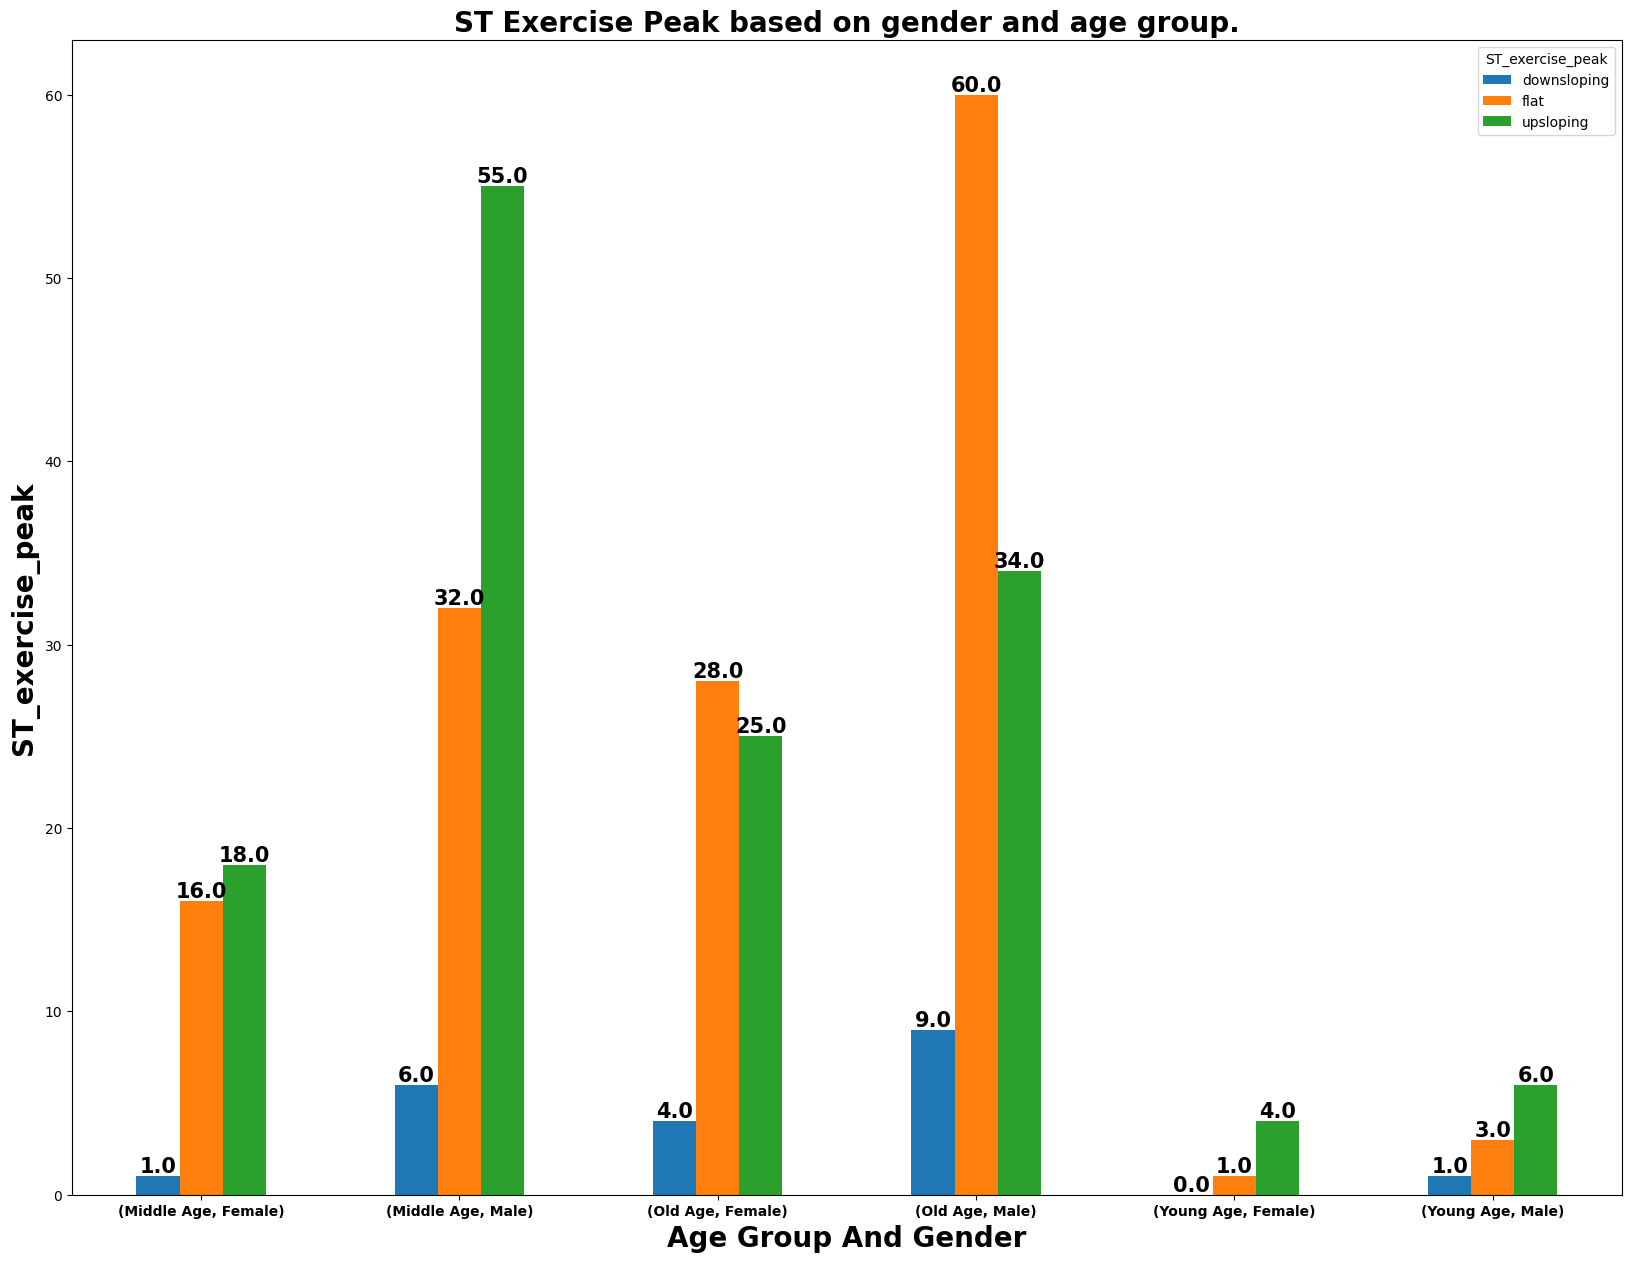

In [214]:
df1=df.groupby(['age_group','Gender'])['ST_exercise_peak'].value_counts().unstack()

fig,ax=plt.subplots(figsize=(20,15))
a=df1.plot(kind='bar',ax=ax)

for i in a.containers:
    for j in i:
        x=j.get_height()
        y=j.get_x()+j.get_width()/2
        plt.text(y,x+0.2,float(x),ha='center',fontweight='bold',fontsize=15)

plt.xlabel('Age Group And Gender',fontweight='bold',fontsize=20)
plt.ylabel('ST_exercise_peak',fontweight='bold',fontsize=20)
plt.title('ST Exercise Peak based on gender and age group.',fontweight='bold',fontsize=20)
plt.xticks(rotation=360,fontweight='bold',fontsize=10)
plt.show()

# **Observation:**

ST Exercise Peak as per Age Group And Gender

Downsloping of old age male > Middle age male > old age female > young age male, middle age female. 

Flat of old age male > Middle age male > old age female > middle age female > young afe male > young age female

upsloping of  Middle age male > old age male > old age female > middle age  female > young age male > young age female



# **4.11 Thallium Stress Test**

**4.11.1 Thallium Stress Test Vs Heart Disease**



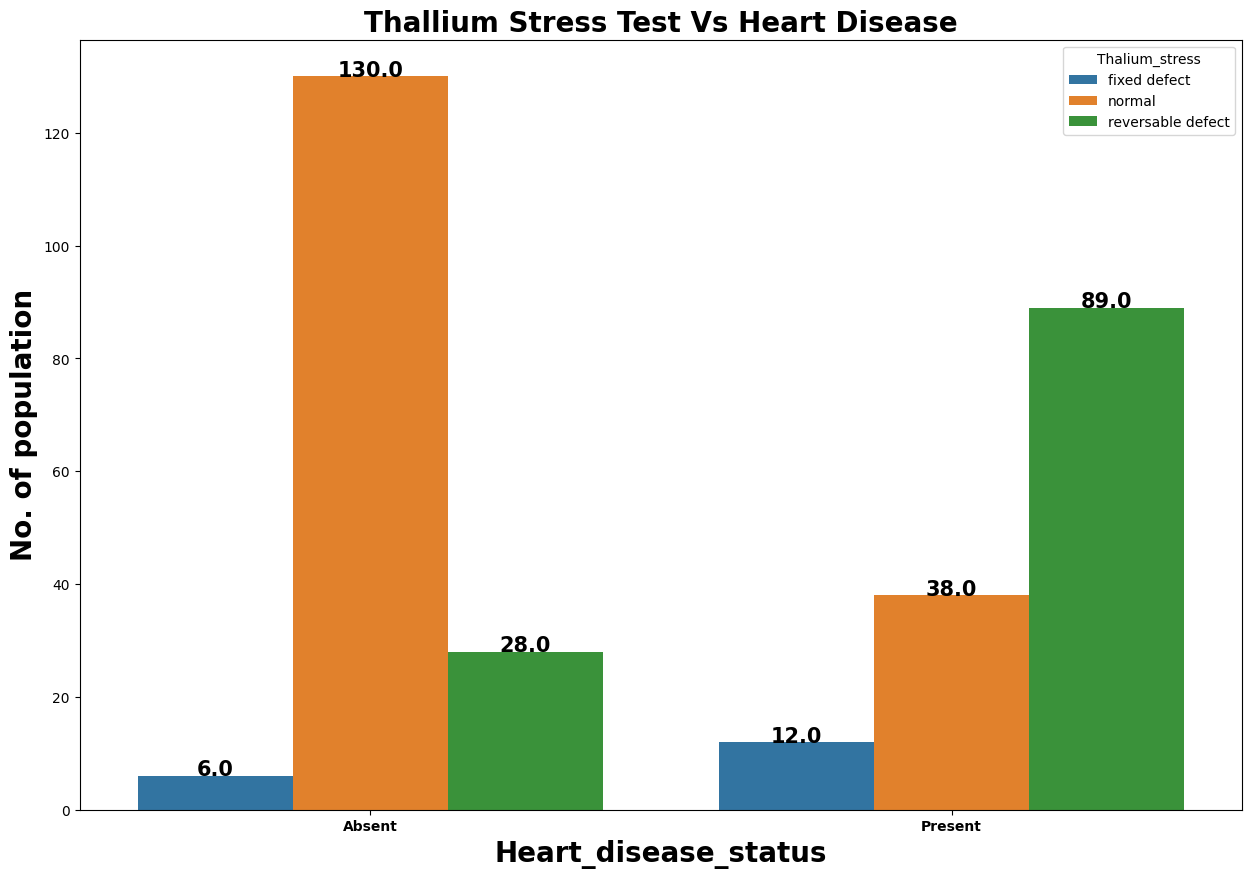

In [215]:
fig,ax=plt.subplots(figsize=(15,10))
a=sns.countplot(x=df['Heart_disease_status'], hue=df['Thalium_stress'])


for i in a.containers:
    for j in i:
        b=j.get_height()
        c=j.get_x()+j.get_width()/2
        plt.text(c,b+0.02,float(b),ha='center',fontweight='bold',fontsize=15)


plt.xlabel('Heart_disease_status',fontweight='bold',fontsize=20)
plt.ylabel('No. of population',fontweight='bold',fontsize=20)
plt.title('Thallium Stress Test Vs Heart Disease',fontweight='bold',fontsize=20)
plt.xticks(rotation=360,fontweight='bold',fontsize=10)
plt.show()

# **Observation:**

**Normal Heart disease with** 

fixed defect = 03

normal= 22

reversable defect =30

**Advanced Label Present with** 

fixed defect = 09

normal= 16

reversable defect = 59




**4.11.2 Thallium Stress Test Vs Gender**

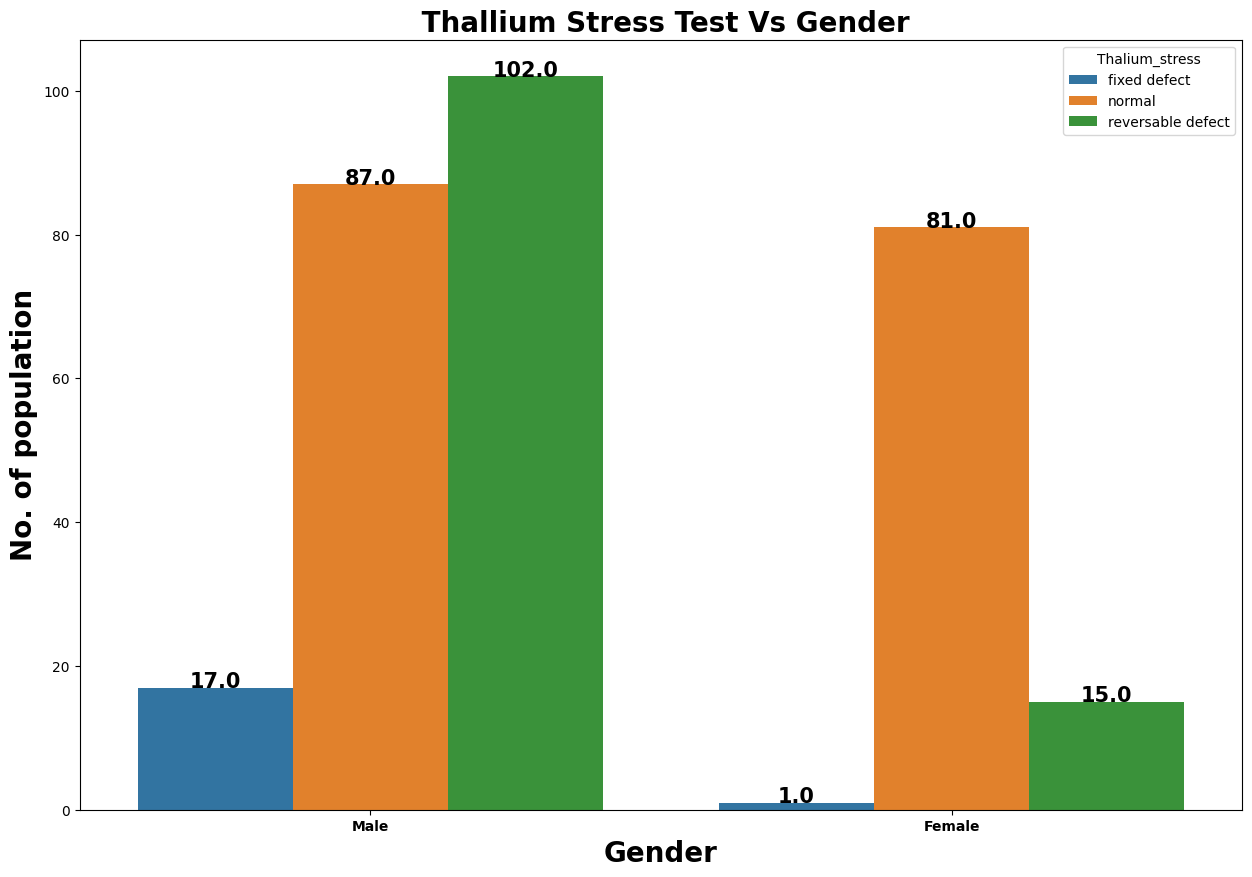

In [216]:
fig,ax=plt.subplots(figsize=(15,10))
a=sns.countplot(x=df['Gender'], hue=df['Thalium_stress'])


for i in a.containers:
    for j in i:
        b=j.get_height()
        c=j.get_x()+j.get_width()/2
        plt.text(c,b+0.02,float(b),ha='center',fontweight='bold',fontsize=15)


plt.xlabel('Gender',fontweight='bold',fontsize=20)
plt.ylabel('No. of population',fontweight='bold',fontsize=20)
plt.title(' Thallium Stress Test Vs Gender',fontweight='bold',fontsize=20)
plt.xticks(rotation=360,fontweight='bold',fontsize=10)
plt.show()

# **Observation:**
**For Male**

fixed defect = 17

normal= 87

reversable defect = 102

**For Female**

fixed defect = 01

normal= 81

reversable defect = 15

## **4.11.3 Thallium Stress Test Vs Age Group**

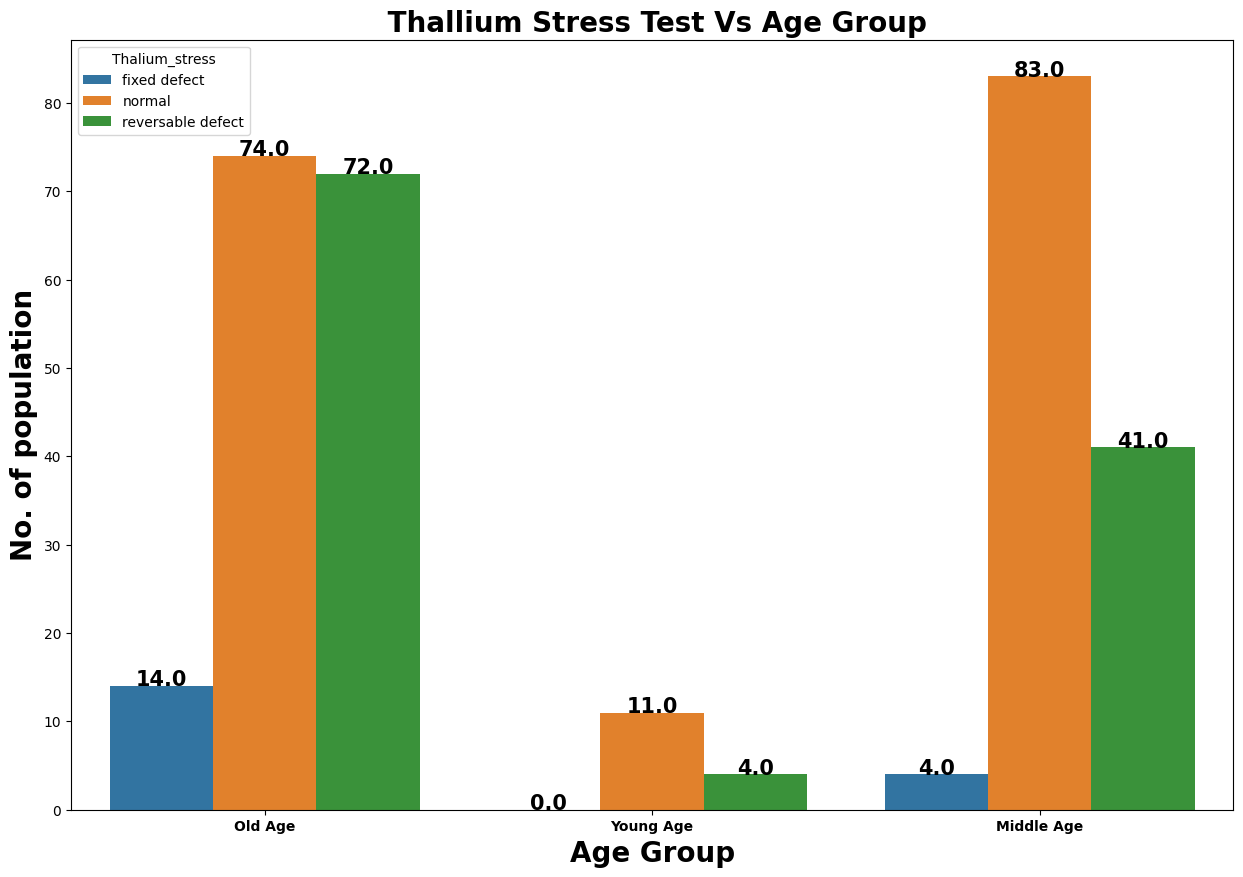

In [217]:
fig,ax=plt.subplots(figsize=(15,10))
a=sns.countplot(x=df['age_group'], hue=df['Thalium_stress'])


for i in a.containers:
    for j in i:
        b=j.get_height()
        c=j.get_x()+j.get_width()/2
        plt.text(c,b+0.02,float(b),ha='center',fontweight='bold',fontsize=15)


plt.xlabel('Age Group',fontweight='bold',fontsize=20)
plt.ylabel('No. of population',fontweight='bold',fontsize=20)
plt.title(' Thallium Stress Test Vs Age Group',fontweight='bold',fontsize=20)
plt.xticks(rotation=360,fontweight='bold',fontsize=10)
plt.show()

# **Observation:**
**For old age**

fixed defect = 14

normal= 74

reversable defect = 72

**For Young Age**

fixed defect = 00

normal= 11

reversable defect = 04

**For Middle Age**

fixed defect = 04

normal= 83

reversable defect = 41

# **4.12 Major Vessels**

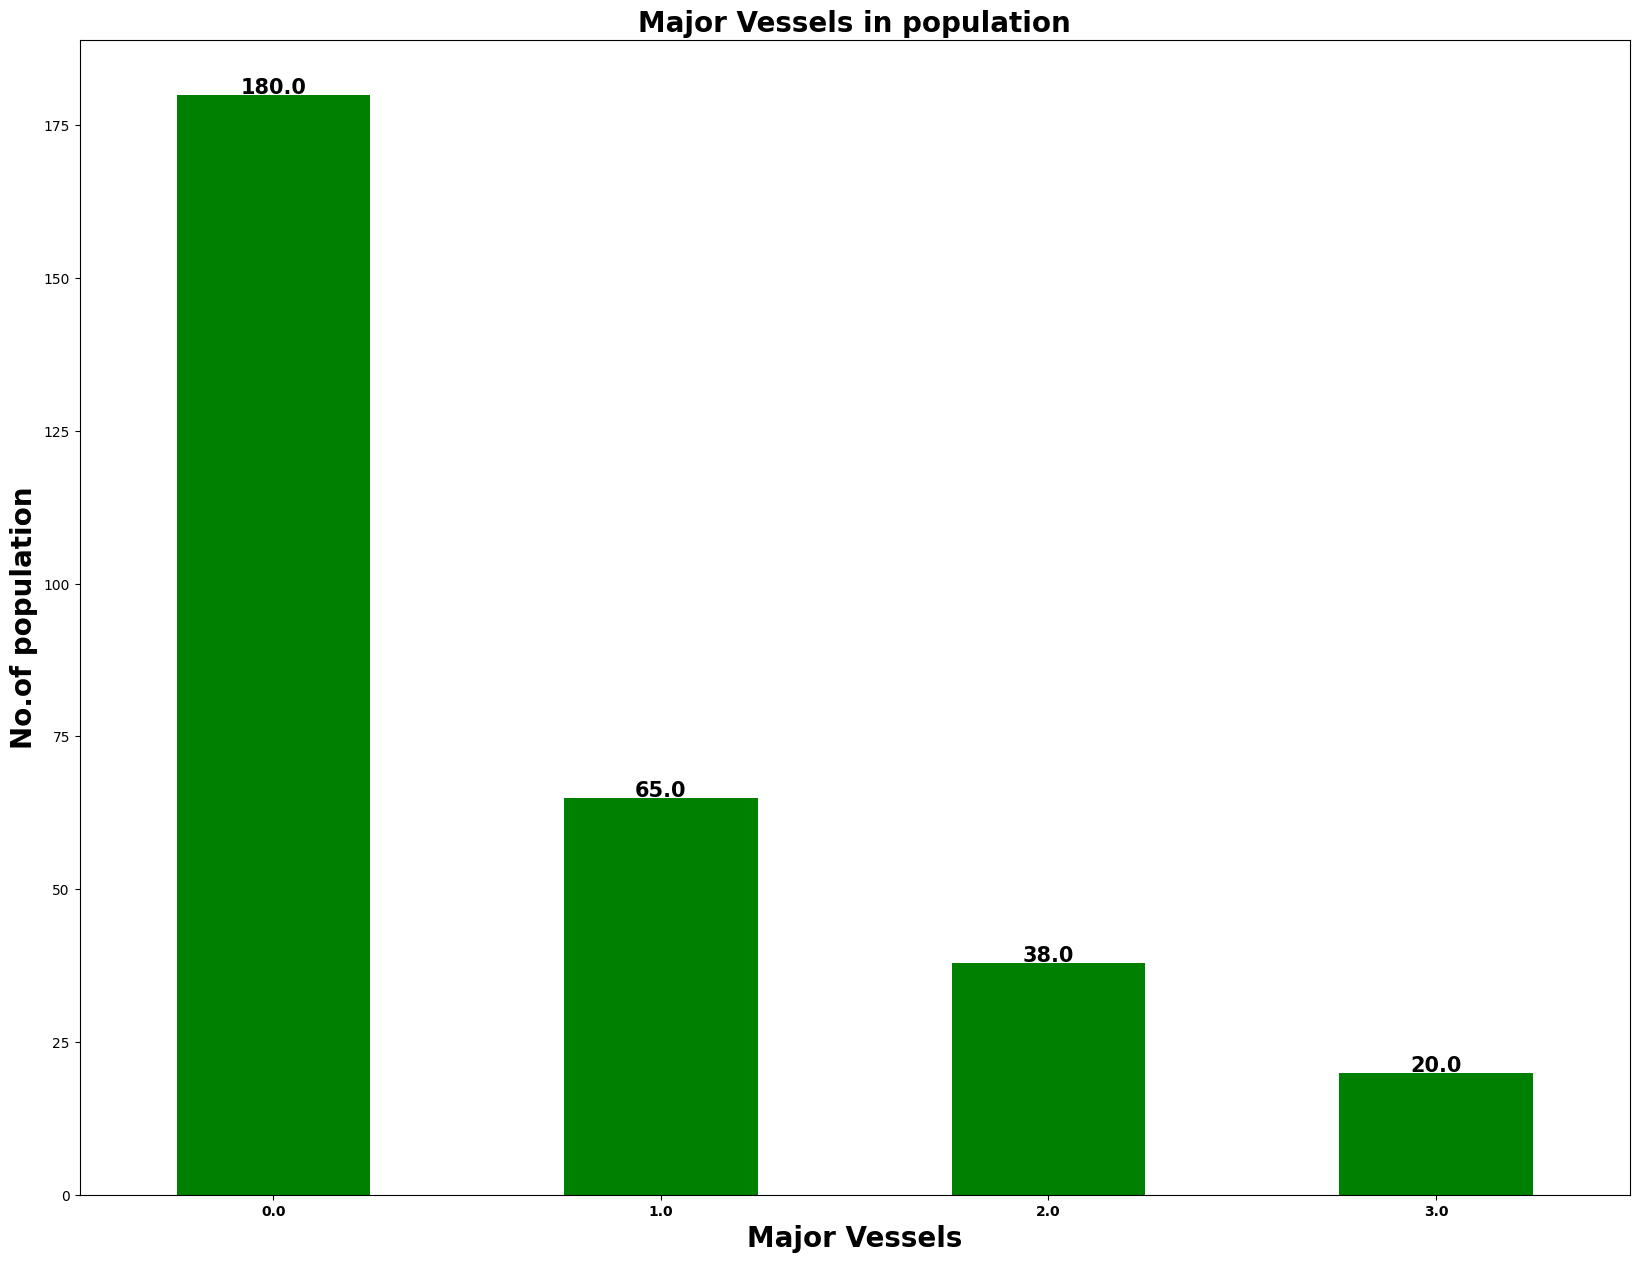

In [218]:
df1=df['ca'].value_counts()

fig,ax=plt.subplots(figsize=(20,15))
a=df1.plot(kind='bar',ax=ax,color='green')

for i in a.containers:
    for j in i:
        x=j.get_height()
        y=j.get_x()+j.get_width()/2
        plt.text(y,x+0.2,float(x),ha='center',fontweight='bold',fontsize=15)

plt.xlabel('Major Vessels',fontweight='bold',fontsize=20)
plt.ylabel('No.of population',fontweight='bold',fontsize=20)
plt.title('Major Vessels in population',fontweight='bold',fontsize=20)
plt.xticks(rotation=360,fontweight='bold',fontsize=10)
plt.show()

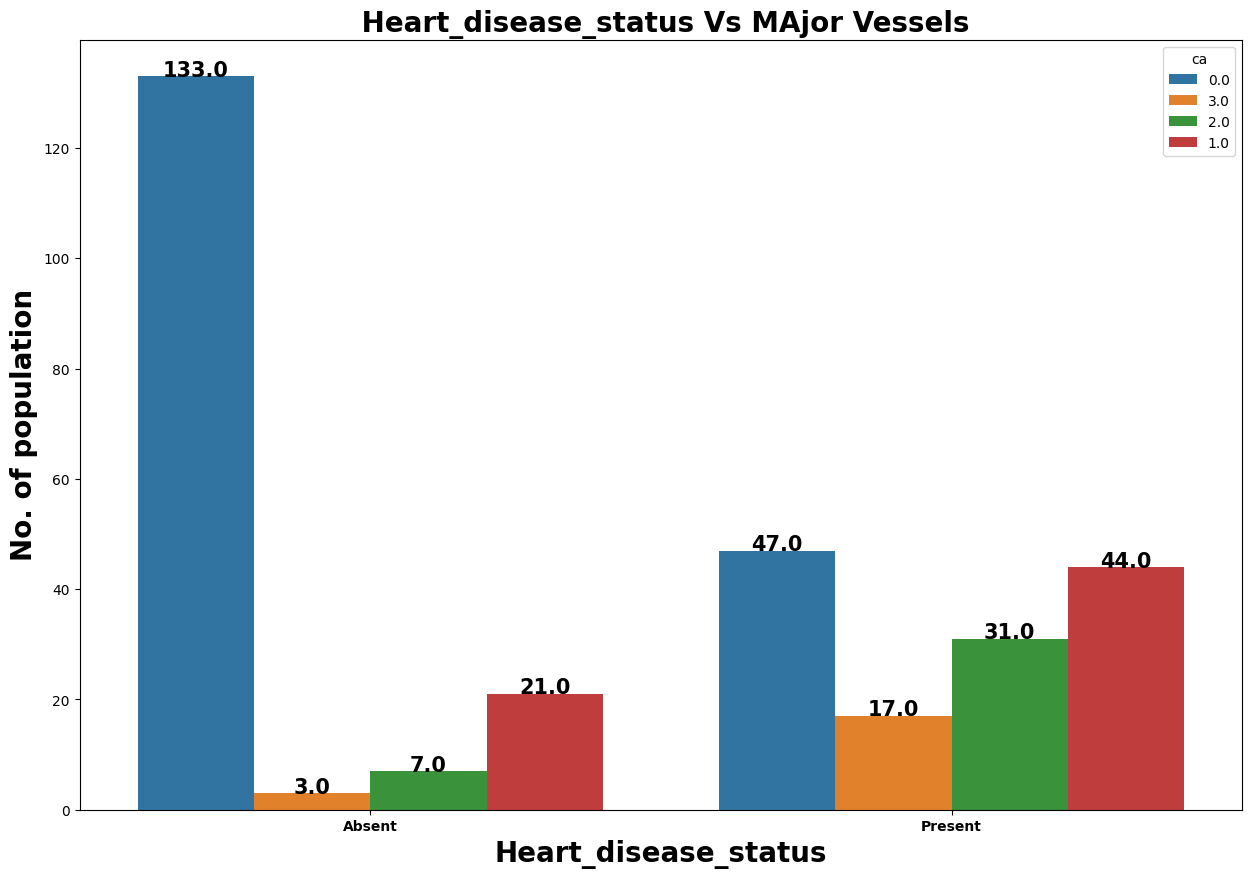

In [219]:
fig,ax=plt.subplots(figsize=(15,10))
a=sns.countplot(x=df['Heart_disease_status'], hue=df['ca'])


for i in a.containers:
    for j in i:
        b=j.get_height()
        c=j.get_x()+j.get_width()/2
        plt.text(c,b+0.02,float(b),ha='center',fontweight='bold',fontsize=15)


plt.xlabel('Heart_disease_status',fontweight='bold',fontsize=20)
plt.ylabel('No. of population',fontweight='bold',fontsize=20)
plt.title(' Heart_disease_status Vs MAjor Vessels',fontweight='bold',fontsize=20)
plt.xticks(rotation=360,fontweight='bold',fontsize=10)
plt.show()

# **Observation:**

Most of the people have amjor vessels and narrowing the major vessels will increase the risk of heart disease.

# **4.13 Correlation between the variables**

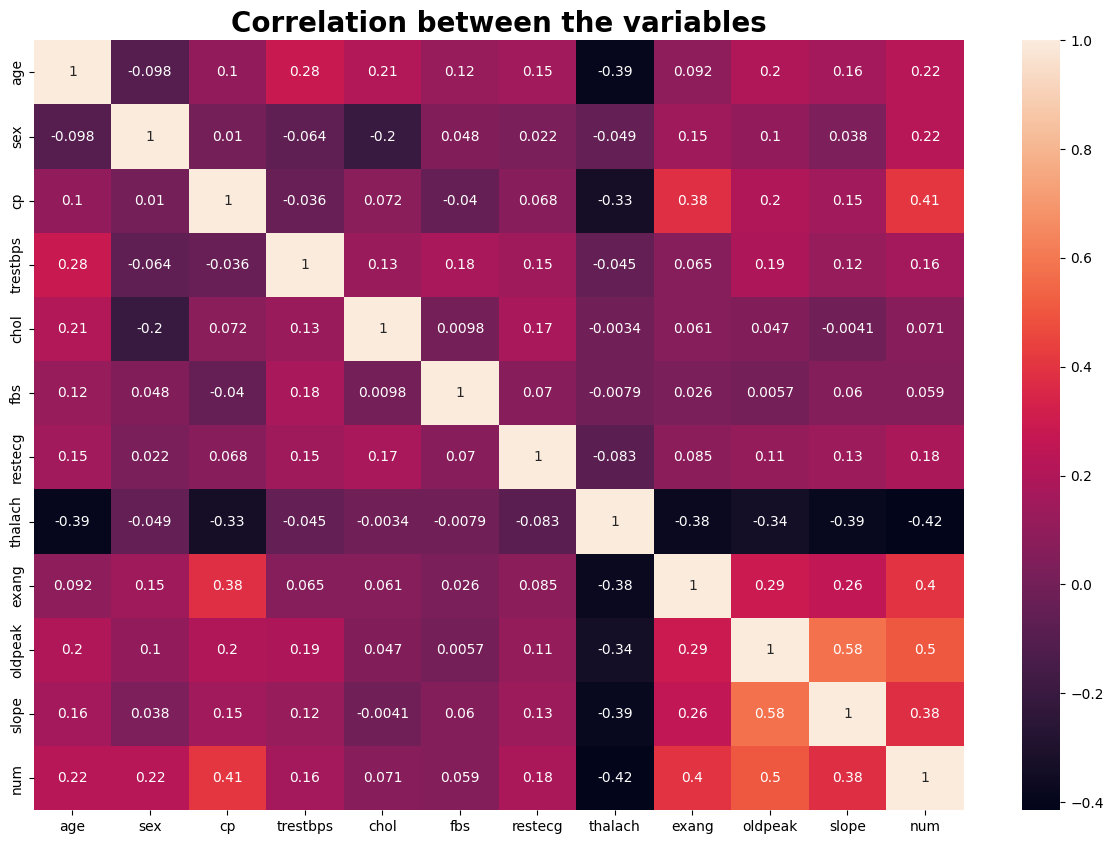

In [220]:
# Heatmap to show the correlation between the variables
plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr(),annot=True)
plt.title('Correlation between the variables',fontweight='bold',fontsize=20)
plt.show()

# **Observation:**

The relation between variables are given below:

The diagonal of the heatmap represents the correlation of each variable with itself, which is always 1.

The variables 'cp', 'thalach', and 'slope' have the highest positive correlation with the target variable 'num' (the presence of heart disease). This suggests that these variables are strong predictors of heart disease.

The variables 'oldpeak' and 'exang' have a moderate negative correlation with the target variable. This suggests that higher values of these variables are associated with a lower likelihood of heart disease.

There is a moderate positive correlation between 'thal' and 'num', suggesting that this variable may also be a predictor of heart disease.

The variables 'age', 'trestbps', 'chol', and 'fbs' have weak correlations with the target variable. However, they may still provide useful information in combination with other variables.

There are some moderate to strong correlations between the predictor variables themselves, indicating that multicollinearity may be present. This can make it more difficult to interpret the individual effects of each variable on the target.

Overall, the heatmap of correlation suggests that 'cp', 'thalach', and 'slope' are strong predictors of heart disease, while 'oldpeak', 'exang', and 'ca' are moderate predictors. The other variables may also be useful in combination with these predictors.